In [3]:
!wget --no-check-certificate "https://cloud-platform.eurecom.fr/zoe/proxy/fc4c0ec1d6090c3a783aa4f4e0be6eb4d5fd315339de16c727ebc896caafc711/lab/AML/Anomaly-Detection/data.pkl"

--2019-05-17 12:11:54--  https://cloud-platform.eurecom.fr/zoe/proxy/fc4c0ec1d6090c3a783aa4f4e0be6eb4d5fd315339de16c727ebc896caafc711/lab/AML/Anomaly-Detection/data.pkl
Resolving cloud-platform.eurecom.fr (cloud-platform.eurecom.fr)... 192.168.104.218
Connecting to cloud-platform.eurecom.fr (cloud-platform.eurecom.fr)|192.168.104.218|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 404 Not Found
2019-05-17 12:11:54 ERROR 404: Not Found.



<b>AML2019</b>

<h3>Challenge 3</h3>
<h1>Anomaly Detection (AD)</h1>
<hr style="height:2px;border:none;color:#333;background-color:#333;"/>
<i>3<sup>th</sup> May 2019</i>

Anomaly detection (AD) refers to the process of detecting data points that do not conform with the rest of observations. Applications of anomaly detection include fraud and fault detection, surveillance, diagnosis, data cleanup, predictive maintenance.

When we talk about AD, we usually look at it as an unsupervised (or semi-supervised) task, where the concept of anomaly is often not well defined or, in the best case, just few samples are labeled as anomalous. In this challenge, you will look at AD from a different perspective!

The dataset you are going to work on consists of monitoring data generated by IT systems; such data is then processed by a monitoring system that executes some checks and detects a series of anomalies. This is a multi-label classification problem, where each check is a binary label corresponding to a specific type of anomaly. Your goal is to develop a machine learning model (or multiple ones) to accurately detect such anomalies.

This will also involve a mixture of data exploration, pre-processing, model selection, and performance evaluation. You will also be asked to try one or more rule learning models, and compare them with other ML models both in terms of predictive performances and interpretability. Interpreatibility is indeed a strong requirement especially in applications like AD where understanding the output of a model is as important as the output itself.

Please, bear in mind that the purpose of this challenge is not simply to find the best-performing model. You should rather make sure to understand the difficulties that come with this AD task.

# Overview
<hr style="height:1px;border:none;color:#333;background-color:#333;" />    

Beyond simply producing a well-performing model for making predictions, in this challenge we would like you to start developing your skills as a machine learning scientist.
In this regard, your notebook should be structured in such a way as to explore the five following tasks that are expected to be carried out whenever undertaking such a project.
The description below each aspect should serve as a guide for your work, but you are strongly encouraged to also explore alternative options and directions. 
Thinking outside the box will always be rewarded in these challenges.

<div class="">
    <h3>1. Data Exploration</h3>
</div>

The first broad component of your notebook should enable you to familiarise yourselves with the given data, an outline of which is given at the end of this challenge specification.
Among others, this section should investigate:

- Data cleaning
- Data visualisation;
- Computing descriptive statistics, e.g. correlation.
- etc.

Data exploration is also useful to identify eventual errors in the dataset: for example, some features may have values that are outside the allowed range of values. Ranges are specified in the dataset description.

<div class="">
    <h3>2. Data Pre-processing</h3>
</div>

The previous step should give you a better understanding of which pre-processing is required for the data.
This may include:

- Normalising and standardising the given data;
- Removing outliers;
- Carrying out feature selection;
- Handling missing information in the dataset;
- Handling errors in the dataset;
- Combining existing features.

<div class="">
    <h3>3. Model Selection</h3>
</div>

At this point, you should have a good understanding of the dataset, and have an idea about the possible candidate models. For example, you may try a multi-label classification model to predict all classes at ones, or train different models, one for each label. In any case, it is important to justify your choices and make a comparison among the candidate models.

You are free to choose any model you want, but you should be aware about some factors which may influence your decision:

- What is the model's complexity?
- Is the model interpretable?
- Is the model able to handle imbalanced datasets?
- Is the model capable of handling both numerical and categorical data?
- Is the model able to handle missing values?
- Does the model return uncertainty estimates along with predictions?

An in-depth evaluation of competing models in view of this and other criteria will elevate the quality of your submission and earn you a higher grade. You may also try to build new labels by combining one or more labels (for example by doing an OR) and check if this impacts the performance of the model(s).

<div class="">
    <h4>3.1 Interpretable Models</h3>
</div>

In [107]:
!pip install --user pysbrl

     |################################| 952kB 2.2MB/s 


Being able to understand the output of a model is important in many field, especially in anomaly detection. In linear regression, for example, the weights of the model can provide some hints on the importance of features, and this is a form of interpretability. Here, we focus on Rule learning, a specific field of interpretable machine learning that provides interpretability through the use of rules. Examples of rule-based models are: 

- RIPPER
    - [Main Paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.107.2612&rep=rep1&type=pdf)
    - A fast and reliable implementation is JRIP by [WEKA](https://www.cs.waikato.ac.nz/~ml/weka/). You can also find unofficial python implementations on GitHub.
- Bayesian Rule Sets (BRS)
    - [Main Paper](http://jmlr.org/papers/volume18/16-003/16-003.pdf)
    - You can find a good implementation [here](https://pypi.org/project/ruleset/). You will probably need to install "fim" (pip install fim) before installing BRS.
- Scalable Bayesian Rule Lists (SBRL)
    - [Main Paper](https://arxiv.org/pdf/1602.08610.pdf)
    - You can find a good implementation [here](https://github.com/myaooo/pysbrl). You will probably need to install "fim" (pip install fim) before installing SBRL.
- and so on... 

Try to run at least one of the suggested models (you are free to try others as well) and comment:

- Are rule-learning models able to provide the same predictive performances as previously tested models?
- Are they faster or slower to train?
- Do learned rules look meaningful to you?
- How many rules do these models learn?
- How many conditions/atoms have on average?

<b>N.B.</b> Since most of the rule-learning implementations deal with binary labels, you can train the model to predict one label of your choice.

<div class="">
    <h3>4. Parameter Optimisation</h3>
</div>

Irrespective of your choice, it is highly likely that your model will have one or more parameters that require tuning.
There are several techniques for carrying out such a procedure, including cross-validation, Bayesian optimisation, and several others.
As before, an analysis into which parameter tuning technique best suits your model is expected before proceeding with the optimisation of your model.

<div class="">
    <h3>5. Model Evaluation</h3>
</div>

Some form of pre-evaluation will inevitably be required in the preceding sections in order to both select an appropriate model and configure its parameters appropriately.
In this final section, you may evaluate other aspects of the model such as:

- Assessing the running time of your model;
- Determining whether some aspects can be parallelised;
- Training the model with smaller subsets of the data.
- etc.

For the evaluation of the classification results, you should use F1-score for each class and do the average.

<b>N.B.</b> Please note that you are responsible for creating a sensible train/validation/test split. There is no predefined held-out test data.

<div class="">
    <h3>*. Optional</h3>
</div>

As you will see in the dataset description, the labels you are going to predict have no meaningful names. Try to understand which kind of anomalies these labels refer to and give sensible names. To do it, you could exploit the output of the interpretable models and/or use a statistical approach with the data you have.

<div class="alert alert-danger">
    <b>N.B.</b> Please note that the items listed under each heading are neither exhaustive, nor are you expected to explore every given suggestion.
    Nonetheless, these should serve as a guideline for your work in both this and upcoming challenges.
    As always, you should use your intuition and understanding in order to decide which analysis best suits the assigned task.
</div>

<div class="">
    <h2>Submission Instructions</h2>
    <hr style="height:1px;border:none;color:#333;background-color:#333;" />    
</div>

- The goal of this challenge is to construct one or more models to detect anomalies.
- Your submission will be the <b>HTML version of your notebook</b> exploring the various modelling aspects described above.

<div class="">
    <h2>Dataset Description</h2>
    <hr style="height:1px;border:none;color:#333;background-color:#333;"/>    
</div>

#### * Location of the Dataset on zoe
The data for this challenge is located at: `/mnt/datasets/anomaly`

#### * Files

You have a unique csv file with 36 features and 8 labels.
Each record contains aggregate features computed over a given amount of time.

#### * Attributes

A brief outline of the available attributes is given below.

1. <i>SessionNumber</i> (INTEGER): it identifies the session on which data is collected;
* <i>SystemID</i> (INTEGER): it identifies the system generating the data;
* <i>Date</i> (DATE): collection date;
* <i>HighPriorityAlerts</i> (INTEGER [0, N]): number of high priority alerts in the session;
* <i>Dumps</i> (INTEGER [0, N]): number of memory dumps;
* <i>CleanupOOMDumps</i> (INTEGER) [0, N]): number of cleanup OOM dumps;
* <i>CompositeOOMDums</i> (INTEGER [0, N]): number of composite OOM dumps;
* <i>IndexServerRestarts</i> (INTEGER [0, N]): number of restarts of the index server;
* <i>NameServerRestarts</i> (INTEGER [0, N]): number of restarts of the name server;
* <i>XSEngineRestarts</i> (INTEGER [0, N]): number of restarts of the XSEngine;
* <i>PreprocessorRestarts</i> (INTEGER [0, N]): number of restarts of the preprocessor;
* <i>DaemonRestarts</i> (INTEGER [0, N]): number of restarts of the daemon process;
* <i>StatisticsServerRestarts</i> (INTEGER [0, N]): number of restarts of the statistics server;
* <i>CPU</i> (FLOAT [0, 100]): cpu usage;
* <i>PhysMEM</i> (FLOAT [0, 100]): physical memory;
* <i>InstanceMEM</i> (FLOAT [0, 100]): memory usage of one instance of the system;
* <i>TablesAllocation</i> (FLOAT [0, 100]): memory allocated for tables;
* <i>IndexServerAllocationLimit</i> (FLOAT [0, 100]): level of memory used by index server;
* <i>ColumnUnloads</i> (INTEGER [0, N]): number of columns unloaded from the tables;
* <i>DeltaSize</i> (INTEGER [0, N]): size of the delta store;
* <i>MergeErrors</i> BOOLEAN [0, 1]: 1 if there are merge errors;
* <i>BlockingPhaseSec</i> (INTEGER [0, N]): blocking phase duration in seconds;
* <i>Disk</i> (FLOAT [0, 100]): disk usage;
* <i>LargestTableSize</i> (INTEGER [0, N]): size of the largest table;
* <i>LargestPartitionSize</i> (INTEGER [0, N]): size of the largest partition of a table;
* <i>DiagnosisFiles</i> (INTEGER [0, N]): number of diagnosis files;
* <i>DiagnosisFilesSize</i> (INTEGER [0, N]): size of diagnosis files;
* <i>DaysWithSuccessfulDataBackups</i> (INTEGER [0, N]): number of days with successful data backups;
* <i>DaysWithSuccessfulLogBackups</i> (INTEGER [0, N]): number of days with successful log backups;
* <i>DaysWithFailedDataBackups</i> (INTEGER [0, N]): number of days with failed data backups;
* <i>DaysWithFailedfulLogBackups</i> (INTEGER [0, N]): number of days with failed log backups;
* <i>MinDailyNumberOfSuccessfulDataBackups</i> (INTEGER [0, N]): minimum number of successful data backups per day;
* <i>MinDailyNumberOfSuccessfulLogBackups</i> (INTEGER [0, N]): minimum number of successful log backups per day;
* <i>MaxDailyNumberOfFailedDataBackups</i> (INTEGER [0, N]): maximum number of failed data backups per day;
* <i>MaxDailyNumberOfFailedLogBackups</i> (INTEGER [0, N]): maximum number of failed log backups per day;
* <i>LogSegmentChange</i> (INTEGER [0, N]): changes in the number of log segments.

#### * Labels

Labels are binary. Each label refers to a different anomaly.

* <i>Check1</i>;
* <i>Check2</i>;
* <i>Check3</i>;
* <i>Check4</i>;
* <i>Check5</i>;
* <i>Check6</i>;
* <i>Check7</i>;
* <i>Check8</i>;

## Import needed tools

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
Let's first import the tools we will need throughout this notebook to perform our different tasks.
</div>

In [5]:
!pip install --user weka

     |################################| 81kB 857kB/s 
  Stored in directory: /mnt/workspace/.cache/pip/wheels/71/c1/a0/54e6356d5c76cc690fd680a407bf034868673f5ecc212be082
Successfully built weka


In [6]:
import pandas as pd
#import pandas_profiling as pdprof
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import sklearn
from fancyimpute import KNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
#import Orange
import pickle

/mnt/workspace/.local/lib/python3.5/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


## Task 1 - Data Exploration

#### Read the data

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
We define the attributes and the labels.
</div>

In [7]:
attrs = ['SessionNumber', 
            'SystemID',
            'Date',
            'HighPriorityAlerts',
            'Dumps',
            'CleanupOOMDumps',
            'CompositeOOMDums',
            'IndexServerRestarts',
            'NameServerRestarts',
            'XSEngineRestarts',
            'PreprocessorRestarts',
            'DaemonRestarts',
            'StatisticsServerRestarts',
            'CPU',
            'PhysMEM',
            'InstanceMEM',
            'TablesAllocation',
            'IndexServerAllocationLimit',
            'ColumnUnloads',
            'DeltaSize',
            'MergeErrors',
            'BlockingPhaseSec',
            'Disk',
            'LargestTableSize',
            'LargestPartitionSize',
            'DiagnosisFiles',
            'DiagnosisFilesSize',
            'DaysWithSuccessfulDataBackups',
            'DaysWithSuccessfulLogBackups',
            'DaysWithFailedDataBackups',
            'DaysWithFailedfulLogBackups',
            'MinDailyNumberOfSuccessfulDataBackups',
            'MinDailyNumberOfSuccessfulLogBackups',
            'MaxDailyNumberOfFailedDataBackups',
            'MaxDailyNumberOfFailedLogBackups',
            'LogSegmentChange']

labels = ['Check1',
            'Check2',
            'Check3',
            'Check4',
            'Check5',
            'Check6',
            'Check7',
            'Check8']

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
Now, we import the training and testing data into <b>pandas dataframes</b>.
</div>

In [8]:
data = pd.read_csv("/mnt/datasets/anomaly/data.csv",
                   header = None,
                   names = attrs + labels,
                   sep = ';')

In [9]:
# with open('data.pkl', 'wb') as handle:
#     pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
#with open('data.pkl', 'rb') as handle:
#    data = pickle.load(handle)

#### Data exploration

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
Print information about a DataFrame: the index dtype and column dtypes, non-null values and memory usage.
</div>

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287031 entries, 0 to 287030
Data columns (total 44 columns):
SessionNumber                            287031 non-null int64
SystemID                                 287031 non-null int64
Date                                     287031 non-null object
HighPriorityAlerts                       287031 non-null int64
Dumps                                    287028 non-null float64
CleanupOOMDumps                          287028 non-null float64
CompositeOOMDums                         287028 non-null float64
IndexServerRestarts                      287031 non-null int64
NameServerRestarts                       287031 non-null int64
XSEngineRestarts                         287031 non-null int64
PreprocessorRestarts                     287031 non-null int64
DaemonRestarts                           287031 non-null int64
StatisticsServerRestarts                 287031 non-null int64
CPU                                      261822 non-null float6

In [12]:
def fixTypes(df):
  df['Dumps'] = df['Dumps'].astype(dtype = int)
  df['CleanupOOMDumps'] = df['CleanupOOMDumps'].astype(dtype = int)
  df['CompositeOOMDums'] = df['CompositeOOMDums'].astype(dtype = int)
  df['DeltaSize'] = df['DeltaSize'].astype(dtype = int)
  df['MergeErrors'] = df['MergeErrors'].astype(dtype = int)
  df['BlockingPhaseSec'] = df['BlockingPhaseSec'].astype(dtype = int)
  df['LargestTableSize'] = df['LargestTableSize'].astype(dtype = int)
  df['LargestPartitionSize'] = df['LargestPartitionSize'].astype(dtype = int)
  df['DiagnosisFiles'] = df['DiagnosisFiles'].astype(dtype = int)
  df['DiagnosisFilesSize'] = df['DiagnosisFilesSize'].astype(dtype = int)
  df['LogSegmentChange'] = df['LogSegmentChange'].astype(dtype = int)

#   for label in labels:
#     df[label] = df[label].astype(dtype = int)
    
  return df

In [13]:
print("The number of data samples in the dataset is ", len(data))

The number of data samples in the dataset is  287031


<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
    Conversion of the attribute Date from object to <b>datetime</b>.
</div>

In [14]:
data['Date'] = pd.to_datetime(data['Date'])

#### Data visualization

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
Profiles tabular data in a pandas dataframe and produces a HTML-based report.
</div>



In [15]:
# pdprof.ProfileReport(data)

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
We drop the colums which are constant or highly correlated with another column.
</div>


In [16]:
data = data.drop(columns = ['PreprocessorRestarts', 'DaemonRestarts'], axis = 1)
attrs.remove('PreprocessorRestarts')
attrs.remove('DaemonRestarts')

## Task 2 - Data Pre-Processing

#### Outliers visualization

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
Plot box plots for the features to visualize potential outliers. They can be related to the anomalies.
</div>

In [17]:
# Numerical features (not the boolean).
# attrs_num=attrs
# attrs_num.remove('MergeErrors')

In [18]:
# fig, axs = plt.subplots(8,4, figsize=(25, 50), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.001)
# axs = axs.ravel()
# for i, nf in enumerate(attrs_num):
#     data[nf].plot.box(ax = axs[i])

#### Handling missing information in the attributes, normalising and standardising the given data.

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
We fill the missing values depending on the type of the attribute. For the float categories we use the mean, for the integeer categories we use the mode and for the boolean we set the missing value as 0.
</div>

In [19]:
# We create a copy of our data called dataSimpleImpute in order to maintain without changes our original data.
dataSimpleImpute = data.copy()

dataSimpleImpute['CPU'] = dataSimpleImpute['CPU'].fillna(value = dataSimpleImpute['CPU'].mean())
dataSimpleImpute['PhysMEM'] = dataSimpleImpute['PhysMEM'].fillna(value = dataSimpleImpute['PhysMEM'].mean())
dataSimpleImpute['InstanceMEM'] = dataSimpleImpute['InstanceMEM'].fillna(value = dataSimpleImpute['InstanceMEM'].mean())
dataSimpleImpute['TablesAllocation'] = dataSimpleImpute['TablesAllocation'].fillna(value = dataSimpleImpute['TablesAllocation'].mean())
dataSimpleImpute['IndexServerAllocationLimit'] = dataSimpleImpute['IndexServerAllocationLimit'].fillna(value = dataSimpleImpute['IndexServerAllocationLimit'].mean())
dataSimpleImpute['Disk'] = dataSimpleImpute['Disk'].fillna(value = dataSimpleImpute['Disk'].mean())

dataSimpleImpute['MergeErrors'] = dataSimpleImpute['MergeErrors'].fillna(value = 0)

dataSimpleImpute['DeltaSize'] = dataSimpleImpute['DeltaSize'].fillna(value = int(dataSimpleImpute['DeltaSize'].mode()))
dataSimpleImpute['BlockingPhaseSec'] = dataSimpleImpute['BlockingPhaseSec'].fillna(value = int(dataSimpleImpute['BlockingPhaseSec'].mode()))
dataSimpleImpute['LargestTableSize'] = dataSimpleImpute['LargestTableSize'].fillna(value = int(dataSimpleImpute['LargestTableSize'].mode()))

dataSimpleImpute['LargestPartitionSize'] = dataSimpleImpute['LargestPartitionSize'].fillna(value = int(dataSimpleImpute['LargestPartitionSize'].mode()))

dataSimpleImpute['DiagnosisFiles'] = dataSimpleImpute['DiagnosisFiles'].fillna(value = int(dataSimpleImpute['DiagnosisFiles'].mode()))
dataSimpleImpute['DiagnosisFilesSize'] = dataSimpleImpute['DiagnosisFilesSize'].fillna(value = int(dataSimpleImpute['DiagnosisFilesSize'].mode()))
dataSimpleImpute['LogSegmentChange'] = dataSimpleImpute['LogSegmentChange'].fillna(value = int(dataSimpleImpute['LogSegmentChange'].mode()))
dataSimpleImpute['Dumps'] = dataSimpleImpute['Dumps'].fillna(value = int(dataSimpleImpute['Dumps'].mode()))
dataSimpleImpute['CleanupOOMDumps'] = dataSimpleImpute['CleanupOOMDumps'].fillna(value = int(dataSimpleImpute['CleanupOOMDumps'].mode()))
dataSimpleImpute['CompositeOOMDums'] = dataSimpleImpute['CompositeOOMDums'].fillna(value = int(dataSimpleImpute['CompositeOOMDums'].mode()))

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
    Specification of the <b>datatype</b> of each column in dataSimpleImpute.
</div>

In [20]:
dataSimpleImpute = fixTypes(dataSimpleImpute)

In [21]:
datatypes = {col:typ for col, typ in zip(attrs, dataSimpleImpute.dtypes)}

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
    After filling the missing information we compute the <b>ProfileReport</b> of the data again. Then, as before, we drop the colums which are constant or highly correlated with another column.
</div>

In [22]:
# pdprof.ProfileReport(dataSimpleImpute)

In [23]:
attrsSimpleImpute = attrs.copy()
dataSimpleImpute = dataSimpleImpute.drop(columns = ['CleanupOOMDumps'], axis = 1)
attrsSimpleImpute.remove('CleanupOOMDumps')

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
    Conversion of the attribute Date from datetime to <b>numeric</b> in order to be able to viasulize this attribute in boxplot and perform a scalling and normalisation in the data.
</div>

In [24]:
# Conversion to numeric in the original dataframe data.
data['Date'] = pd.to_numeric(data.Date)
# Then we also convert it in numeric in dataSimpleImpute
dataSimpleImpute['Date'] = data['Date']
datatypes['Date'] = data['Date'].dtype

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
Normalisation of dataScaledSimpleImpute.
</div>

In [25]:
scaler = MinMaxScaler()
# data_scaled = pd.concat([pd.DataFrame(scaler.fit_transform(data[attrs])), data[labels]], axis = 1, ignore_index = True)
dataScaledSimpleImpute = pd.DataFrame(scaler.fit_transform(dataSimpleImpute[attrsSimpleImpute]), columns = attrsSimpleImpute)
dataScaledSimpleImpute[:10]

SessionNumber  SystemID      Date  HighPriorityAlerts  Dumps  \
0       0.000000  0.000000  0.019932            0.041667    0.0   
1       0.000004  0.000314  0.215995            0.000000    0.0   
2       0.000009  0.000314  0.070021            0.000000    0.0   
3       0.000013  0.000628  0.060044            0.041667    0.0   
4       0.000018  0.000941  0.216023            0.041667    0.0   
5       0.000022  0.001255  0.216025            0.041667    0.0   
6       0.000026  0.001255  0.060033            0.041667    0.0   
7       0.000031  0.000000  0.060005            0.000000    0.0   
8       0.000035  0.001569  0.060001            0.000000    0.0   
9       0.000039  0.001883  0.216002            0.083333    0.0   

   CompositeOOMDums  IndexServerRestarts  NameServerRestarts  \
0               0.0                  0.0                 0.0   
1               0.0                  0.0                 0.0   
2               0.0                  0.0                 0.0   
3               0.0                  0.0                 0.0   
4               0.0                  0.0                 0.0   
5               0.0                  0.0                 0.0   
6               0.0                  0.0                 0.0   
7               0.0                  0.0                 0.0   
8               0.0                  0.0                 0.0   
9               0.0                  0.0                 0.0   

   XSEngineRestarts  StatisticsServerRestarts  ...  DiagnosisFilesSize  \
0               0.0                       0.0  ...            0.000256   
1               0.0                       0.0  ...            0.000131   
2               0.0                       0.0  ...            0.000135   
3               0.0                       0.0  ...            0.000295   
4               0.0                       0.0  ...            0.000099   
5               0.0                       0.0  ...            0.000132   
6               0.0                       0.0  ...            0.000142   
7               0.0                       0.0  ...            0.000263   
8               0.0                       0.0  ...            0.000491   
9               0.0                       0.0  ...            0.000249   

   DaysWithSuccessfulDataBackups  DaysWithSuccessfulLogBackups  \
0                       0.500000                      0.363636   
1                       0.214286                      0.363636   
2                       0.214286                      0.363636   
3                       0.500000                      0.363636   
4                       0.500000                      0.363636   
5                       0.071429                      0.363636   
6                       0.071429                      0.363636   
7                       0.500000                      0.363636   
8                       0.500000                      0.363636   
9                       0.500000                      0.363636   

   DaysWithFailedDataBackups  DaysWithFailedfulLogBackups  \
0                        0.0                          0.0   
1                        0.0                          0.0   
2                        0.0                          0.0   
3                        0.0                          0.0   
4                        0.0                          0.0   
5                        0.0                          0.0   
6                        0.0                          0.0   
7                        0.0                          0.0   
8                        0.0                          0.0   
9                        0.0                          0.0   

   MinDailyNumberOfSuccessfulDataBackups  \
0                               0.058824   
1                               0.058824   
2                               0.058824   
3                               0.058824   
4                               0.058824   
5                               0.058824   
6                               0.0588

#### A second approach, handling missing information in the attributes, normalising and standardising the given data.

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
Normalisation of the original data.
</div>

In [26]:
scaler = MinMaxScaler()
dataScaled = pd.DataFrame(scaler.fit_transform(data[attrs]), columns = attrs)
dataScaled[:10]

SessionNumber  SystemID      Date  HighPriorityAlerts  Dumps  \
0       0.000000  0.000000  0.019932            0.041667    0.0   
1       0.000004  0.000314  0.215995            0.000000    0.0   
2       0.000009  0.000314  0.070021            0.000000    0.0   
3       0.000013  0.000628  0.060044            0.041667    0.0   
4       0.000018  0.000941  0.216023            0.041667    0.0   
5       0.000022  0.001255  0.216025            0.041667    0.0   
6       0.000026  0.001255  0.060033            0.041667    0.0   
7       0.000031  0.000000  0.060005            0.000000    0.0   
8       0.000035  0.001569  0.060001            0.000000    0.0   
9       0.000039  0.001883  0.216002            0.083333    0.0   

   CleanupOOMDumps  CompositeOOMDums  IndexServerRestarts  NameServerRestarts  \
0              0.0               0.0                  0.0                 0.0   
1              0.0               0.0                  0.0                 0.0   
2              0.0               0.0                  0.0                 0.0   
3              0.0               0.0                  0.0                 0.0   
4              0.0               0.0                  0.0                 0.0   
5              0.0               0.0                  0.0                 0.0   
6              0.0               0.0                  0.0                 0.0   
7              0.0               0.0                  0.0                 0.0   
8              0.0               0.0                  0.0                 0.0   
9              0.0               0.0                  0.0                 0.0   

   XSEngineRestarts  ...  DiagnosisFilesSize  DaysWithSuccessfulDataBackups  \
0               0.0  ...            0.000256                       0.500000   
1               0.0  ...            0.000131                       0.214286   
2               0.0  ...            0.000135                       0.214286   
3               0.0  ...            0.000295                       0.500000   
4               0.0  ...            0.000099                       0.500000   
5               0.0  ...            0.000132                       0.071429   
6               0.0  ...            0.000142                       0.071429   
7               0.0  ...            0.000263                       0.500000   
8               0.0  ...            0.000491                       0.500000   
9               0.0  ...            0.000249                       0.500000   

   DaysWithSuccessfulLogBackups  DaysWithFailedDataBackups  \
0                      0.363636                        0.0   
1                      0.363636                        0.0   
2                      0.363636                        0.0   
3                      0.363636                        0.0   
4                      0.363636                        0.0   
5                      0.363636                        0.0   
6                      0.363636                        0.0   
7                      0.363636                        0.0   
8                      0.363636                        0.0   
9                      0.363636                        0.0   

   DaysWithFailedfulLogBackups  MinDailyNumberOfSuccessfulDataBackups  \
0                          0.0                               0.058824   
1                          0.0                               0.058824   
2                          0.0                               0.058824   
3                          0.0                               0.058824   
4                          0.0                               0.058824   
5                          0.0                               0.058824   
6                          0.0                               0.058824   
7                          0.0                               0.058824   
8                          0.0                               0.058824   
9                          0.0                               0.058824   

   MinDailyNumbe

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
We aim to fill the missing values using KNN taking into account 3 neighbours.
</div>

In [27]:
dataScaledKNNImpute = pd.DataFrame(KNN(k=3, orientation="columns").fit_transform(dataScaled[attrs]), columns = attrs)
dataScaledKNNImpute[:10]

Imputing row 1/34 with 0 missing, elapsed time: 3.059


SessionNumber  SystemID      Date  HighPriorityAlerts  Dumps  \
0       0.000000  0.000000  0.019932            0.041667    0.0   
1       0.000004  0.000314  0.215995            0.000000    0.0   
2       0.000009  0.000314  0.070021            0.000000    0.0   
3       0.000013  0.000628  0.060044            0.041667    0.0   
4       0.000018  0.000941  0.216023            0.041667    0.0   
5       0.000022  0.001255  0.216025            0.041667    0.0   
6       0.000026  0.001255  0.060033            0.041667    0.0   
7       0.000031  0.000000  0.060005            0.000000    0.0   
8       0.000035  0.001569  0.060001            0.000000    0.0   
9       0.000039  0.001883  0.216002            0.083333    0.0   

   CleanupOOMDumps  CompositeOOMDums  IndexServerRestarts  NameServerRestarts  \
0              0.0               0.0                  0.0                 0.0   
1              0.0               0.0                  0.0                 0.0   
2              0.0               0.0                  0.0                 0.0   
3              0.0               0.0                  0.0                 0.0   
4              0.0               0.0                  0.0                 0.0   
5              0.0               0.0                  0.0                 0.0   
6              0.0               0.0                  0.0                 0.0   
7              0.0               0.0                  0.0                 0.0   
8              0.0               0.0                  0.0                 0.0   
9              0.0               0.0                  0.0                 0.0   

   XSEngineRestarts  ...  DiagnosisFilesSize  DaysWithSuccessfulDataBackups  \
0               0.0  ...            0.000256                       0.500000   
1               0.0  ...            0.000131                       0.214286   
2               0.0  ...            0.000135                       0.214286   
3               0.0  ...            0.000295                       0.500000   
4               0.0  ...            0.000099                       0.500000   
5               0.0  ...            0.000132                       0.071429   
6               0.0  ...            0.000142                       0.071429   
7               0.0  ...            0.000263                       0.500000   
8               0.0  ...            0.000491                       0.500000   
9               0.0  ...            0.000249                       0.500000   

   DaysWithSuccessfulLogBackups  DaysWithFailedDataBackups  \
0                      0.363636                        0.0   
1                      0.363636                        0.0   
2                      0.363636                        0.0   
3                      0.363636                        0.0   
4                      0.363636                        0.0   
5                      0.363636                        0.0   
6                      0.363636                        0.0   
7                      0.363636                        0.0   
8                      0.363636                        0.0   
9                      0.363636                        0.0   

   DaysWithFailedfulLogBackups  MinDailyNumberOfSuccessfulDataBackups  \
0                          0.0                               0.058824   
1                          0.0                               0.058824   
2                          0.0                               0.058824   
3                          0.0                               0.058824   
4                          0.0                               0.058824   
5                          0.0                               0.058824   
6                          0.0                               0.058824   
7                          0.0                               0.058824   
8                          0.0                               0.058824   
9                          0.0                               0.058824   

   MinDailyNumbe

In [28]:
dataKNNImpute = pd.DataFrame(scaler.inverse_transform(dataScaledKNNImpute[attrs]), columns = attrs)

for col in attrs:
  dataKNNImpute[col] = dataKNNImpute[col].astype(dtype = datatypes[col])

dataKNNImpute[:10]

SessionNumber  SystemID                 Date  HighPriorityAlerts  Dumps  \
0              0         0  1484539440000000000                   1      0   
1              1         1  1496376180000000000                   0      0   
2              2         1  1487563380000000000                   0      0   
3              3         2  1486961040000000000                   1      0   
4              4         3  1496377860000000000                   1      0   
5              5         4  1496377980000000000                   1      0   
6              6         4  1486960380000000000                   1      0   
7              7         0  1486958700000000000                   0      0   
8              8         5  1486958460000000000                   0      0   
9              9         6  1496376600000000000                   2      0   

   CleanupOOMDumps  CompositeOOMDums  IndexServerRestarts  NameServerRestarts  \
0                0                 0                    0                   0   
1                0                 0                    0                   0   
2                0                 0                    0                   0   
3                0                 0                    0                   0   
4                0                 0                    0                   0   
5                0                 0                    0                   0   
6                0                 0                    0                   0   
7                0                 0                    0                   0   
8                0                 0                    0                   0   
9                0                 0                    0                   0   

   XSEngineRestarts  ...  DiagnosisFilesSize  DaysWithSuccessfulDataBackups  \
0                 0  ...           444366335                              7   
1                 0  ...           227400051                              3   
2                 0  ...           234913753                              3   
3                 0  ...           511053878                              7   
4                 0  ...           172953445                              7   
5                 0  ...           229332451                              1   
6                 0  ...           246349797                              1   
7                 0  ...           456053276                              7   
8                 0  ...           851688877                              7   
9                 0  ...           432584447                              7   

   DaysWithSuccessfulLogBackups  DaysWithFailedDataBackups  \
0                             8                          0   
1                             8                          0   
2                             8                          0   
3                             8                          0   
4                             8                          0   
5                             8                          0   
6                             8                          0   
7                             8                          0   
8                             8                          0   
9                             8                          0   

   DaysWithFailedfulLogBackups  MinDailyNumberOfSuccessfulDataBackups  \
0                            0                                      1   
1                            0                                      1   
2                            0                                      1   
3                            0                                      1   
4                            0                                      1   
5                            0                                      1   
6                            0                                      1   
7                            0                                      1   
8                            0            

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
    We compute the <b>ProfileReport</b> of the data again in order to checkwhich columns we drop because they are constant or highly correlated with another column.
</div>

In [29]:
# pdprof.ProfileReport(dataKNNImpute)

In [30]:
# Drop the attributes
attrsKNNImpute = attrs.copy()
dataKNNImpute = dataKNNImpute.drop(columns = ['CleanupOOMDumps'], axis = 1)
dataScaledKNNImpute = dataScaledKNNImpute.drop(columns = ['CleanupOOMDumps'], axis = 1)
attrsKNNImpute.remove('CleanupOOMDumps')

#### Handling missing information in the labels

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
We drop the rows for which we do not have any anomalies information i.e. rows with missing values for all the 8 types of checks.
</div>

In [31]:
# data = data.drop(data[data.Check1.isna() & data.Check2.isna() & data.Check3.isna() & data.Check4.isna() & data.Check5.isna() & data.Check6.isna() & data.Check7.isna() & data.Check8.isna()].index)
# dataSimpleImpute = dataSimpleImpute.iloc[data.index].reset_index(drop = True)
# data = data.reset_index(drop = True)

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
    At this point we have 2 different data set, one in which we have fill the missing values using statistics (mean, mode) and another in which we have use clustering.
    We will use also different approaches for filling the missing information in the labels in order to compare how it will affect to the performance of the models.
       
</div>

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
    So we will be able to compare 2 different approaches and see if the preprocessing we have done to our dataKNNImpute have a impact in the final performance of the model or if is better to stay with a simpler approach.
       
</div>

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
    <b>1.</b>   For dataScaledSimpleImpute, we will fill the missing values as 0, so we suppose that if we do not have information that means that we have not detected an anomaly in the data.    
    </div>

In [32]:
# Data to be filled with 0 in the unknown values of the labels.
# dataScaledSimpleImpute[labels] = dataScaledSimpleImpute[labels].fillna(value = 0).apply(lambda x: x.astype(int))

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
    <b>2.</b>   For dataKNNImpute, we will fill the missing values using a Decision Tree Classifier.
    </div>

In [33]:
pd.options.mode.chained_assignment = None

In [34]:
for check in labels:
    dtc = DecisionTreeClassifier(criterion='entropy',
                                 splitter='best',
                                 max_depth=None,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 min_weight_fraction_leaf=0.0,
                                 max_features=None,
                                 random_state=None,
                                 max_leaf_nodes=None,
                                 min_impurity_decrease=0.0,
                                 min_impurity_split=None,
                                 class_weight=None,
                                 presort=False)

    ovr_classifier = OneVsRestClassifier(estimator = dtc)

    foundIDX = data[data[check].notnull()].index
    missingIDX = data[data[check].isna()].index

    ovr_classifier.fit(dataKNNImpute[attrsKNNImpute].iloc[foundIDX], data[check].iloc[foundIDX])


    preds = ovr_classifier.predict(dataKNNImpute[attrsKNNImpute].iloc[missingIDX])

    data[check].iloc[missingIDX] = preds

In [35]:
dataSimpleImpute[labels] = data[labels]
dataScaledSimpleImpute[labels] = data[labels]

dataKNNImpute[labels] = data[labels]
dataScaledKNNImpute[labels] = data[labels]

#### Dealing with the labels

In [36]:
# data.reset_index(drop=True, inplace=True)
# classes = pd.Series([int(''.join(str(x) for x in vect),2) for vect in data[labels].values])
# idx2label = classes.unique()
# label2idx = {label:i for i, label in enumerate(idx2label)}
# data['label'] = classes.map(label2idx)

#### Correlation of the data

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
    <b>1.</b>   Correlation of the attributes for our first approach.
    </div>

In [104]:
# fig, ax = plt.subplots(figsize=(25,25))

# corr = dataScaledSimpleImpute.corr()


# sns.heatmap(corr,
#             xticklabels=corr.columns,
#             yticklabels=corr.columns,
#             vmin=-1,
#             vmax=1,
#             cmap=sns.color_palette("RdBu_r", 20),
#             ax = ax)

# bar_color = ax.collections[0].colorbar
# bar_color.set_ticks(np.arange(-1,1.1,0.1))

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
    <b>2.</b>    Correlation of the attributes for our second approach.
    </div>

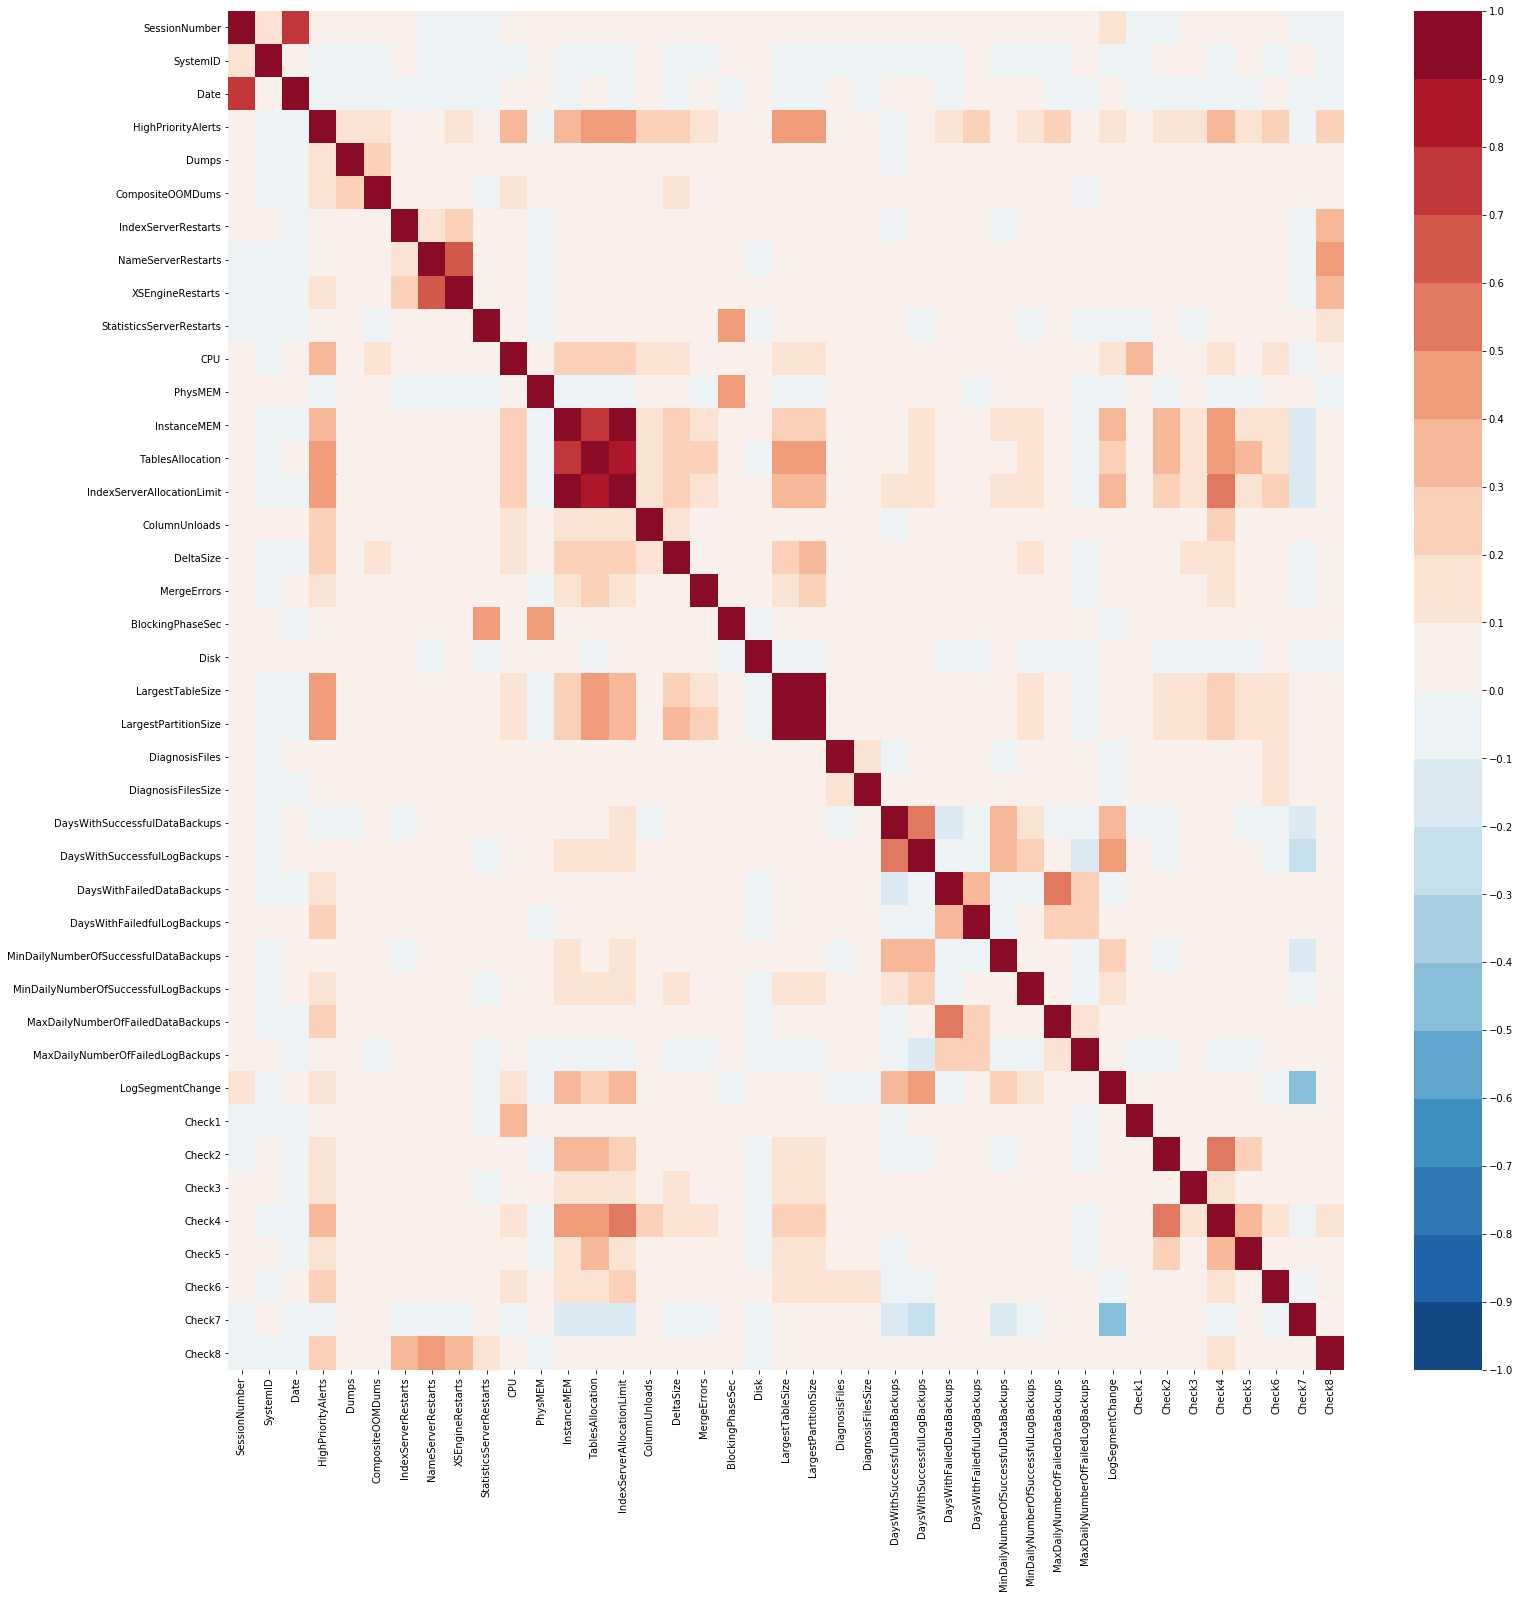

In [109]:
fig, ax = plt.subplots(figsize=(25,25))

# Calculate the correlation matrix for the data features
corr = dataScaledKNNImpute.corr()

# plot the heatmap
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            vmin=-1,
            vmax=1,
            cmap=sns.color_palette("RdBu_r", 20),
            ax = ax)

bar_color = ax.collections[0].colorbar
bar_color.set_ticks(np.arange(-1,1.1,0.1))

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
    <b>1.</b>   Correlation of the data with the Checks for our first approach.
    </div>

In [37]:
# corr_label1 = dataScaledSimpleImpute.corr()['Check1'].sort_values()[:-1]
# corr_label2 = dataScaledSimpleImpute.corr()['Check2'].sort_values()[:-1]
# corr_label3 = dataScaledSimpleImpute.corr()['Check3'].sort_values()[:-1]
# corr_label4 = dataScaledSimpleImpute.corr()['Check4'].sort_values()[:-1]
# corr_label5 = dataScaledSimpleImpute.corr()['Check5'].sort_values()[:-1]
# corr_label6 = dataScaledSimpleImpute.corr()['Check6'].sort_values()[:-1]
# corr_label7 = dataScaledSimpleImpute.corr()['Check7'].sort_values()[:-1]
# corr_label8 = dataScaledSimpleImpute.corr()['Check8'].sort_values()[:-1]

# fig, axs = plt.subplots(8,1, figsize=(50, 50), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = 1.5, wspace=.001)
# axs = axs.ravel()

# corr_label1.plot.bar(ax = axs[0])
# ax.set_title("Correlation Coefficient Between each Feature and the Anomaly 1")
# ax.set_xlabel("Feature Name")
# ax.set_ylabel("Correlation Coefficient")
# ax.grid(True)

# corr_label2.plot.bar(ax = axs[1])
# ax.set_title("Correlation Coefficient Between each Feature and the Anomaly 2")
# ax.set_xlabel("Feature Name")
# ax.set_ylabel("Correlation Coefficient")
# ax.grid(True)

# corr_label3.plot.bar(ax = axs[2])
# ax.set_title("Correlation Coefficient Between each Feature and the Anomaly 3")
# ax.set_xlabel("Feature Name")
# ax.set_ylabel("Correlation Coefficient")
# ax.grid(True)

# corr_label4.plot.bar(ax = axs[3])
# ax.set_title("Correlation Coefficient Between each Feature and the Anomaly 4")
# ax.set_xlabel("Feature Name")
# ax.set_ylabel("Correlation Coefficient")
# ax.grid(True)

# corr_label5.plot.bar(ax = axs[4])
# ax.set_title("Correlation Coefficient Between each Feature and the Anomaly 5")
# ax.set_xlabel("Feature Name")
# ax.set_ylabel("Correlation Coefficient")
# ax.grid(True)

# corr_label6.plot.bar(ax = axs[5])
# ax.set_title("Correlation Coefficient Between each Feature and the Anomaly 6")
# ax.set_xlabel("Feature Name")
# ax.set_ylabel("Correlation Coefficient")
# ax.grid(True)

# corr_label7.plot.bar(ax = axs[6])
# ax.set_title("Correlation Coefficient Between each Feature and the Anomaly 7")
# ax.set_xlabel("Feature Name")
# ax.set_ylabel("Correlation Coefficient")
# ax.grid(True)

# corr_label8.plot.bar(ax = axs[7])
# ax.set_title("Correlation Coefficient Between each Feature and the Anomaly 8")
# ax.set_xlabel("Feature Name")
# ax.set_ylabel("Correlation Coefficient")
# ax.grid(True)

# plt.show()

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
    <b>2.</b>    Correlation of the data with the Checks for our second approach.
    </div>

In [106]:
columns_low_correlation = []
a= 0.01

for i in range(0,corr_label1.size-1):
    att = corr_label1.index[i]
    if ((att!='Check1') & (att!='Check2') & (att!='Check3') & (att!='Check4') & (att!='Check5') & (att!='Check6') & (att!='Check7') & (att!='Check8')):
        if ((corr_label1[att] < a) & (corr_label2[att] < a) & (corr_label3[att] < a) & (corr_label4[att] < a) & (corr_label5[att] < a) & (corr_label6[att] < a) & (corr_label7[att] < a) & (corr_label8[att] < a)):
            columns_low_correlation.append(att)
            
print(columns_low_correlation)

[]


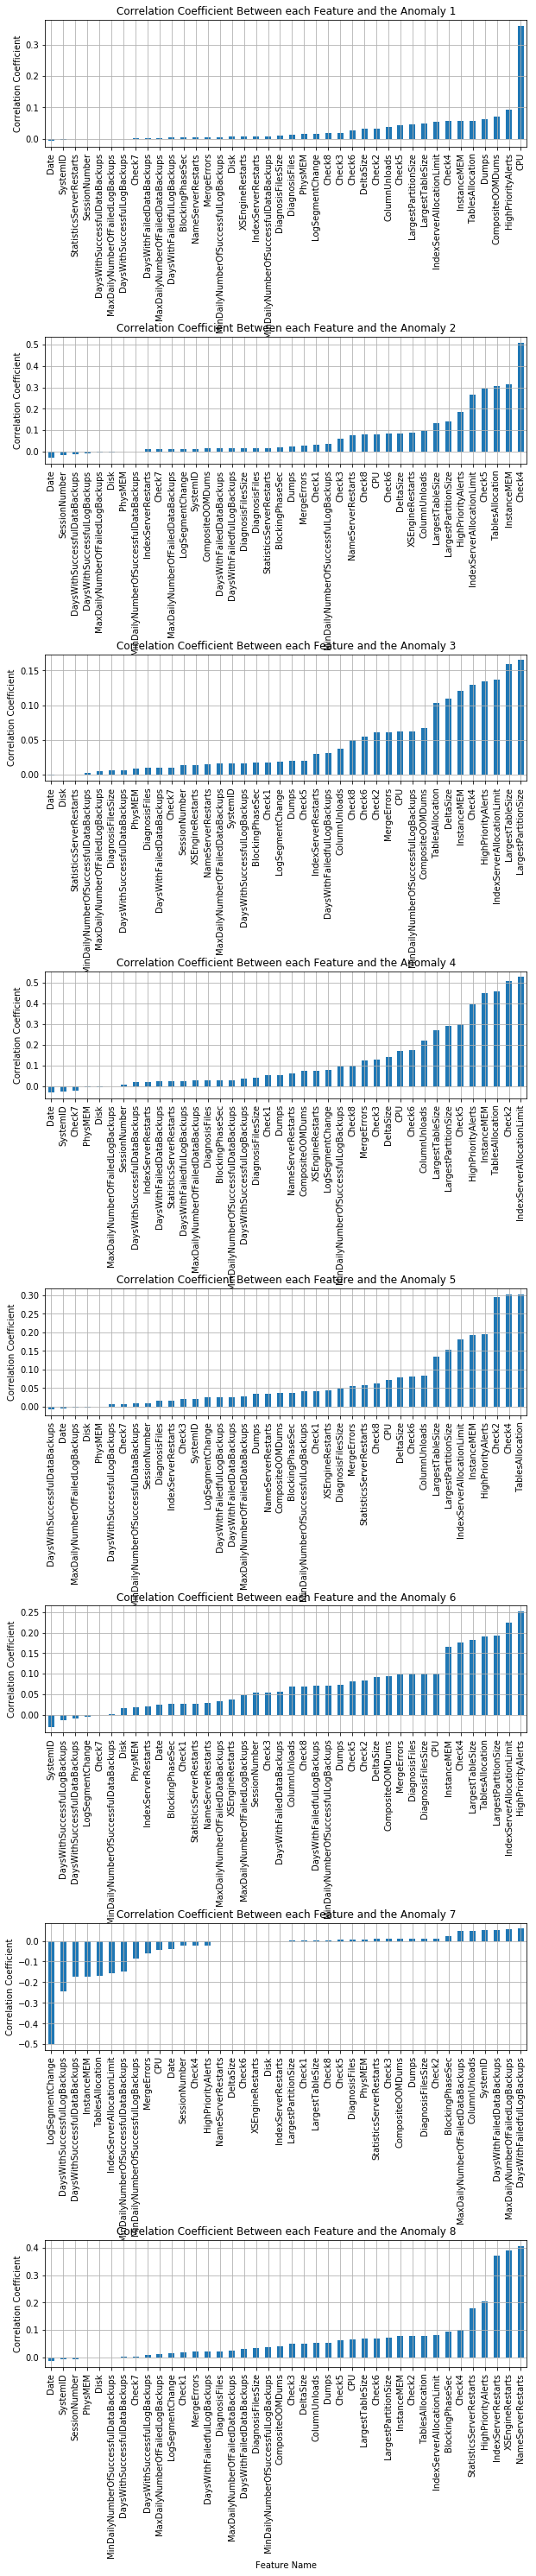

In [39]:
corr_label1 = dataScaledKNNImpute.corr()['Check1'].sort_values()[:-1]
corr_label2 = dataScaledKNNImpute.corr()['Check2'].sort_values()[:-1]
corr_label3 = dataScaledKNNImpute.corr()['Check3'].sort_values()[:-1]
corr_label4 = dataScaledKNNImpute.corr()['Check4'].sort_values()[:-1]
corr_label5 = dataScaledKNNImpute.corr()['Check5'].sort_values()[:-1]
corr_label6 = dataScaledKNNImpute.corr()['Check6'].sort_values()[:-1]
corr_label7 = dataScaledKNNImpute.corr()['Check7'].sort_values()[:-1]
corr_label8 = dataScaledKNNImpute.corr()['Check8'].sort_values()[:-1]

fig, axs = plt.subplots(8,1, figsize=(10, 50), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1.5, wspace=.001)
axs = axs.ravel()

corr_label1.plot.bar(ax = axs[0])
ax = axs[0]
ax.set_title("Correlation Coefficient Between each Feature and the Anomaly 1")
ax.set_xlabel("Feature Name")
ax.set_ylabel("Correlation Coefficient")
ax.grid(True)

corr_label2.plot.bar(ax = axs[1])
ax = axs[1]
ax.set_title("Correlation Coefficient Between each Feature and the Anomaly 2")
ax.set_xlabel("Feature Name")
ax.set_ylabel("Correlation Coefficient")
ax.grid(True)

corr_label3.plot.bar(ax = axs[2])
ax = axs[2]
ax.set_title("Correlation Coefficient Between each Feature and the Anomaly 3")
ax.set_xlabel("Feature Name")
ax.set_ylabel("Correlation Coefficient")
ax.grid(True)

corr_label4.plot.bar(ax = axs[3])
ax = axs[3]
ax.set_title("Correlation Coefficient Between each Feature and the Anomaly 4")
ax.set_xlabel("Feature Name")
ax.set_ylabel("Correlation Coefficient")
ax.grid(True)

corr_label5.plot.bar(ax = axs[4])
ax = axs[4]
ax.set_title("Correlation Coefficient Between each Feature and the Anomaly 5")
ax.set_xlabel("Feature Name")
ax.set_ylabel("Correlation Coefficient")
ax.grid(True)

corr_label6.plot.bar(ax = axs[5])
ax = axs[5]
ax.set_title("Correlation Coefficient Between each Feature and the Anomaly 6")
ax.set_xlabel("Feature Name")
ax.set_ylabel("Correlation Coefficient")
ax.grid(True)

corr_label7.plot.bar(ax = axs[6])
ax = axs[6]
ax.set_title("Correlation Coefficient Between each Feature and the Anomaly 7")
ax.set_xlabel("Feature Name")
ax.set_ylabel("Correlation Coefficient")
ax.grid(True)

corr_label8.plot.bar(ax = axs[7])
ax = axs[7]
ax.set_title("Correlation Coefficient Between each Feature and the Anomaly 8")
ax.set_xlabel("Feature Name")
ax.set_ylabel("Correlation Coefficient")
ax.grid(True)

plt.show()

# print(corr_label1)

#### Splitting the dataset

<div class="alert alert-success" style="background-color: AliceBlue; border-color: CornflowerBlue "> 
    We prepare our datasets for the models, splitting them into trainning and test data.
    </div>

In [35]:
# Split of dataSimpleImpute
trainSimpleImpute, testSimpleImpute = train_test_split(dataSimpleImpute, train_size = 0.8, test_size = 0.2, random_state = 12)
trainScaledSimpleImpute, testScaledSimpleImpute = train_test_split(dataScaledSimpleImpute, train_size = 0.8, test_size = 0.2, random_state = 12)

# Split of dataKNNImpute
trainKNNImpute, testKNNImpute = train_test_split(dataKNNImpute, train_size = 0.8, test_size = 0.2, random_state = 12)
trainScaledKNNImpute, testScaledKNNImpute = train_test_split(dataScaledKNNImpute, train_size = 0.8, test_size = 0.2, random_state = 12)

## Task 3 - Model Selection

In [ ]:
# Model ranking dataframe
modelPerformanceDF = pd.DataFrame(columns=['ModelName', 'Check1AUC', 'Check2AUC', 'Check3AUC', 'Check4AUC', 'Check5AUC', 'Check6AUC', 'Check7AUC', 'Check8AUC'])
modelPerformanceDict = {}

### Logistic Regression

#### Dataset w/ Simple Imputation

Fold:  1  - Elapsed time =  29.3936 s



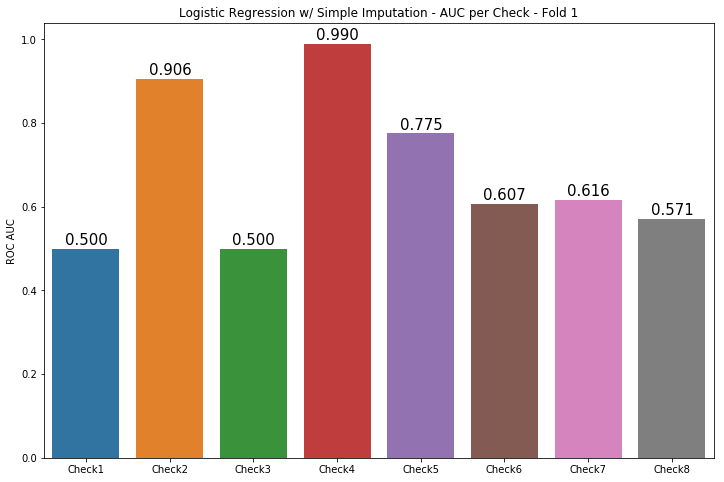

Fold:  2  - Elapsed time =  27.1971 s



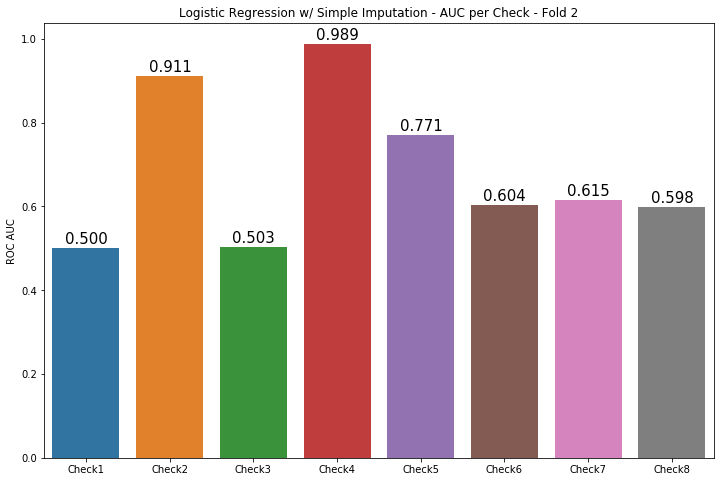

Fold:  3  - Elapsed time =  27.4851 s



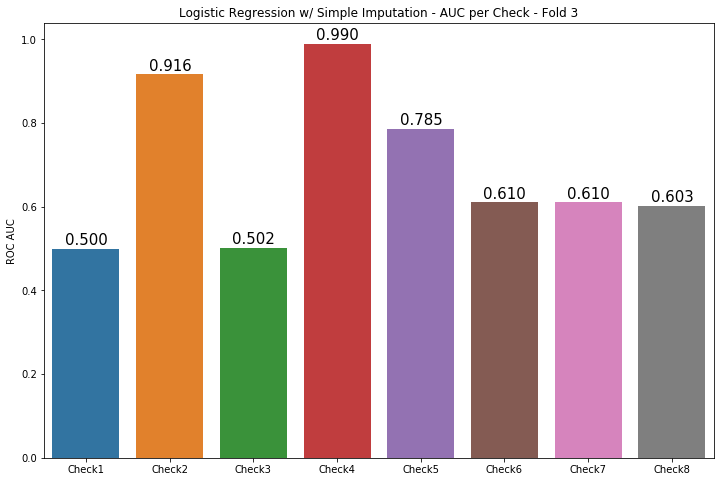

Fold:  4  - Elapsed time =  27.0506 s



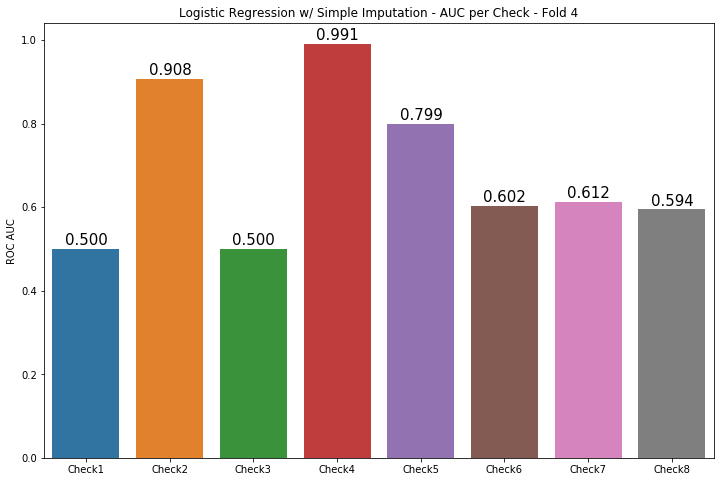

Fold:  5  - Elapsed time =  27.4302 s



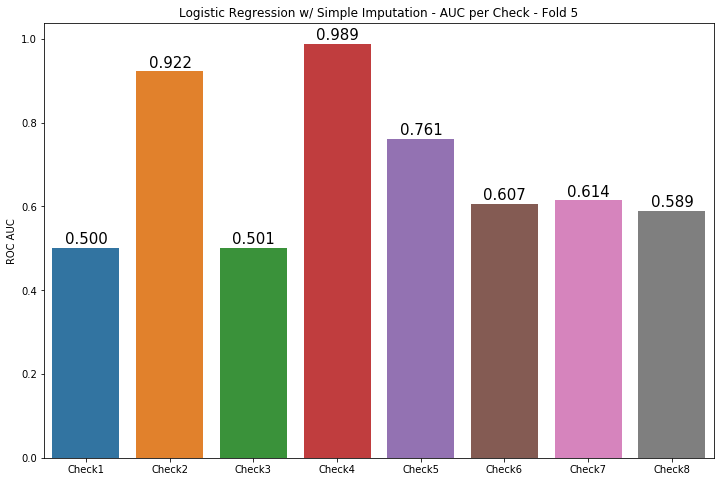

Fold:  6  - Elapsed time =  28.3450 s



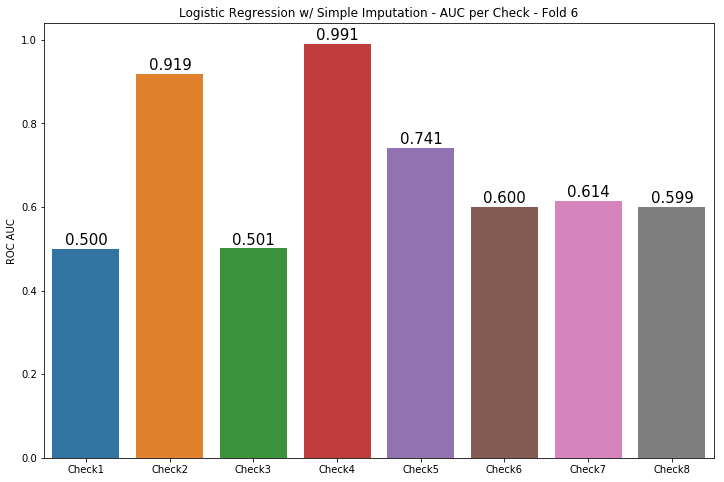

Fold:  7  - Elapsed time =  27.8079 s



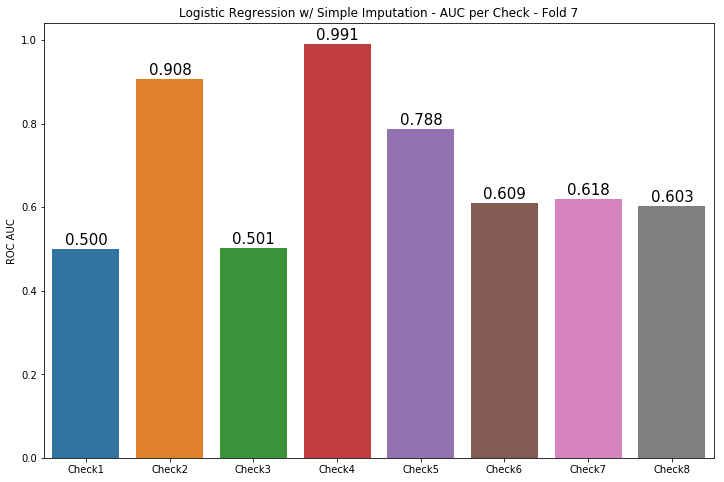

Fold:  8  - Elapsed time =  27.5611 s



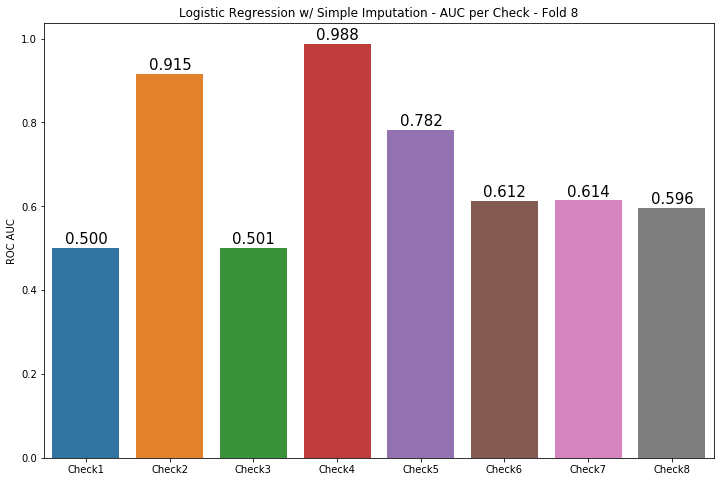

Fold:  9  - Elapsed time =  28.3818 s



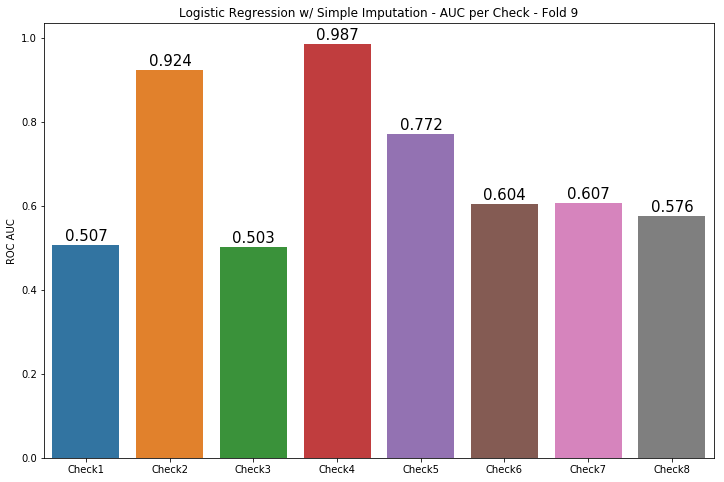

Fold:  10  - Elapsed time =  27.6986 s



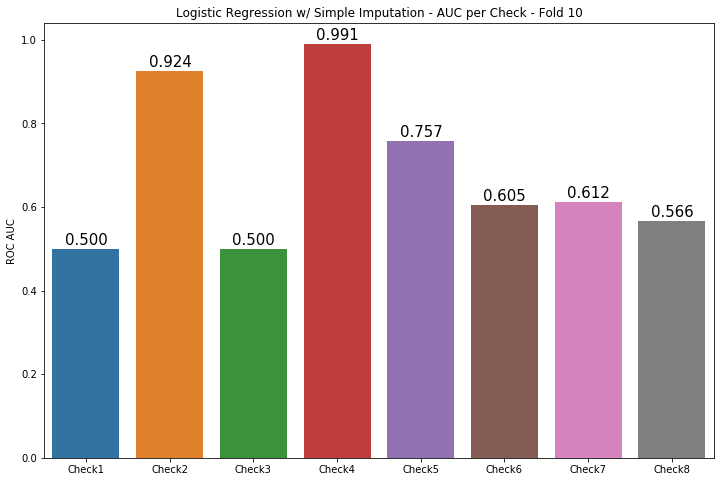

In [ ]:
folds = 10

stkf = KFold(n_splits=folds,shuffle=False)

totalScores = np.zeros(8)

for i, (train_index, val_index) in enumerate(stkf.split(trainScaledSimpleImpute)):
    
    # Initialize Timer
    start = time.time()
    
    # Create a Logistic Regression Model
    lg = LogisticRegression(solver='liblinear')
    ovr_classifier = OneVsRestClassifier(estimator = lg)
    ovr_classifier.fit(trainScaledSimpleImpute[attrsSimpleImpute].iloc[train_index], trainScaledSimpleImpute[labels].iloc[train_index])
    
    
    preds = ovr_classifier.predict(trainScaledSimpleImpute[attrsSimpleImpute].iloc[val_index])
    scorePerCheck = roc_auc_score(trainScaledSimpleImpute[labels].iloc[val_index], preds, average = None)
    
    totalScores += scorePerCheck
    
    end = time.time()
    dur = end - start
    
    print("===================================================================================")
    print("Fold: ", i+1, " - Elapsed time = ","%.4f" % dur,"s")
    print("===================================================================================")
    print()
    
    plt.figure(figsize=(12,8))
    sns.barplot(np.arange(8),scorePerCheck)
    plt.xticks(np.arange(8),labels)
    plt.title(str("Logistic Regression w/ Simple Imputation - AUC per Check - Fold "+str(i+1)))
    plt.ylabel("ROC AUC")
    for i, score in enumerate(scorePerCheck):
        plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
    plt.show()

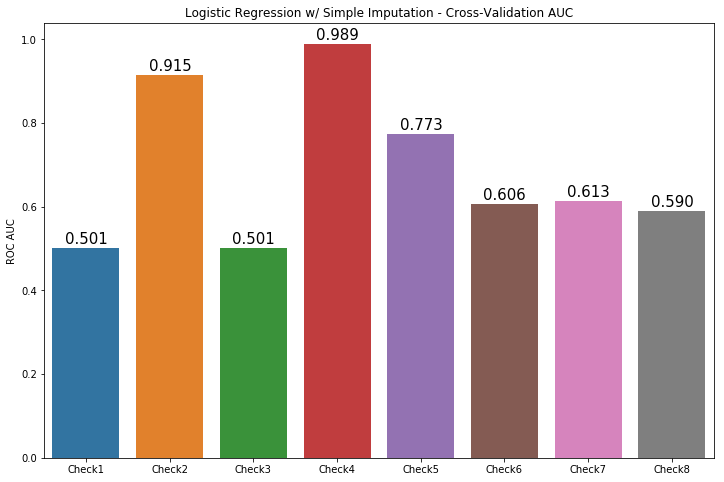

In [ ]:
totalScores /= folds

modelPerformanceDict['ModelName'] = 'Logistic Regression w/ Simple Impute'
for score, column in zip(totalScores, modelPerformanceDF.columns[1:]):
    modelPerformanceDict[column] = score

modelPerformanceDF = modelPerformanceDF.append(modelPerformanceDict, ignore_index=True)

plt.figure(figsize=(12,8))
sns.barplot(np.arange(8),totalScores)
plt.xticks(np.arange(8),labels)
plt.title("Logistic Regression w/ Simple Imputation - Cross-Validation AUC")
plt.ylabel("ROC AUC")
for i, score in enumerate(totalScores):
    plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
plt.show()

#### Dataset w/ KNN Imputation

Fold:  1  - Elapsed time =  25.8127 s



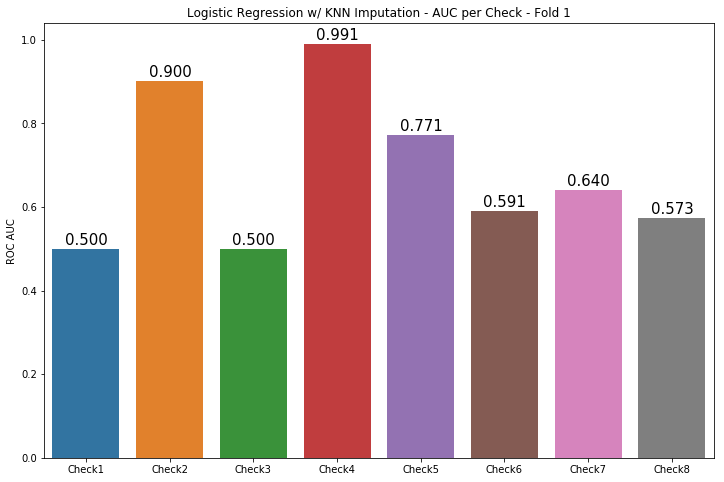

Fold:  2  - Elapsed time =  25.8625 s



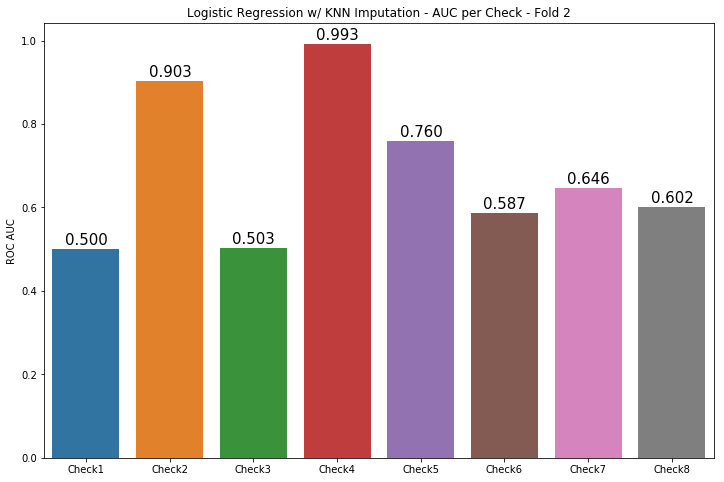

Fold:  3  - Elapsed time =  26.1230 s



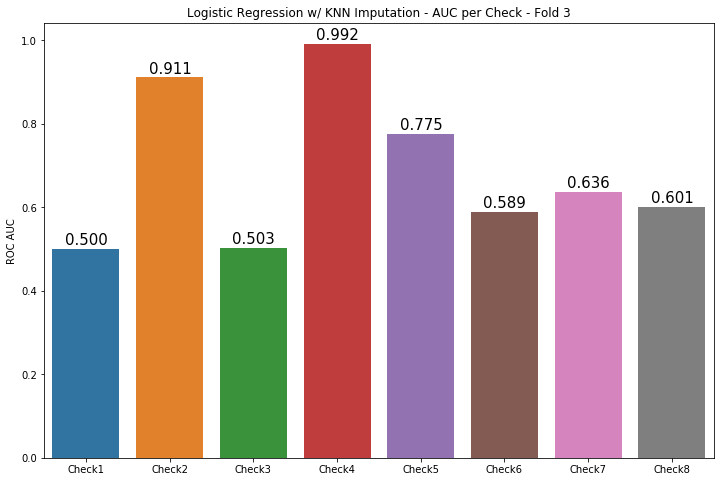

Fold:  4  - Elapsed time =  26.0209 s



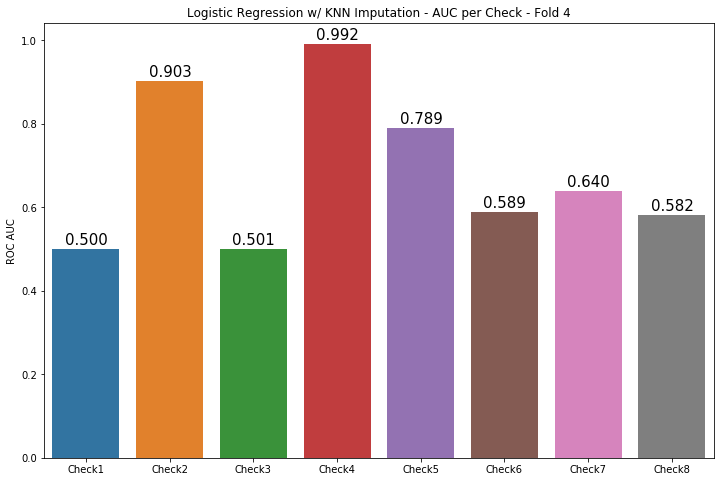

Fold:  5  - Elapsed time =  25.5179 s



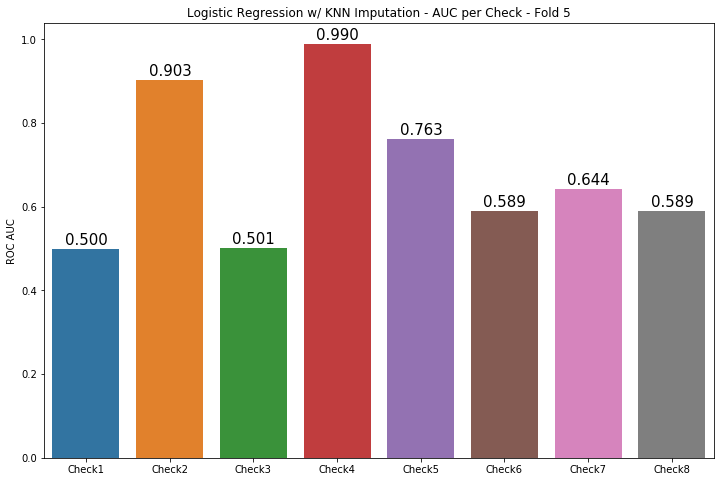

Fold:  6  - Elapsed time =  26.3613 s



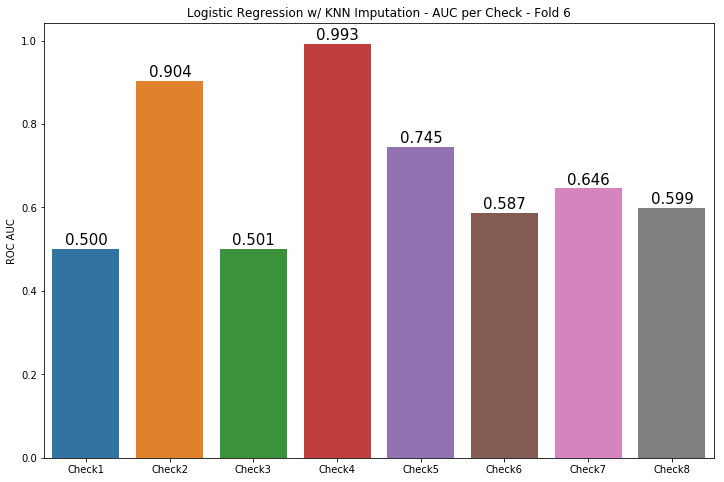

Fold:  7  - Elapsed time =  26.3025 s



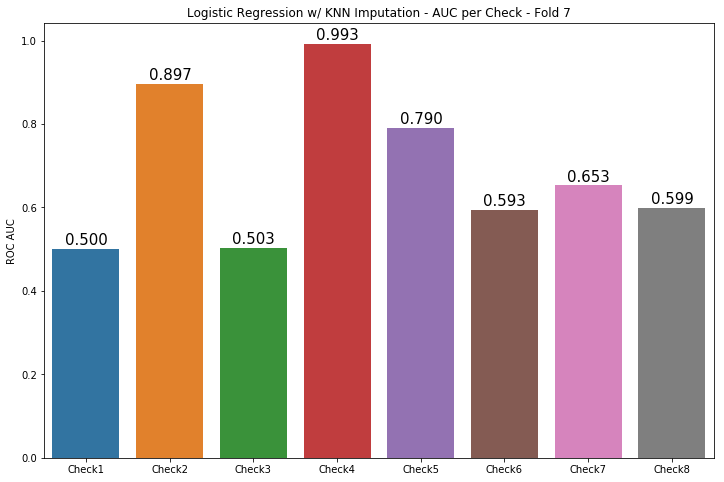

Fold:  8  - Elapsed time =  26.1490 s



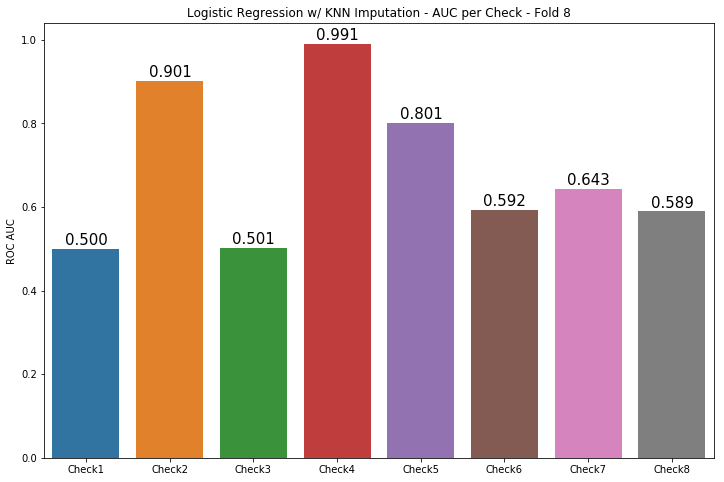

Fold:  9  - Elapsed time =  26.5056 s



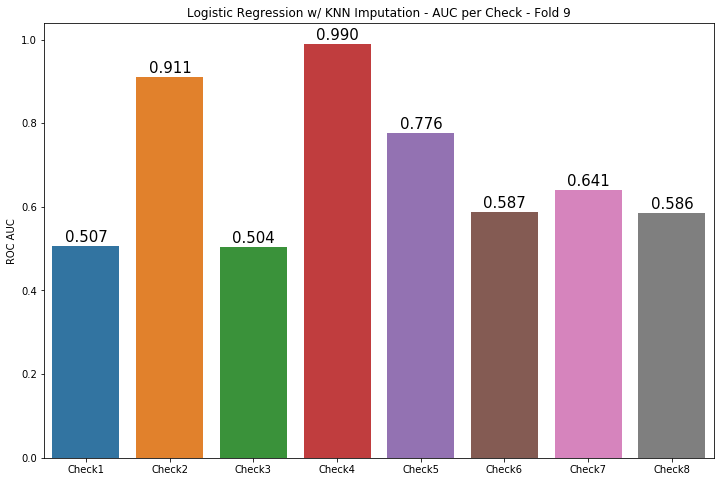

Fold:  10  - Elapsed time =  25.5142 s



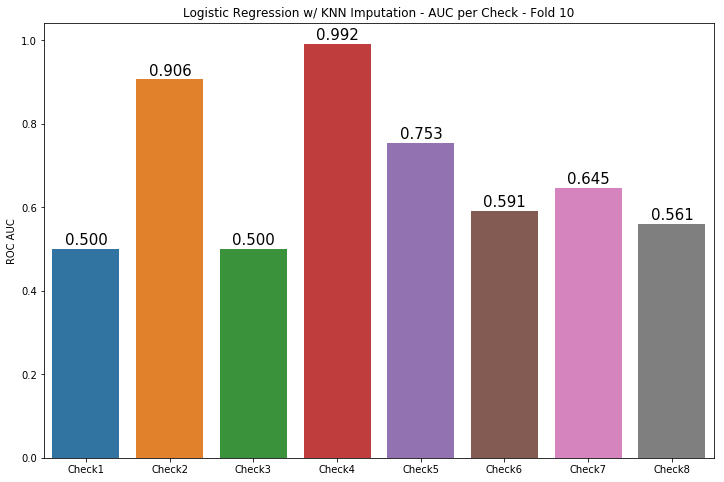

In [ ]:
folds = 10

stkf = KFold(n_splits=folds,shuffle=False)

totalScores = np.zeros(8)

for i, (train_index, val_index) in enumerate(stkf.split(trainScaledSimpleImpute)):
    
    # Initialize Timer
    start = time.time()
    
    # Create a Logistic Regression Model
    lg = LogisticRegression(solver='liblinear')
    ovr_classifier = OneVsRestClassifier(estimator = lg)
    ovr_classifier.fit(trainScaledKNNImpute[attrs].iloc[train_index], trainScaledKNNImpute[labels].iloc[train_index])
    
    
    preds = ovr_classifier.predict(trainScaledKNNImpute[attrs].iloc[val_index])
    scorePerCheck = roc_auc_score(trainScaledKNNImpute[labels].iloc[val_index], preds, average = None)
    
    totalScores += scorePerCheck
    
    end = time.time()
    dur = end - start
    
    print("===================================================================================")
    print("Fold: ", i+1, " - Elapsed time = ","%.4f" % dur,"s")
    print("===================================================================================")
    print()
    
    plt.figure(figsize=(12,8))
    sns.barplot(np.arange(8),scorePerCheck)
    plt.xticks(np.arange(8),labels)
    plt.title(str("Logistic Regression w/ KNN Imputation - AUC per Check - Fold "+str(i+1)))
    plt.ylabel("ROC AUC")
    for i, score in enumerate(scorePerCheck):
        plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
    plt.show()

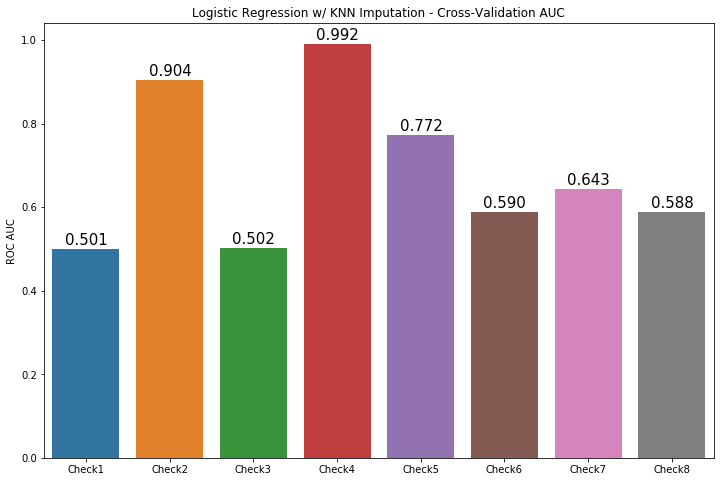

In [ ]:
totalScores /= folds

modelPerformanceDict['ModelName'] = 'Logistic Regression w/ KNN Impute'
for score, column in zip(totalScores, modelPerformanceDF.columns[1:]):
    modelPerformanceDict[column] = score

modelPerformanceDF = modelPerformanceDF.append(modelPerformanceDict, ignore_index=True)

plt.figure(figsize=(12,8))
sns.barplot(np.arange(8),totalScores)
plt.xticks(np.arange(8),labels)
plt.title("Logistic Regression w/ KNN Imputation - Cross-Validation AUC")
plt.ylabel("ROC AUC")
for i, score in enumerate(totalScores):
    plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
plt.show()

### Support Vector Machine

In [ ]:
# folds = 10

# stkf = KFold(n_splits=folds,shuffle=False)

# totalScores = np.zeros(8)

# for i, (train_index, val_index) in enumerate(stkf.split(train_scaled)):
    
#     # Initialize Timer
#     start = time.time()
    
#     # Create a Logistic Regression Model
#     svm = SVC(kernel = 'linear', C = 1)
#     ovr_classifier = OneVsRestClassifier(estimator = svm)
#     ovr_classifier.fit(train_scaled[attrs].iloc[train_index], train_scaled[labels].iloc[train_index])
    
    
#     preds = ovr_classifier.predict(train_scaled[attrs].iloc[val_index])
#     scorePerCheck = roc_auc_score(train_scaled[labels].iloc[val_index], preds, average = None)
    
#     totalScores += scorePerCheck
    
#     end = time.time()
#     dur = end - start
    
#     print("===================================================================================")
#     print("Fold: ", i+1, " - Elapsed time = ","%.4f" % dur,"s")
#     print("===================================================================================")
#     print()
    
#     plt.figure(figsize=(12,8))
#     sns.barplot(np.arange(8),scorePerCheck)
#     plt.xticks(np.arange(8),labels)
#     plt.title(str("Logistic Regression - AUC per Check - Fold "+str(i+1)))
#     plt.ylabel("ROC AUC")
#     for i, score in enumerate(scorePerCheck):
#         plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
#     plt.show()

### Naive Bayes Classifier

#### Dataset w/ Simple Imputation

Fold:  1  - Elapsed time =  1.2948 s



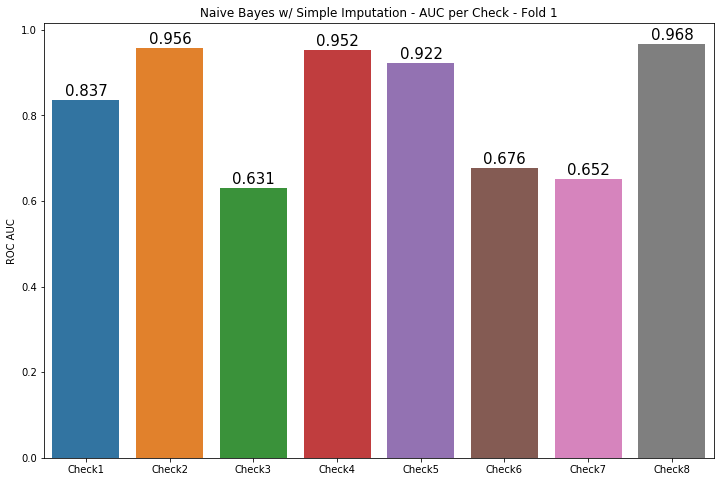

Fold:  2  - Elapsed time =  1.2551 s



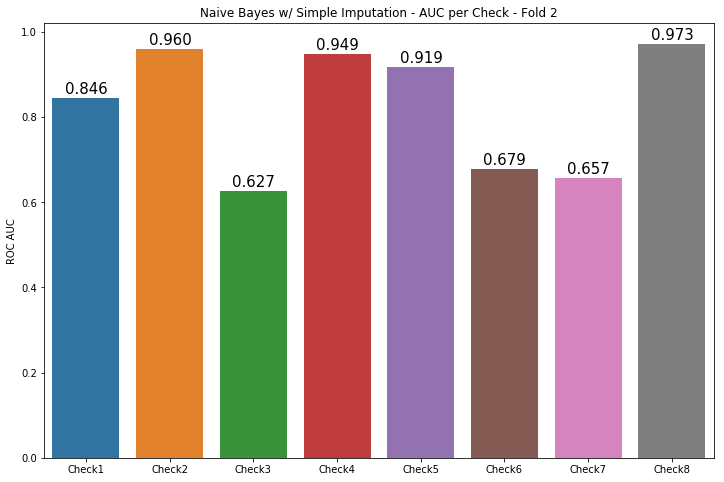

Fold:  3  - Elapsed time =  1.2562 s



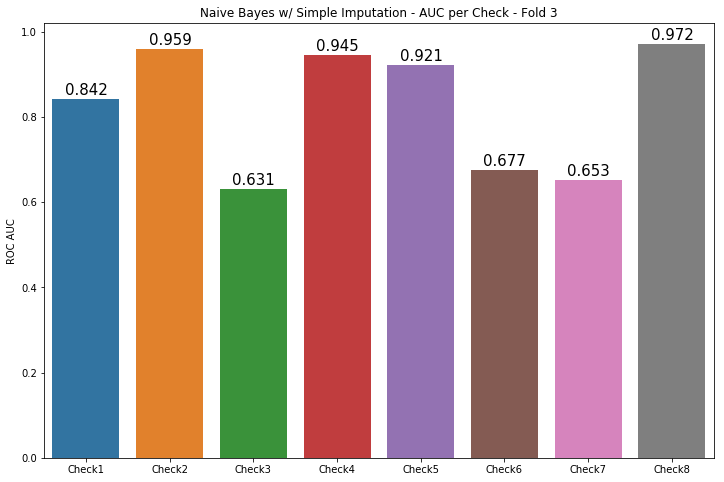

Fold:  4  - Elapsed time =  1.2725 s



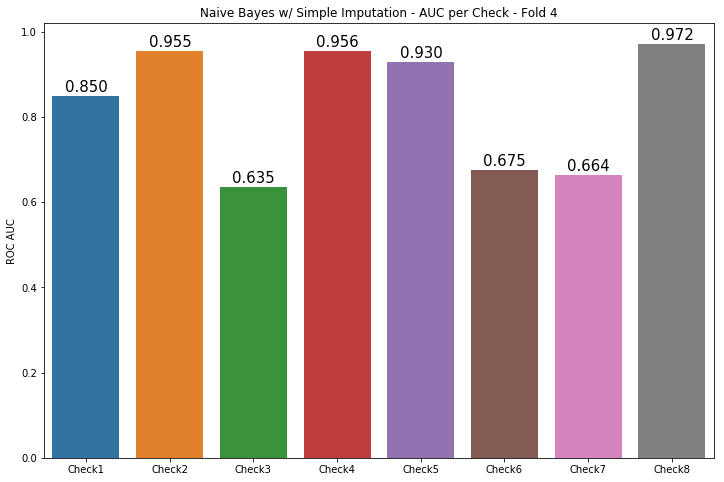

Fold:  5  - Elapsed time =  1.2346 s



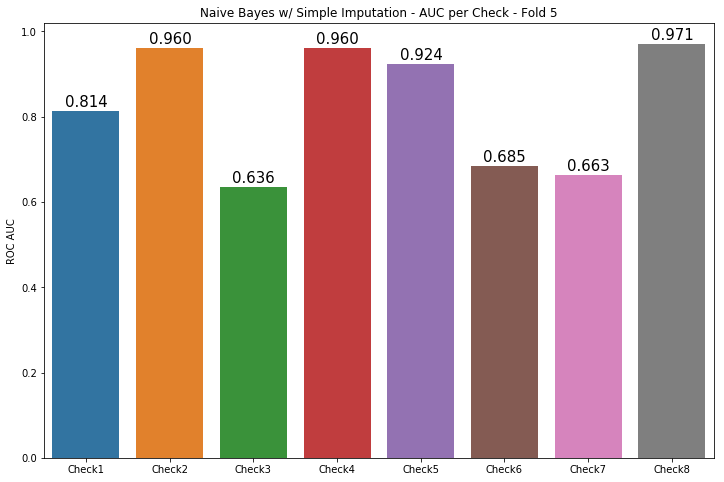

Fold:  6  - Elapsed time =  1.2269 s



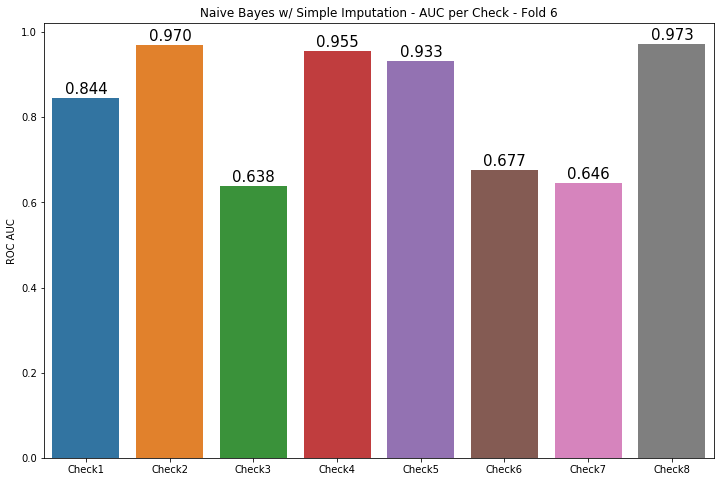

Fold:  7  - Elapsed time =  1.2406 s



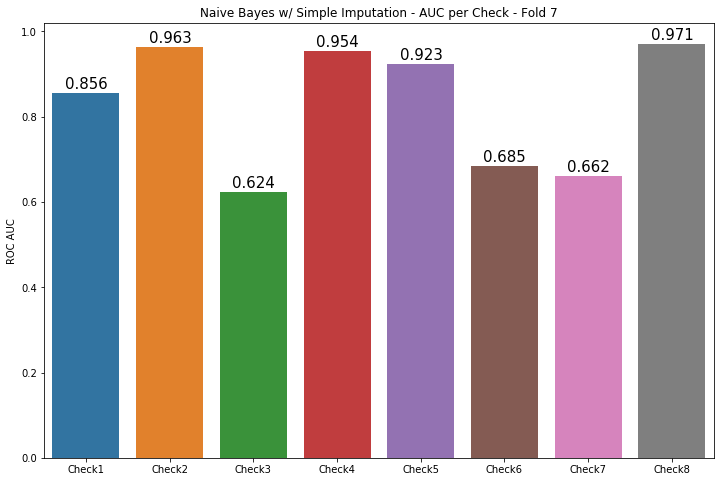

Fold:  8  - Elapsed time =  1.2352 s



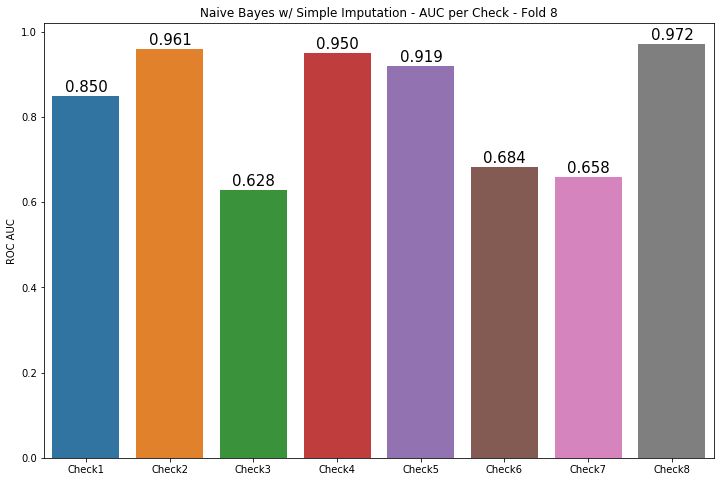

Fold:  9  - Elapsed time =  1.2313 s



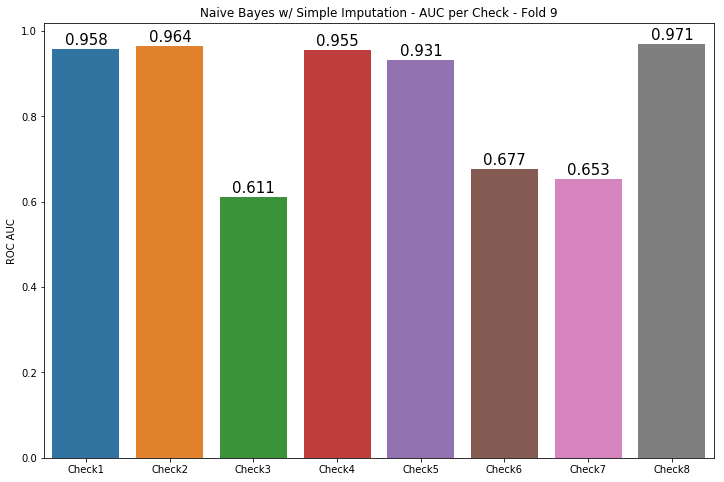

Fold:  10  - Elapsed time =  1.2374 s



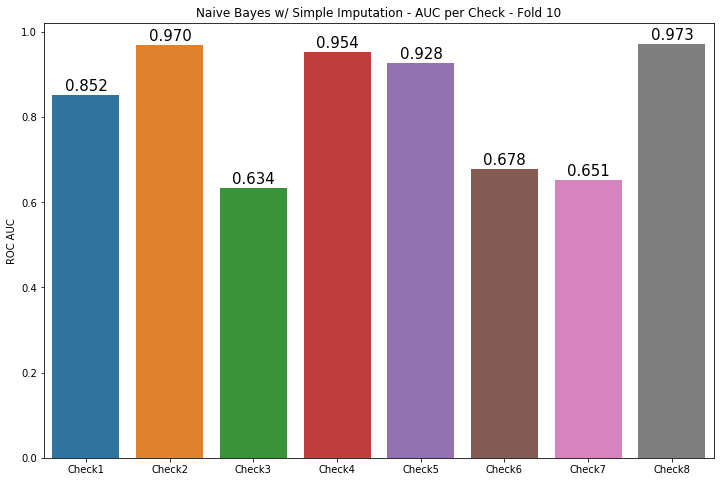

In [ ]:
folds = 10

stkf = KFold(n_splits=folds,shuffle=False)

totalScores = np.zeros(8)

for i, (train_index, val_index) in enumerate(stkf.split(trainScaledSimpleImpute)):
    
    # Initialize Timer
    start = time.time()
    
    # Create a Logistic Regression Model
    nbc = GaussianNB()
    ovr_classifier = OneVsRestClassifier(estimator = nbc)
    ovr_classifier.fit(trainScaledSimpleImpute[attrsSimpleImpute].iloc[train_index], trainScaledSimpleImpute[labels].iloc[train_index])
    
    
    preds = ovr_classifier.predict(trainScaledSimpleImpute[attrsSimpleImpute].iloc[val_index])
    scorePerCheck = roc_auc_score(trainScaledSimpleImpute[labels].iloc[val_index], preds, average = None)
    
    totalScores += scorePerCheck
    
    end = time.time()
    dur = end - start
    
    print("===================================================================================")
    print("Fold: ", i+1, " - Elapsed time = ","%.4f" % dur,"s")
    print("===================================================================================")
    print()
    
    plt.figure(figsize=(12,8))
    sns.barplot(np.arange(8),scorePerCheck)
    plt.xticks(np.arange(8),labels)
    plt.title(str("Naive Bayes w/ Simple Imputation - AUC per Check - Fold "+str(i+1)))
    plt.ylabel("ROC AUC")
    for i, score in enumerate(scorePerCheck):
        plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)

    plt.show()

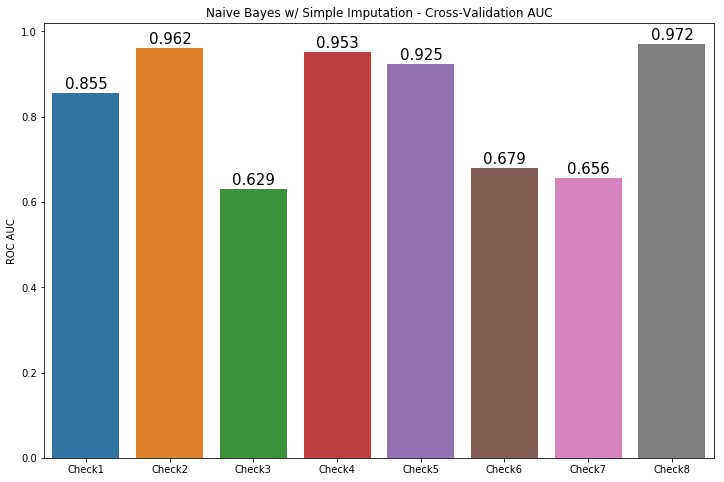

In [ ]:
totalScores /= folds

modelPerformanceDict['ModelName'] = 'Naive Bayes w/ Simple Imputation'
for score, column in zip(totalScores, modelPerformanceDF.columns[1:]):
    modelPerformanceDict[column] = score

modelPerformanceDF = modelPerformanceDF.append(modelPerformanceDict, ignore_index=True)

plt.figure(figsize=(12,8))
sns.barplot(np.arange(8),totalScores)
plt.xticks(np.arange(8),labels)
plt.title("Naive Bayes w/ Simple Imputation - Cross-Validation AUC")
plt.ylabel("ROC AUC")
for i, score in enumerate(totalScores):
    plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
plt.show()

#### Dataset w/ KNN Imputation

Fold:  1  - Elapsed time =  1.3047 s



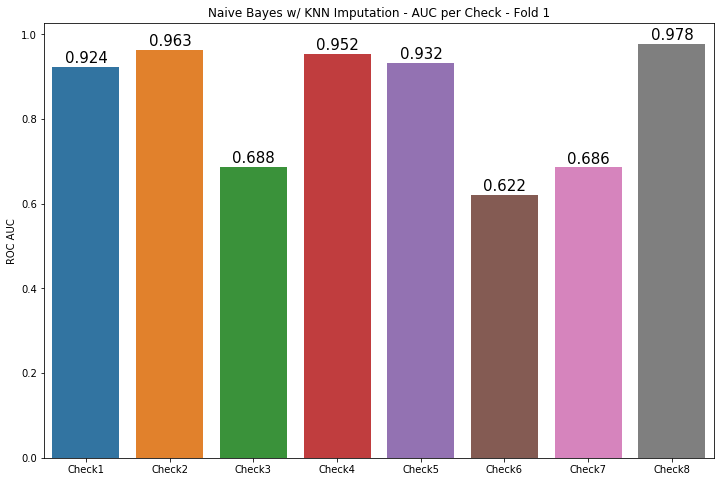

Fold:  2  - Elapsed time =  1.2519 s



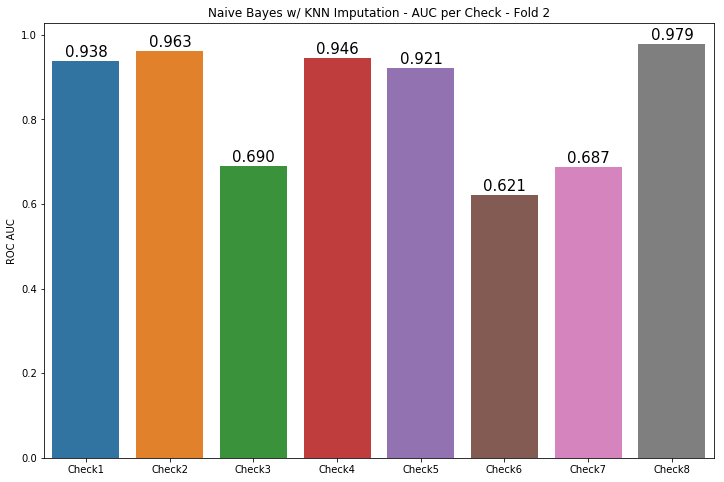

Fold:  3  - Elapsed time =  1.2639 s



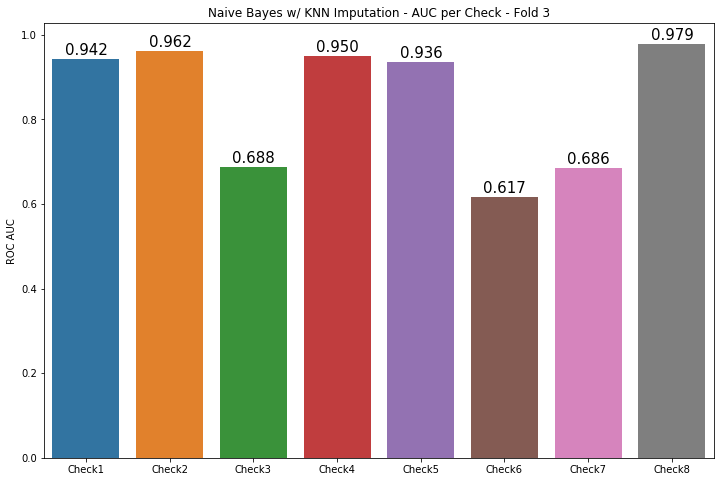

Fold:  4  - Elapsed time =  1.2541 s



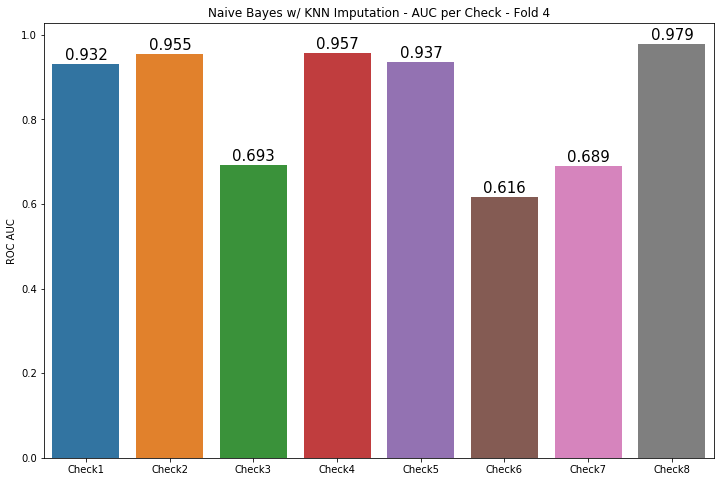

Fold:  5  - Elapsed time =  1.2241 s



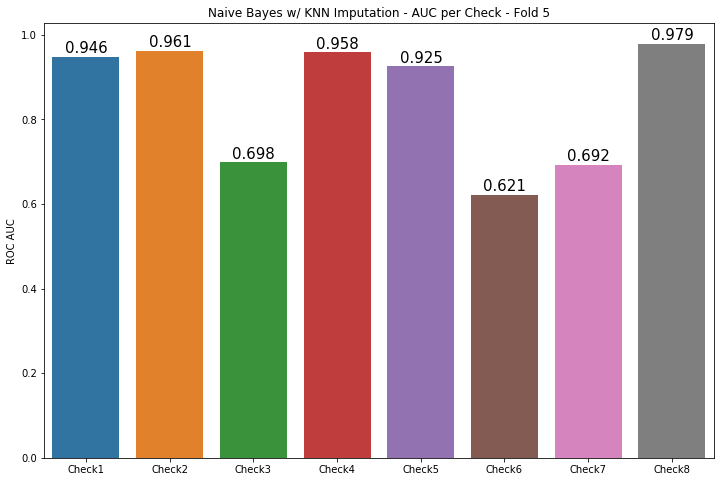

Fold:  6  - Elapsed time =  1.2230 s



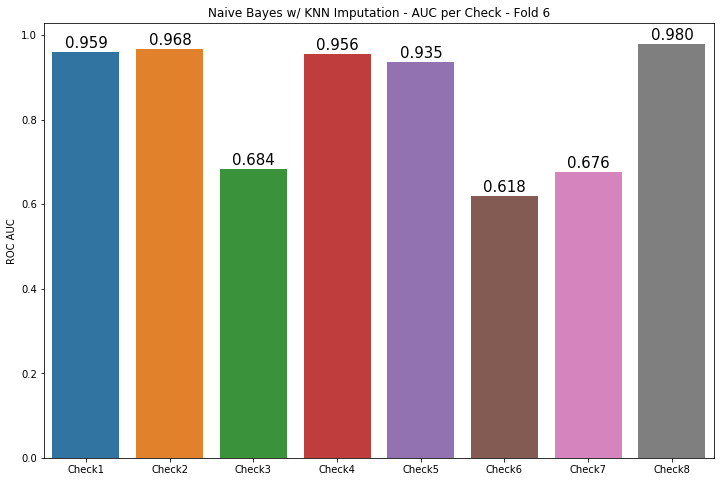

Fold:  7  - Elapsed time =  1.2348 s



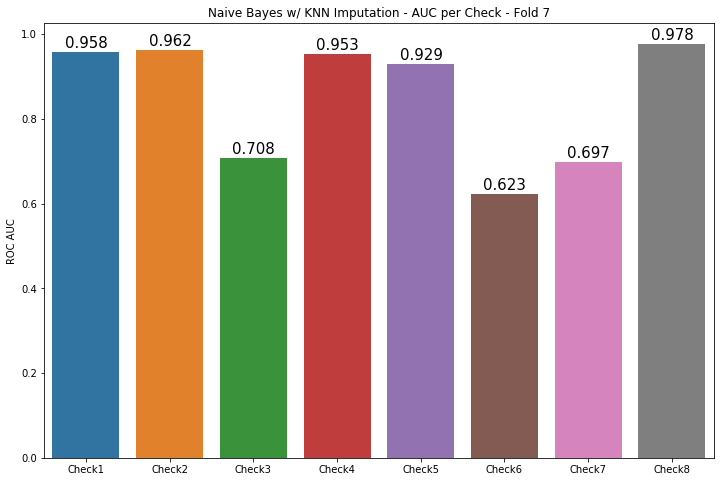

Fold:  8  - Elapsed time =  1.2481 s



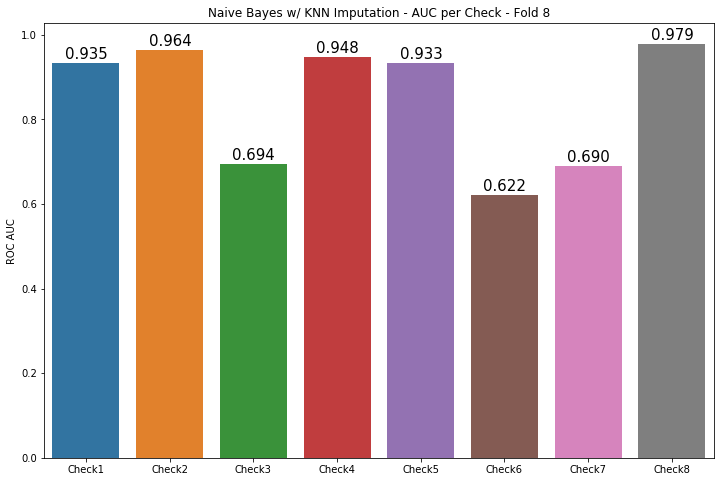

Fold:  9  - Elapsed time =  1.2393 s



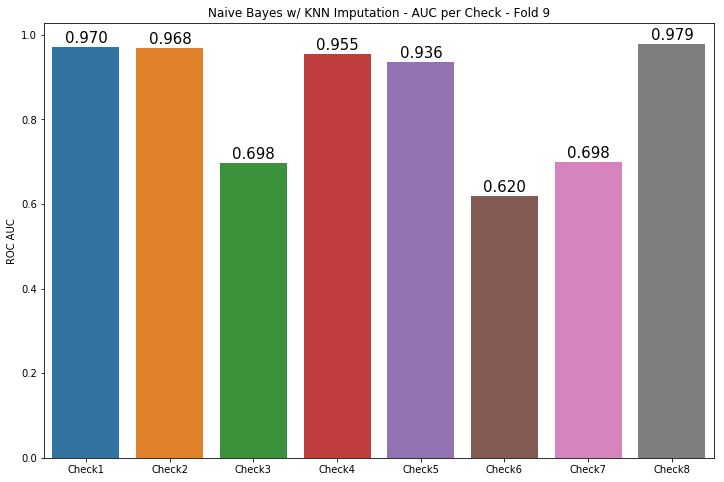

Fold:  10  - Elapsed time =  1.2232 s



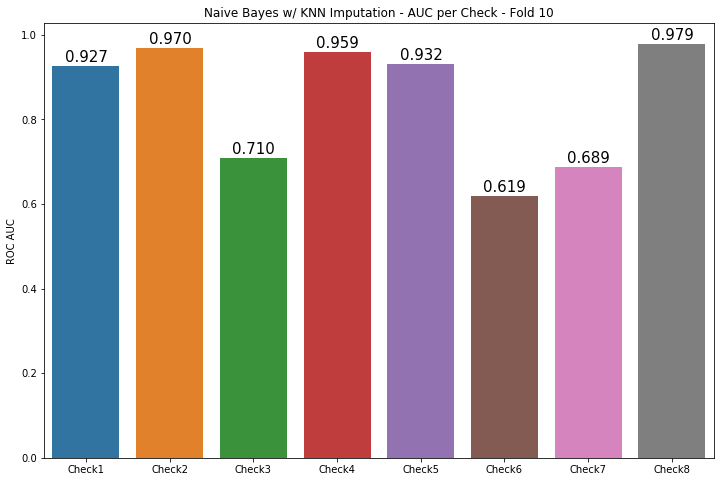

In [ ]:
folds = 10

stkf = KFold(n_splits=folds,shuffle=False)

totalScores = np.zeros(8)

for i, (train_index, val_index) in enumerate(stkf.split(trainScaledKNNImpute)):
    
    # Initialize Timer
    start = time.time()
    
    # Create a Logistic Regression Model
    nbc = GaussianNB()
    ovr_classifier = OneVsRestClassifier(estimator = nbc)
    ovr_classifier.fit(trainScaledKNNImpute[attrs].iloc[train_index], trainScaledKNNImpute[labels].iloc[train_index])
    
    
    preds = ovr_classifier.predict(trainScaledKNNImpute[attrs].iloc[val_index])
    scorePerCheck = roc_auc_score(trainScaledKNNImpute[labels].iloc[val_index], preds, average = None)
    
    totalScores += scorePerCheck
    
    end = time.time()
    dur = end - start
    
    print("===================================================================================")
    print("Fold: ", i+1, " - Elapsed time = ","%.4f" % dur,"s")
    print("===================================================================================")
    print()
    
    plt.figure(figsize=(12,8))
    sns.barplot(np.arange(8),scorePerCheck)
    plt.xticks(np.arange(8),labels)
    plt.title(str("Naive Bayes w/ KNN Imputation - AUC per Check - Fold "+str(i+1)))
    plt.ylabel("ROC AUC")
    for i, score in enumerate(scorePerCheck):
        plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)

    plt.show()

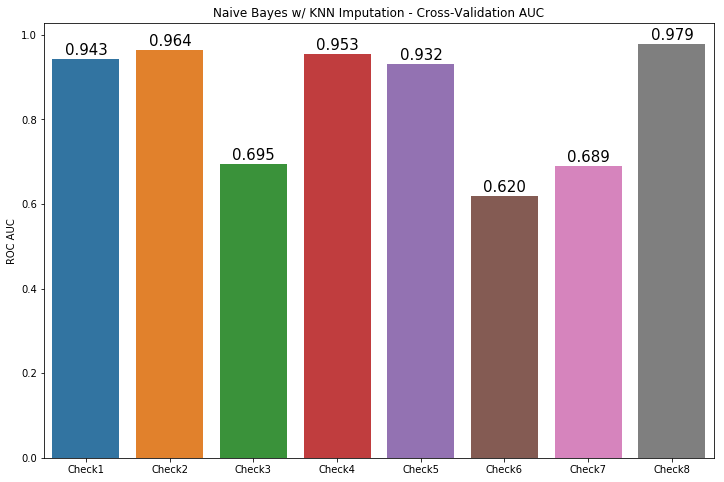

In [ ]:
totalScores /= folds

modelPerformanceDict['ModelName'] = 'Naive Bayes w/ KNN Imputation'
for score, column in zip(totalScores, modelPerformanceDF.columns[1:]):
    modelPerformanceDict[column] = score

modelPerformanceDF = modelPerformanceDF.append(modelPerformanceDict, ignore_index=True)

plt.figure(figsize=(12,8))
sns.barplot(np.arange(8),totalScores)
plt.xticks(np.arange(8),labels)
plt.title("Naive Bayes w/ KNN Imputation - Cross-Validation AUC")
plt.ylabel("ROC AUC")
for i, score in enumerate(totalScores):
    plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
plt.show()

### Decision Tree

#### Unscaled Dataset w/ Simple Imputation

Fold:  1  - Elapsed time =  19.6735 s



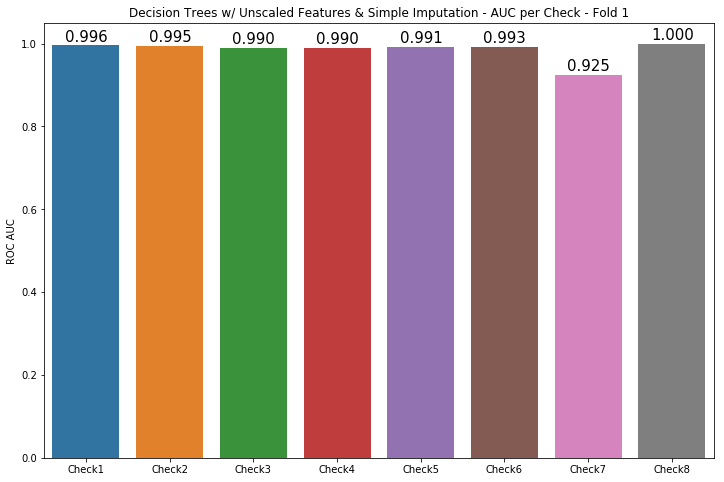

Fold:  2  - Elapsed time =  19.8689 s



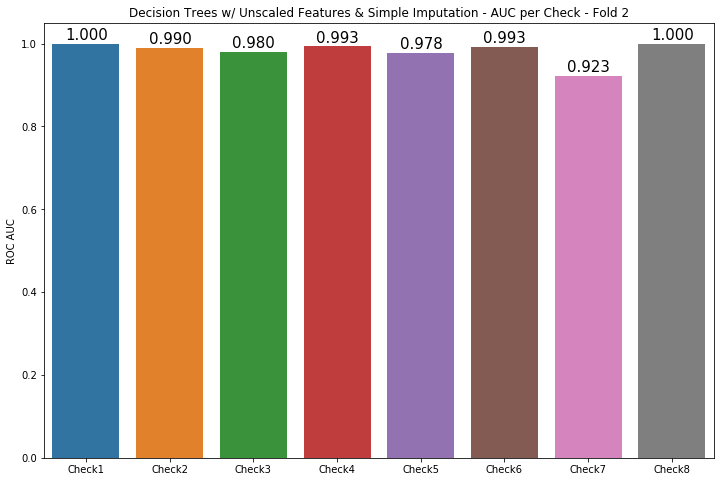

Fold:  3  - Elapsed time =  20.0810 s



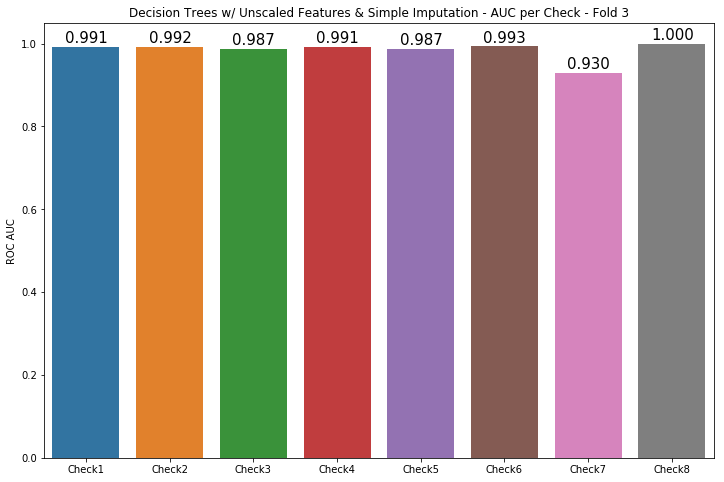

Fold:  4  - Elapsed time =  19.9665 s



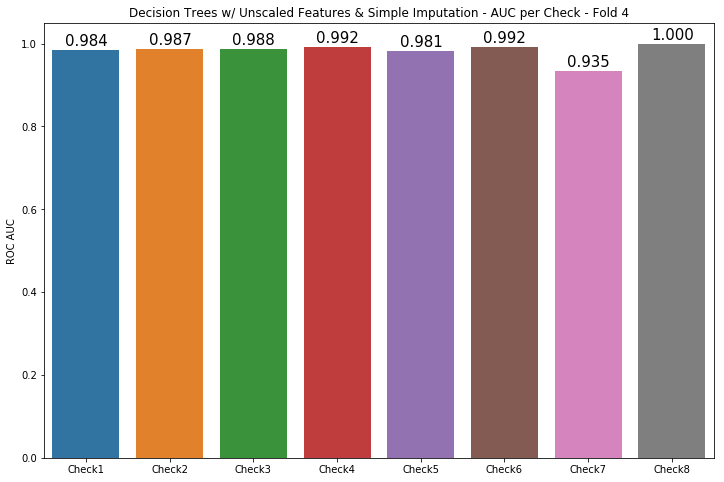

Fold:  5  - Elapsed time =  20.0185 s



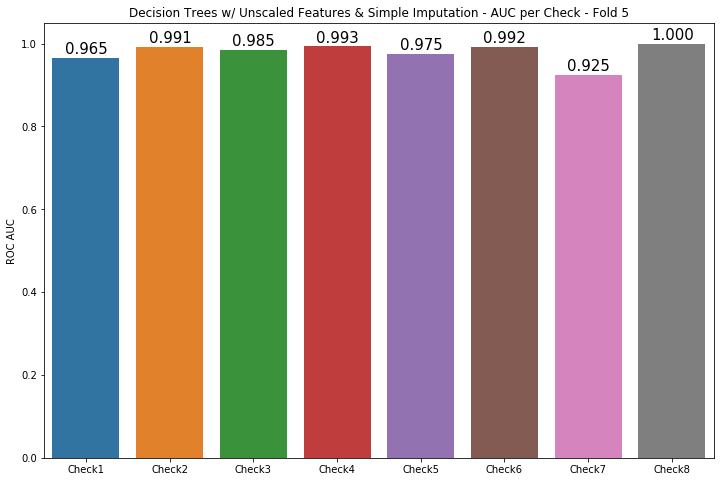

Fold:  6  - Elapsed time =  20.2678 s



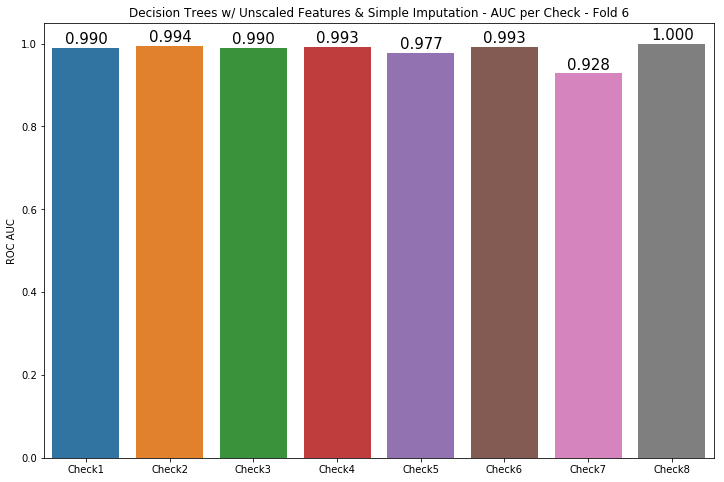

Fold:  7  - Elapsed time =  20.1846 s



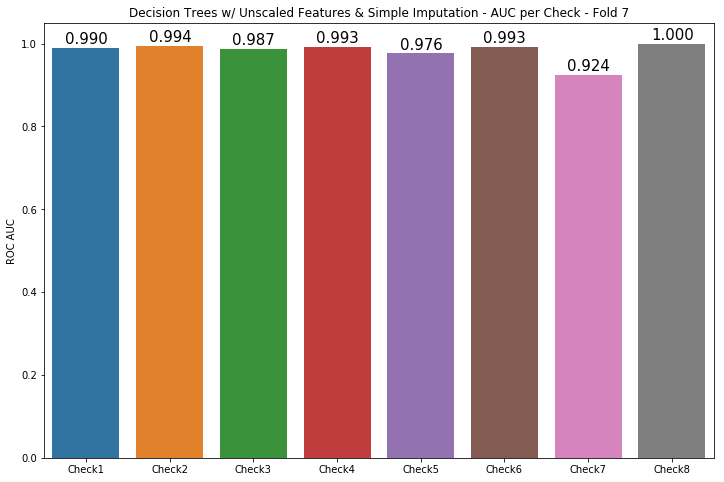

Fold:  8  - Elapsed time =  20.3332 s



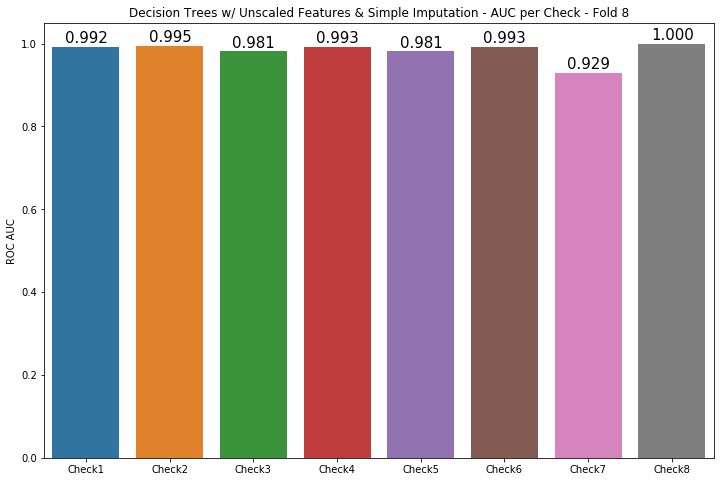

Fold:  9  - Elapsed time =  20.6027 s



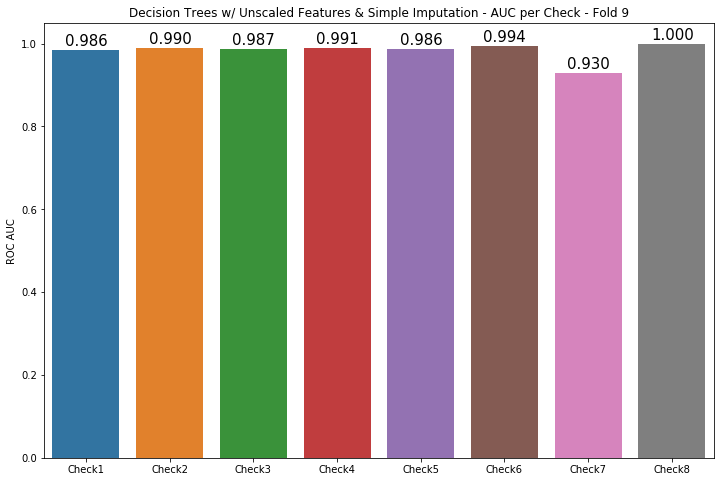

Fold:  10  - Elapsed time =  20.2461 s



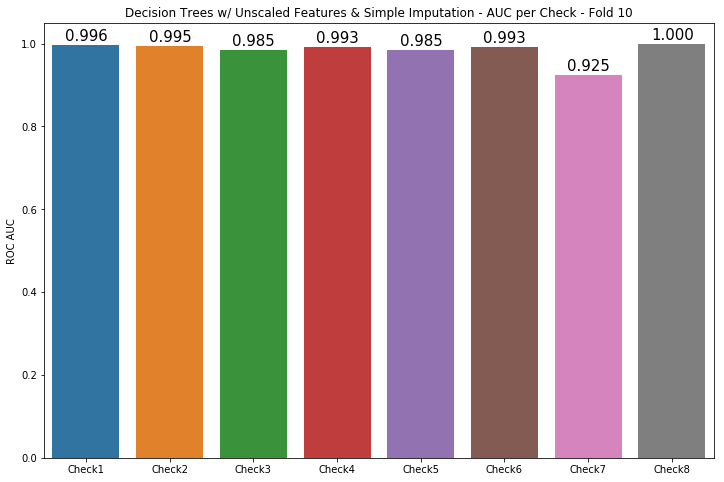

In [ ]:
folds = 10

stkf = KFold(n_splits=folds,shuffle=False)

totalScores = np.zeros(8)

for i, (train_index, val_index) in enumerate(stkf.split(trainSimpleImpute)):
    
    # Initialize Timer
    start = time.time()
    
    # Create a Logistic Regression Model
    dtc = DecisionTreeClassifier(criterion='entropy',
                                 splitter='best',
                                 max_depth=None,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 min_weight_fraction_leaf=0.0,
                                 max_features=None,
                                 random_state=None,
                                 max_leaf_nodes=None,
                                 min_impurity_decrease=0.0,
                                 min_impurity_split=None,
                                 class_weight=None,
                                 presort=False)
    ovr_classifier = OneVsRestClassifier(estimator = dtc)
    ovr_classifier.fit(trainSimpleImpute[attrsSimpleImpute].iloc[train_index], trainSimpleImpute[labels].iloc[train_index])
    
    
    preds = ovr_classifier.predict(trainSimpleImpute[attrsSimpleImpute].iloc[val_index])
    scorePerCheck = roc_auc_score(trainSimpleImpute[labels].iloc[val_index], preds, average = None)
    
    totalScores += scorePerCheck
    
    end = time.time()
    dur = end - start
    
    print("===================================================================================")
    print("Fold: ", i+1, " - Elapsed time = ","%.4f" % dur,"s")
    print("===================================================================================")
    print()
    
    plt.figure(figsize=(12,8))
    sns.barplot(np.arange(8),scorePerCheck)
    plt.xticks(np.arange(8),labels)
    plt.title(str("Decision Trees w/ Unscaled Features & Simple Imputation - AUC per Check - Fold "+str(i+1)))
    plt.ylabel("ROC AUC")
    for i, score in enumerate(scorePerCheck):
        plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
    plt.show()

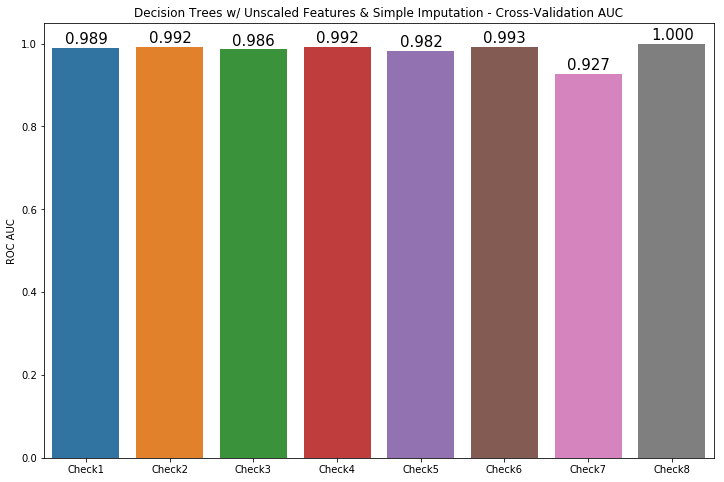

In [ ]:
totalScores /= folds

modelPerformanceDict['ModelName'] = 'Decision Trees w/ Unscaled Features & Simple Imputation'
for score, column in zip(totalScores, modelPerformanceDF.columns[1:]):
    modelPerformanceDict[column] = score

modelPerformanceDF = modelPerformanceDF.append(modelPerformanceDict, ignore_index=True)

plt.figure(figsize=(12,8))
sns.barplot(np.arange(8),totalScores)
plt.xticks(np.arange(8),labels)
plt.title("Decision Trees w/ Unscaled Features & Simple Imputation - Cross-Validation AUC")
plt.ylabel("ROC AUC")
for i, score in enumerate(totalScores):
    plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
plt.show()

#### Scaled Dataset w/ Simple Imputation

Fold:  1  - Elapsed time =  21.6185 s



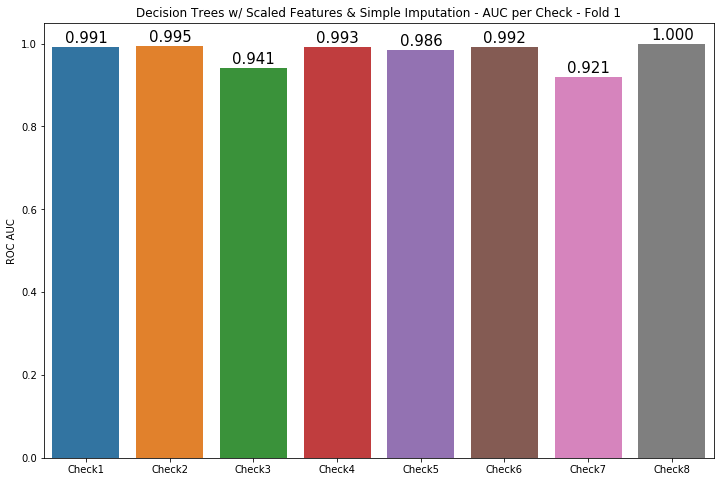

Fold:  2  - Elapsed time =  22.1422 s



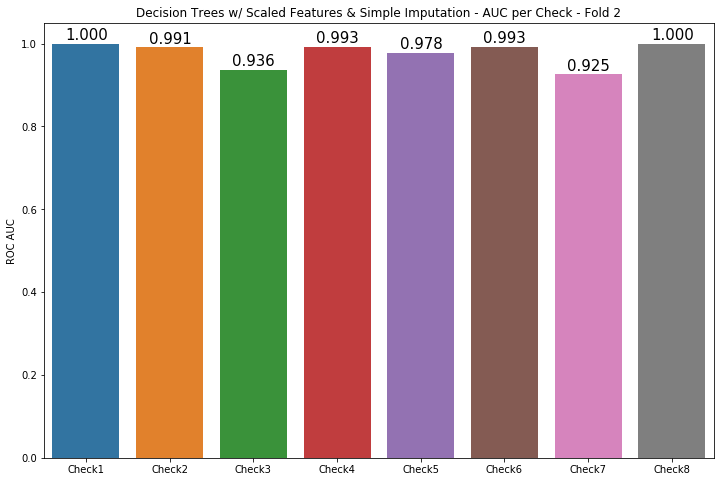

Fold:  3  - Elapsed time =  21.7163 s



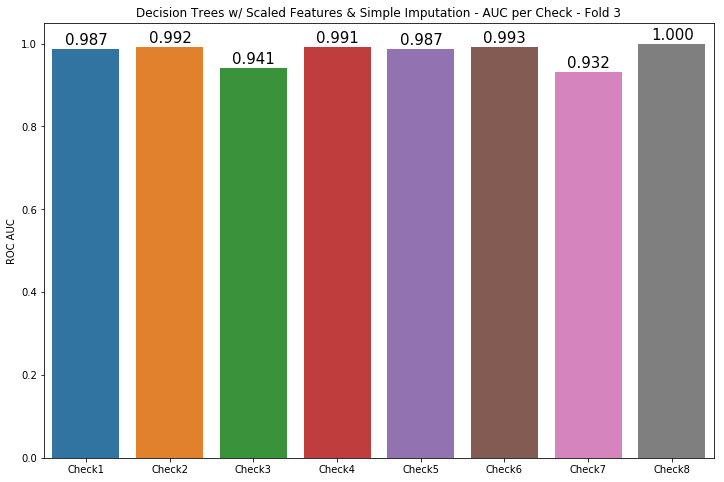

Fold:  4  - Elapsed time =  21.8909 s



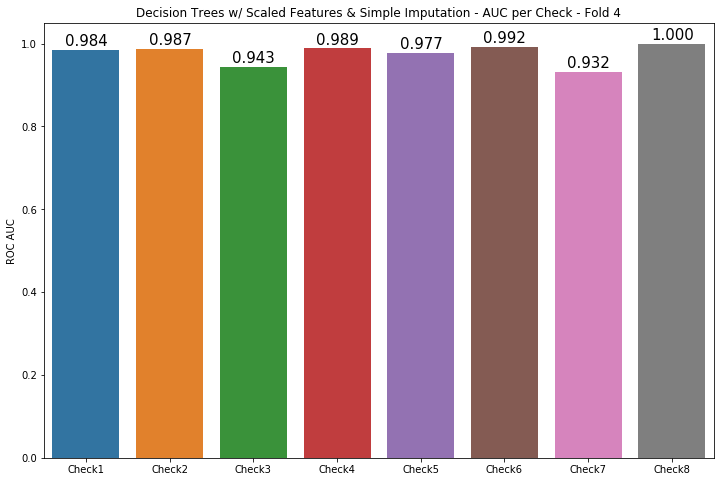

Fold:  5  - Elapsed time =  20.4236 s



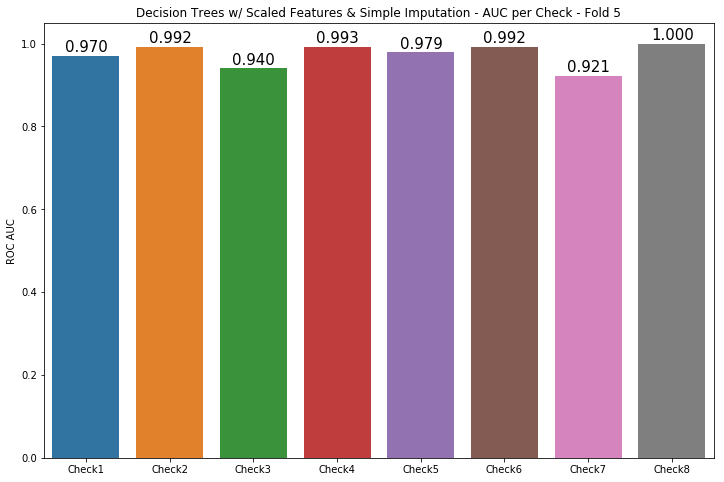

Fold:  6  - Elapsed time =  20.0160 s



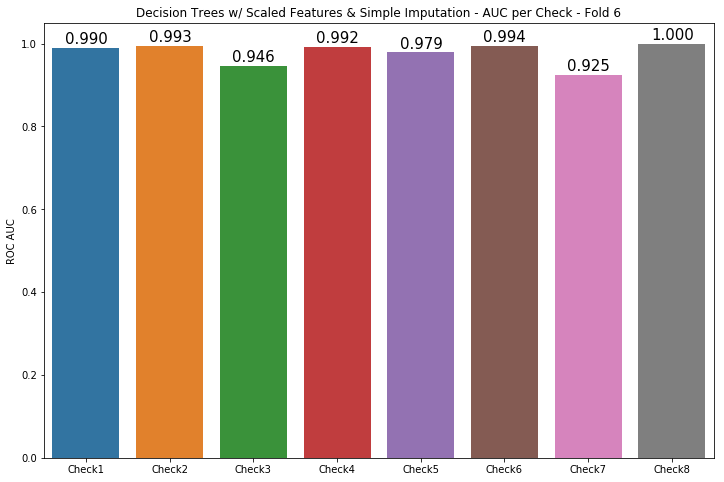

Fold:  7  - Elapsed time =  20.4965 s



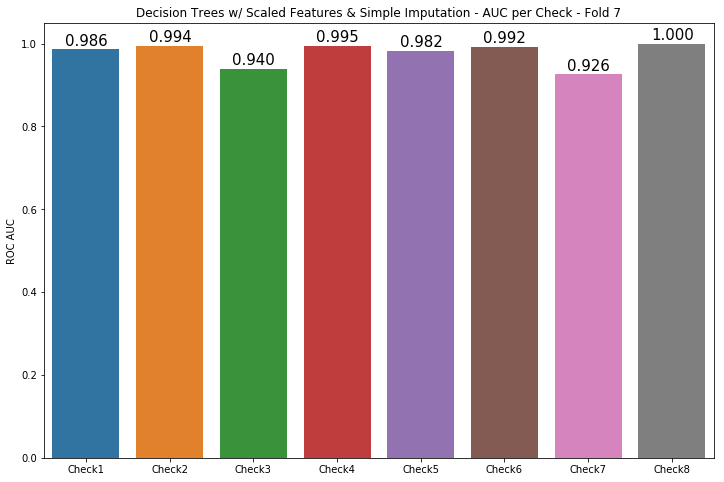

Fold:  8  - Elapsed time =  20.3709 s



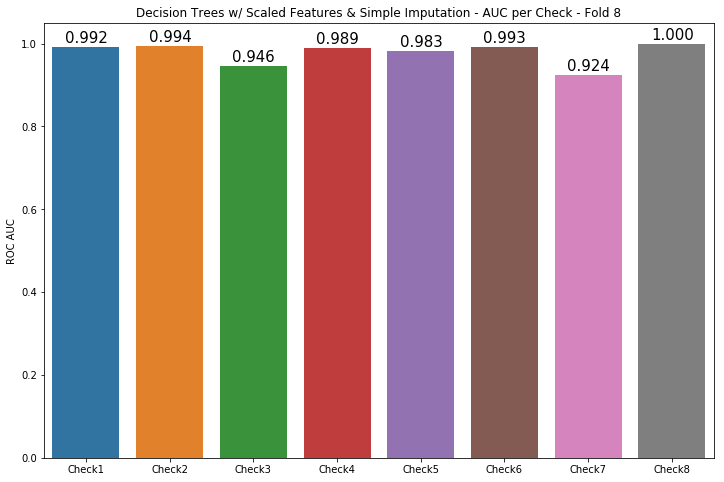

Fold:  9  - Elapsed time =  20.9185 s



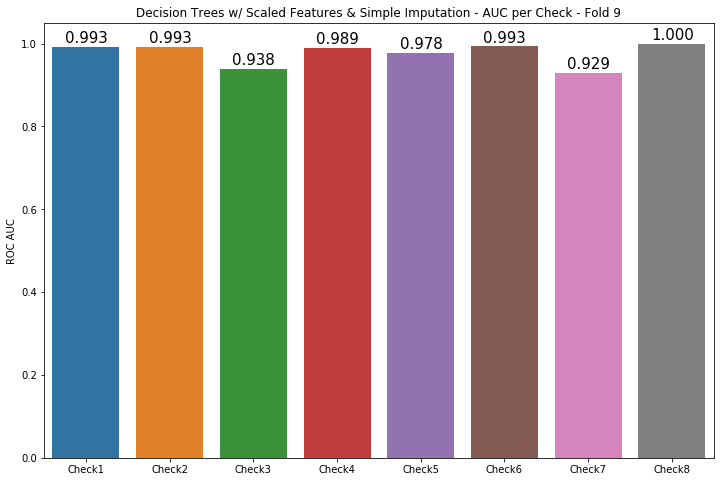

Fold:  10  - Elapsed time =  20.5811 s



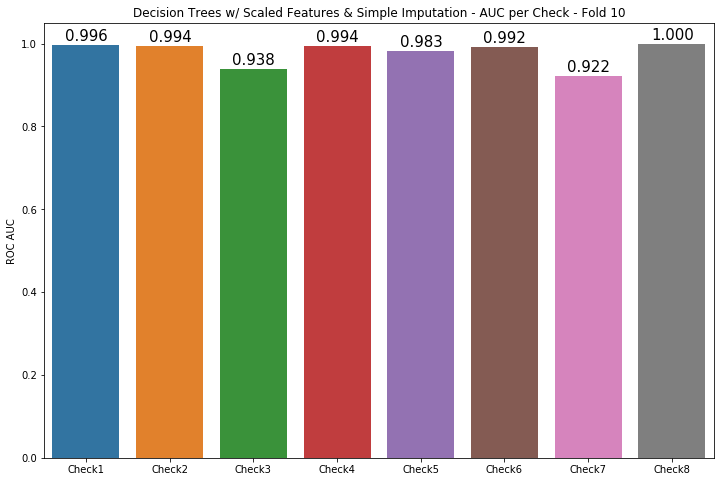

In [ ]:
folds = 10

stkf = KFold(n_splits=folds,shuffle=False)

totalScores = np.zeros(8)

for i, (train_index, val_index) in enumerate(stkf.split(trainScaledSimpleImpute)):
    
    # Initialize Timer
    start = time.time()
    
    # Create a Logistic Regression Model
    dtc = DecisionTreeClassifier(criterion='entropy',
                                 splitter='best',
                                 max_depth=None,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 min_weight_fraction_leaf=0.0,
                                 max_features=None,
                                 random_state=None,
                                 max_leaf_nodes=None,
                                 min_impurity_decrease=0.0,
                                 min_impurity_split=None,
                                 class_weight=None,
                                 presort=False)
    ovr_classifier = OneVsRestClassifier(estimator = dtc)
    ovr_classifier.fit(trainScaledSimpleImpute[attrsSimpleImpute].iloc[train_index], trainScaledSimpleImpute[labels].iloc[train_index])
    
    
    preds = ovr_classifier.predict(trainScaledSimpleImpute[attrsSimpleImpute].iloc[val_index])
    scorePerCheck = roc_auc_score(trainScaledSimpleImpute[labels].iloc[val_index], preds, average = None)
    
    totalScores += scorePerCheck
    
    end = time.time()
    dur = end - start
    
    print("===================================================================================")
    print("Fold: ", i+1, " - Elapsed time = ","%.4f" % dur,"s")
    print("===================================================================================")
    print()
    
    plt.figure(figsize=(12,8))
    sns.barplot(np.arange(8),scorePerCheck)
    plt.xticks(np.arange(8),labels)
    plt.title(str("Decision Trees w/ Scaled Features & Simple Imputation - AUC per Check - Fold "+str(i+1)))
    plt.ylabel("ROC AUC")
    for i, score in enumerate(scorePerCheck):
        plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
    plt.show()

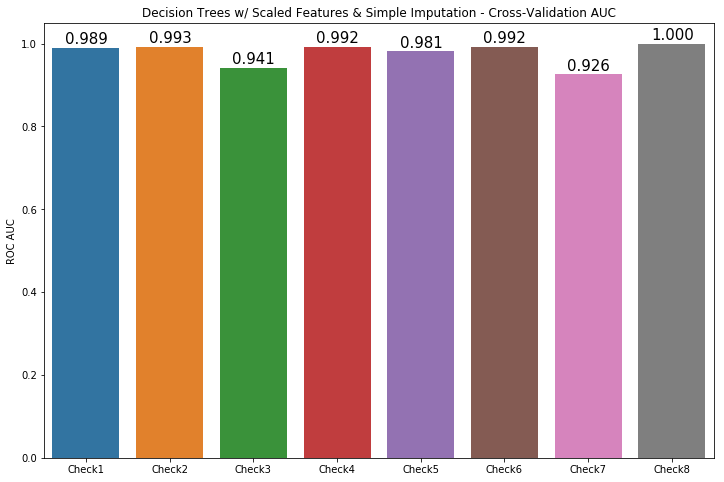

In [ ]:
totalScores /= folds

modelPerformanceDict['ModelName'] = 'Decision Trees w/ Scaled Features & Simple Imputation'
for score, column in zip(totalScores, modelPerformanceDF.columns[1:]):
    modelPerformanceDict[column] = score

modelPerformanceDF = modelPerformanceDF.append(modelPerformanceDict, ignore_index=True)

plt.figure(figsize=(12,8))
sns.barplot(np.arange(8),totalScores)
plt.xticks(np.arange(8),labels)
plt.title("Decision Trees w/ Scaled Features & Simple Imputation - Cross-Validation AUC")
plt.ylabel("ROC AUC")
for i, score in enumerate(totalScores):
    plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
plt.show()

#### Unscaled Dataset w/ KNN Imputation

Fold:  1  - Elapsed time =  18.6348 s



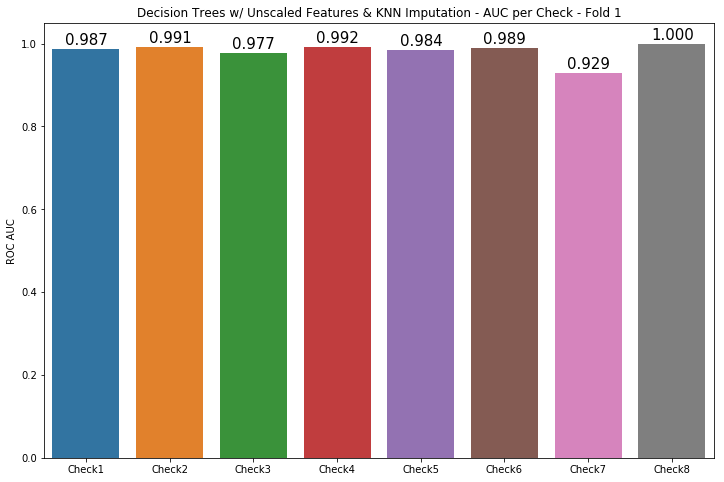

Fold:  2  - Elapsed time =  18.3996 s



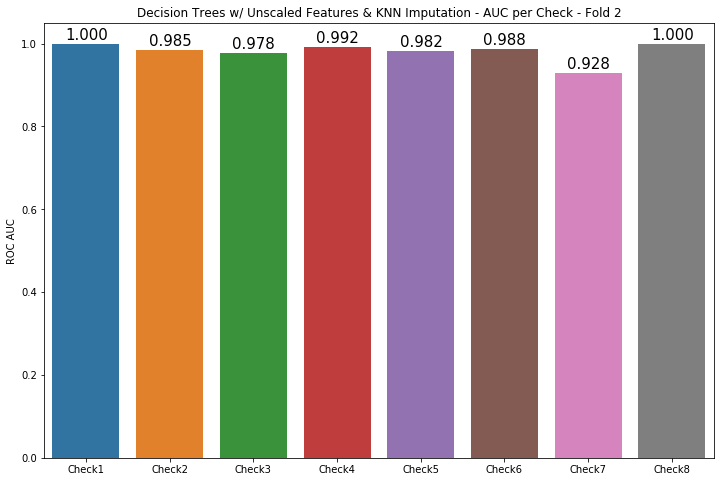

Fold:  3  - Elapsed time =  20.0252 s



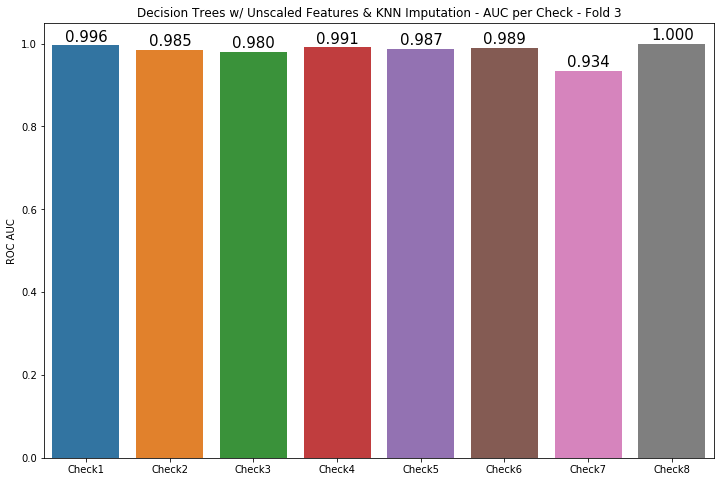

Fold:  4  - Elapsed time =  18.4059 s



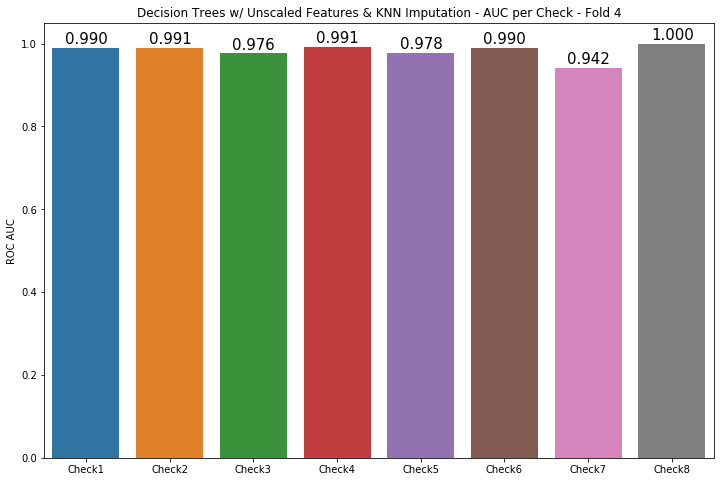

Fold:  5  - Elapsed time =  18.7129 s



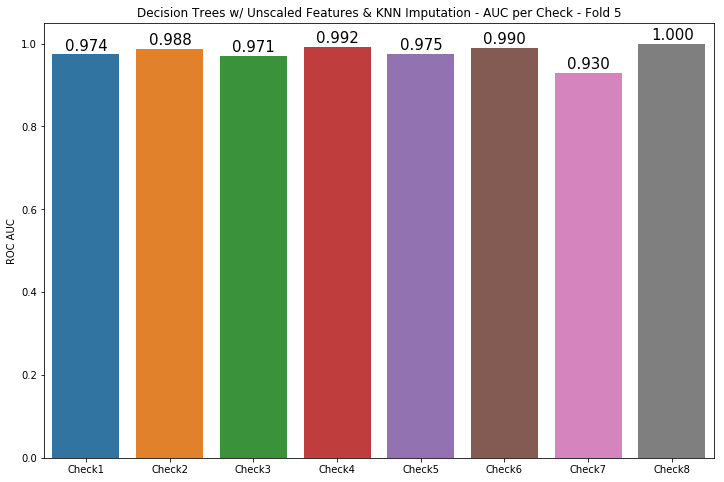

Fold:  6  - Elapsed time =  18.8932 s



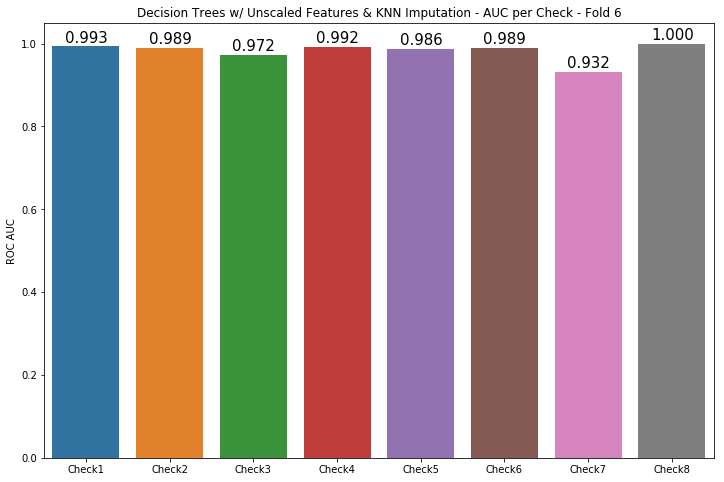

Fold:  7  - Elapsed time =  18.6232 s



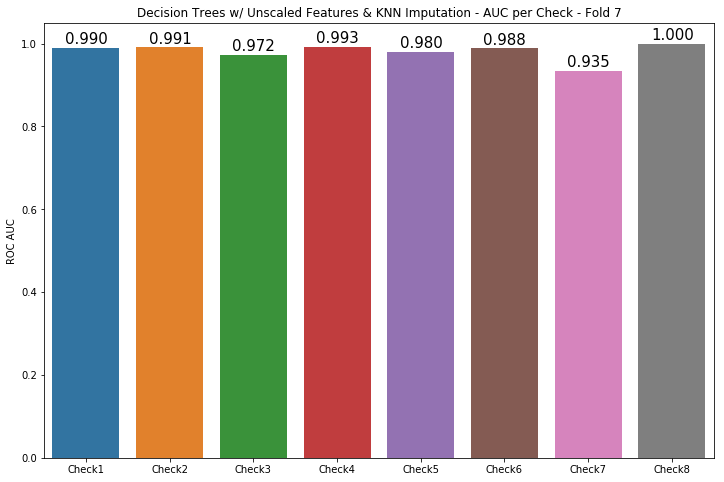

Fold:  8  - Elapsed time =  19.3838 s



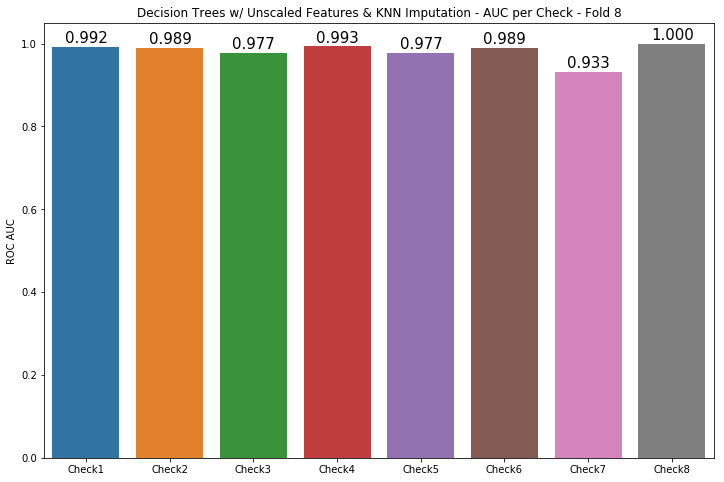

Fold:  9  - Elapsed time =  19.2533 s



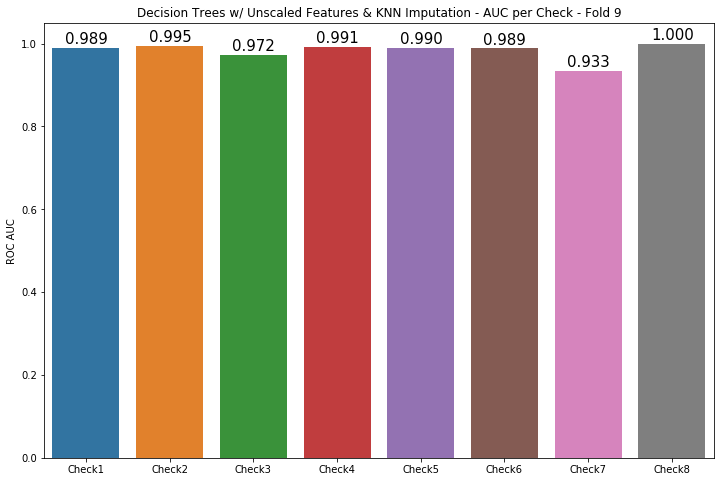

Fold:  10  - Elapsed time =  19.2448 s



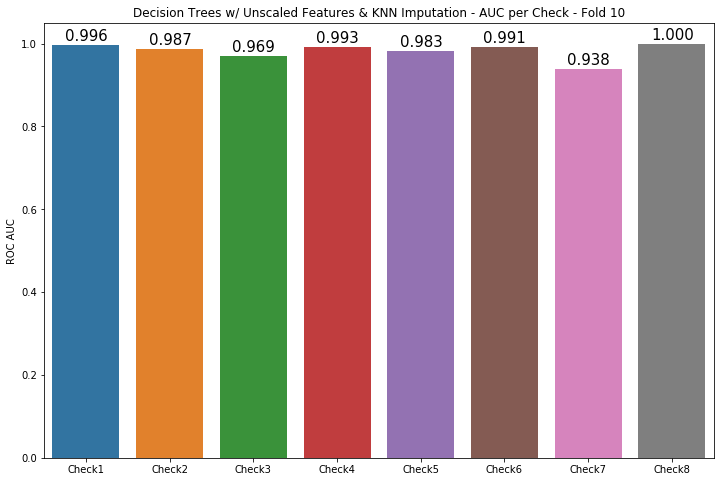

In [ ]:
folds = 10

stkf = KFold(n_splits=folds,shuffle=False)

totalScores = np.zeros(8)

for i, (train_index, val_index) in enumerate(stkf.split(trainKNNImpute)):
    
    # Initialize Timer
    start = time.time()
    
    # Create a Logistic Regression Model
    dtc = DecisionTreeClassifier(criterion='entropy',
                                 splitter='best',
                                 max_depth=None,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 min_weight_fraction_leaf=0.0,
                                 max_features=None,
                                 random_state=None,
                                 max_leaf_nodes=None,
                                 min_impurity_decrease=0.0,
                                 min_impurity_split=None,
                                 class_weight=None,
                                 presort=False)
    ovr_classifier = OneVsRestClassifier(estimator = dtc)
    ovr_classifier.fit(trainKNNImpute[attrs].iloc[train_index], trainKNNImpute[labels].iloc[train_index])
    
    
    preds = ovr_classifier.predict(trainKNNImpute[attrs].iloc[val_index])
    scorePerCheck = roc_auc_score(trainKNNImpute[labels].iloc[val_index], preds, average = None)
    
    totalScores += scorePerCheck
    
    end = time.time()
    dur = end - start
    
    print("===================================================================================")
    print("Fold: ", i+1, " - Elapsed time = ","%.4f" % dur,"s")
    print("===================================================================================")
    print()
    
    plt.figure(figsize=(12,8))
    sns.barplot(np.arange(8),scorePerCheck)
    plt.xticks(np.arange(8),labels)
    plt.title(str("Decision Trees w/ Unscaled Features & KNN Imputation - AUC per Check - Fold "+str(i+1)))
    plt.ylabel("ROC AUC")
    for i, score in enumerate(scorePerCheck):
        plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
    plt.show()

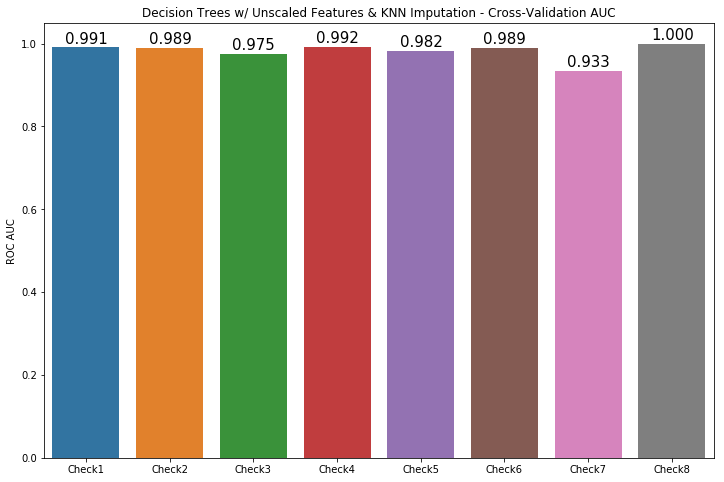

In [ ]:
totalScores /= folds

modelPerformanceDict['ModelName'] = 'Decision Trees w/ Unscaled Features & KNN Imputation'
for score, column in zip(totalScores, modelPerformanceDF.columns[1:]):
    modelPerformanceDict[column] = score

modelPerformanceDF = modelPerformanceDF.append(modelPerformanceDict, ignore_index=True)

plt.figure(figsize=(12,8))
sns.barplot(np.arange(8),totalScores)
plt.xticks(np.arange(8),labels)
plt.title("Decision Trees w/ Unscaled Features & KNN Imputation - Cross-Validation AUC")
plt.ylabel("ROC AUC")
for i, score in enumerate(totalScores):
    plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
plt.show()

#### Scaled Dataset w/ KNN Imputation

Fold:  1  - Elapsed time =  23.1437 s



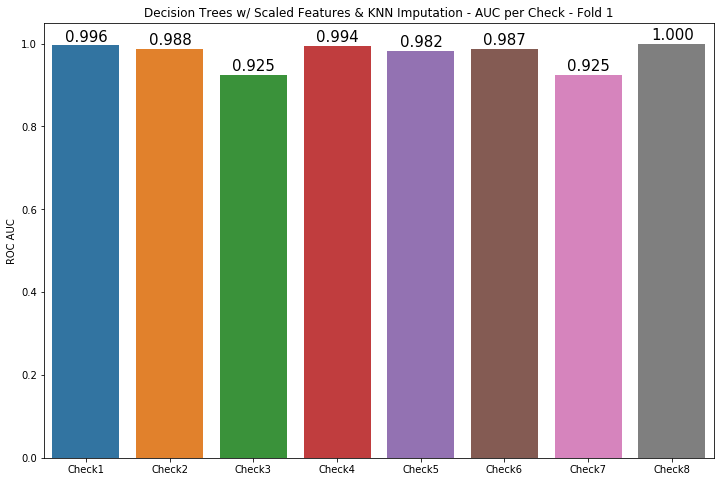

Fold:  2  - Elapsed time =  22.5312 s



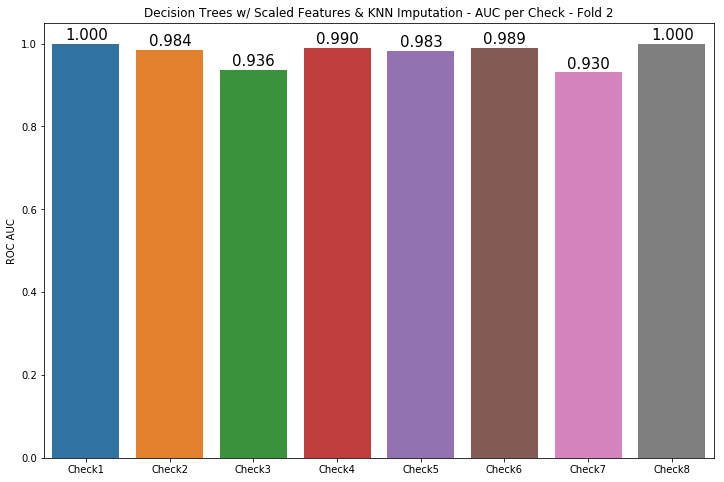

Fold:  3  - Elapsed time =  22.6288 s



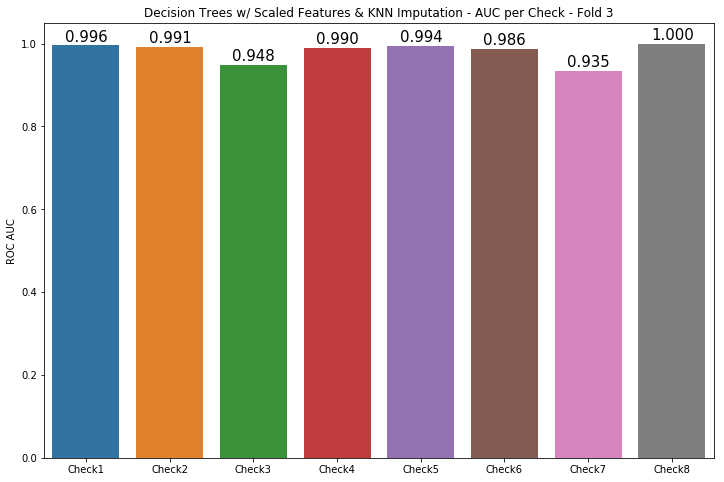

Fold:  4  - Elapsed time =  21.3161 s



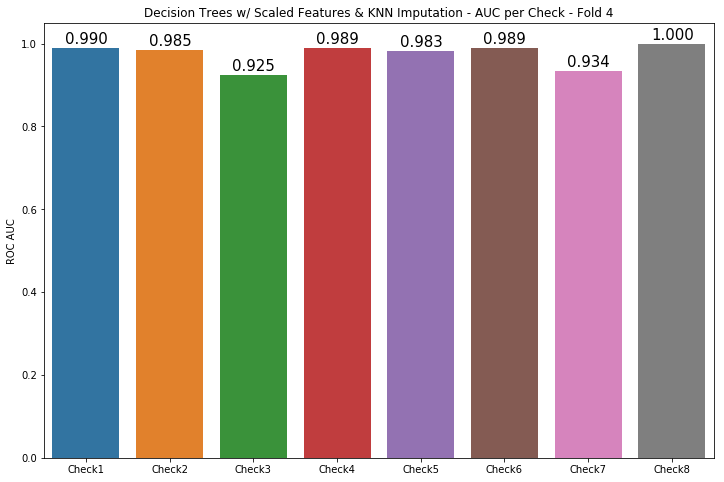

Fold:  5  - Elapsed time =  21.7858 s



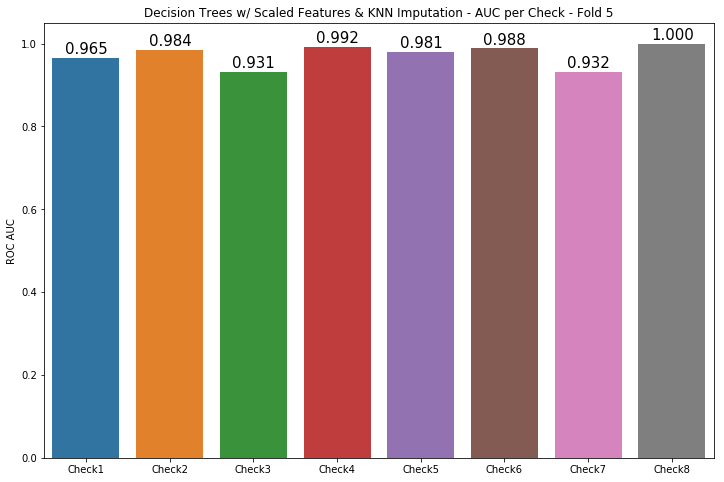

Fold:  6  - Elapsed time =  21.8233 s



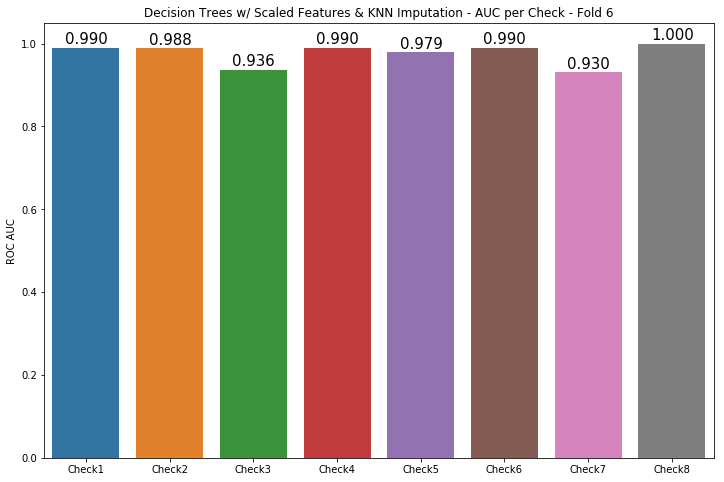

Fold:  7  - Elapsed time =  21.9392 s



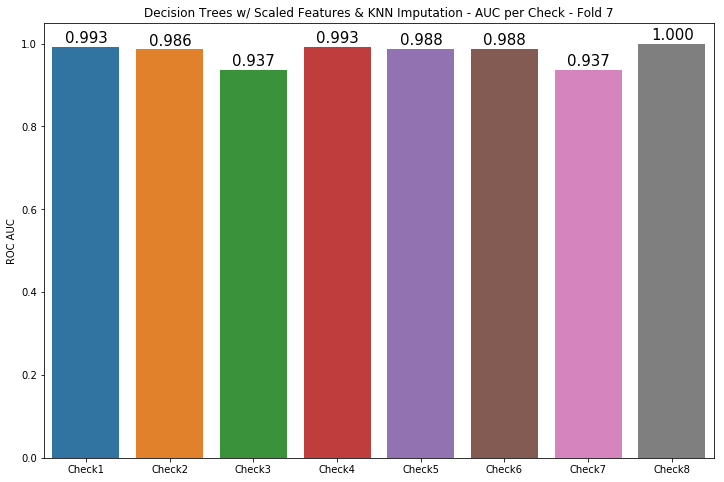

Fold:  8  - Elapsed time =  22.5988 s



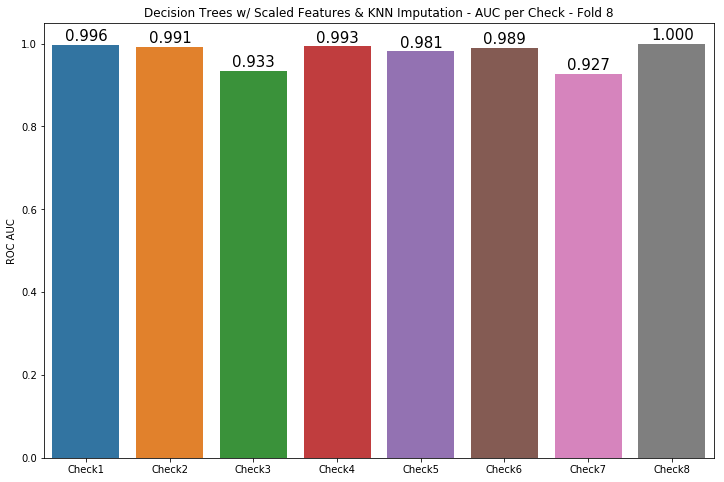

Fold:  9  - Elapsed time =  22.4839 s



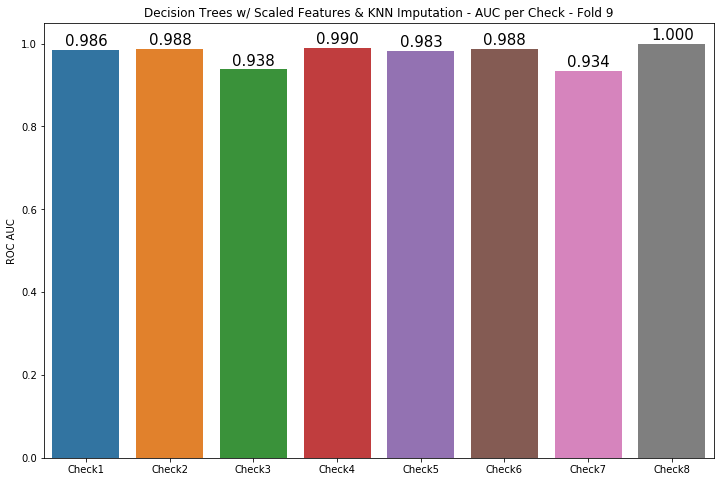

Fold:  10  - Elapsed time =  22.9759 s



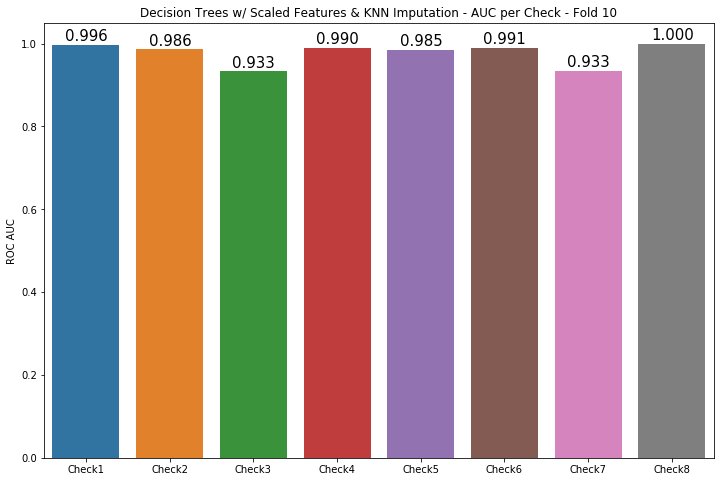

In [ ]:
folds = 10

stkf = KFold(n_splits=folds,shuffle=False)

totalScores = np.zeros(8)

for i, (train_index, val_index) in enumerate(stkf.split(trainScaledKNNImpute)):
    
    # Initialize Timer
    start = time.time()
    
    # Create a Logistic Regression Model
    dtc = DecisionTreeClassifier(criterion='entropy',
                                 splitter='best',
                                 max_depth=None,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 min_weight_fraction_leaf=0.0,
                                 max_features=None,
                                 random_state=None,
                                 max_leaf_nodes=None,
                                 min_impurity_decrease=0.0,
                                 min_impurity_split=None,
                                 class_weight=None,
                                 presort=False)
    ovr_classifier = OneVsRestClassifier(estimator = dtc)
    ovr_classifier.fit(trainScaledKNNImpute[attrs].iloc[train_index], trainScaledKNNImpute[labels].iloc[train_index])
    
    
    preds = ovr_classifier.predict(trainScaledKNNImpute[attrs].iloc[val_index])
    scorePerCheck = roc_auc_score(trainScaledKNNImpute[labels].iloc[val_index], preds, average = None)
    
    totalScores += scorePerCheck
    
    end = time.time()
    dur = end - start
    
    print("===================================================================================")
    print("Fold: ", i+1, " - Elapsed time = ","%.4f" % dur,"s")
    print("===================================================================================")
    print()
    
    plt.figure(figsize=(12,8))
    sns.barplot(np.arange(8),scorePerCheck)
    plt.xticks(np.arange(8),labels)
    plt.title(str("Decision Trees w/ Scaled Features & KNN Imputation - AUC per Check - Fold "+str(i+1)))
    plt.ylabel("ROC AUC")
    for i, score in enumerate(scorePerCheck):
        plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
    plt.show()

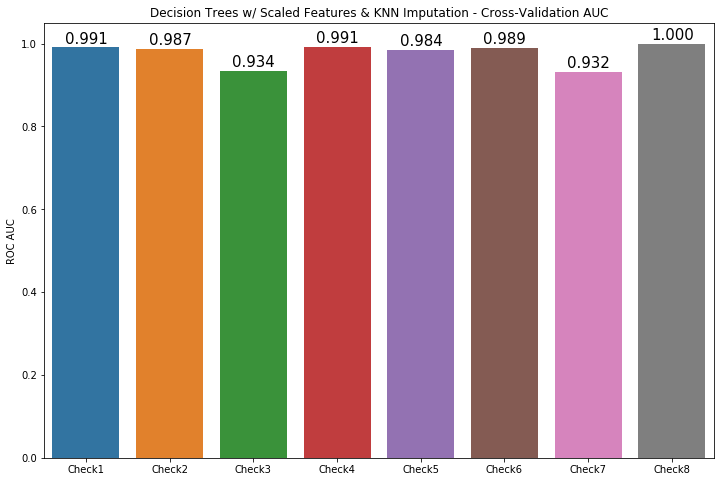

In [ ]:
totalScores /= folds

modelPerformanceDict['ModelName'] = 'Decision Trees w/ Scaled Features & KNN Imputation'
for score, column in zip(totalScores, modelPerformanceDF.columns[1:]):
    modelPerformanceDict[column] = score

modelPerformanceDF = modelPerformanceDF.append(modelPerformanceDict, ignore_index=True)

plt.figure(figsize=(12,8))
sns.barplot(np.arange(8),totalScores)
plt.xticks(np.arange(8),labels)
plt.title("Decision Trees w/ Scaled Features & KNN Imputation - Cross-Validation AUC")
plt.ylabel("ROC AUC")
for i, score in enumerate(totalScores):
    plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
plt.show()

In [ ]:
import pickle
with open('performance.pkl', 'wb') as handle:
    pickle.dump(modelPerformanceDF, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('performance.pkl', 'rb') as handle:
    modelPerformanceDF = pickle.load(handle)

### Random Forest Classifier

#### Unscaled Dataset w/ Simple Imputation

Fold:  1  - Elapsed time =  36.6363 s



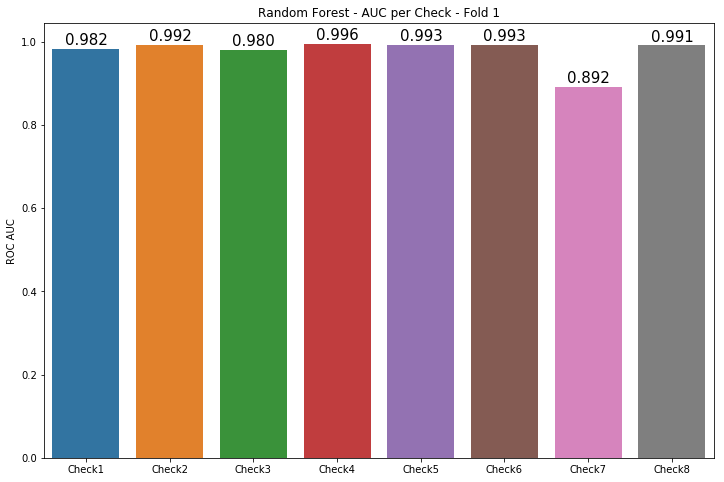

Fold:  2  - Elapsed time =  36.2062 s



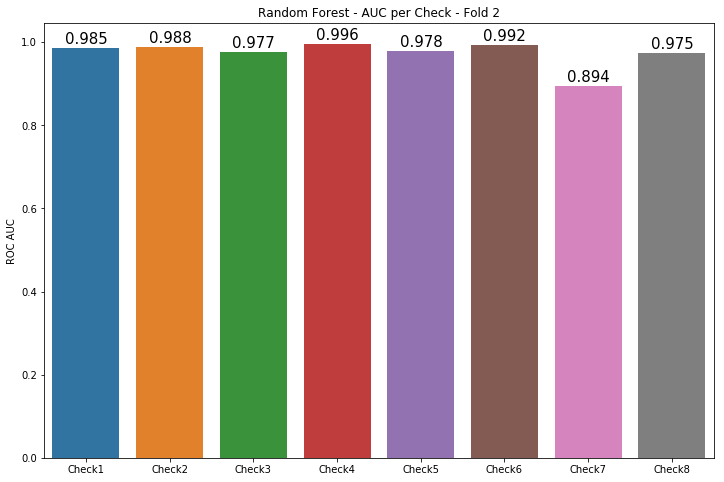

Fold:  3  - Elapsed time =  37.4574 s



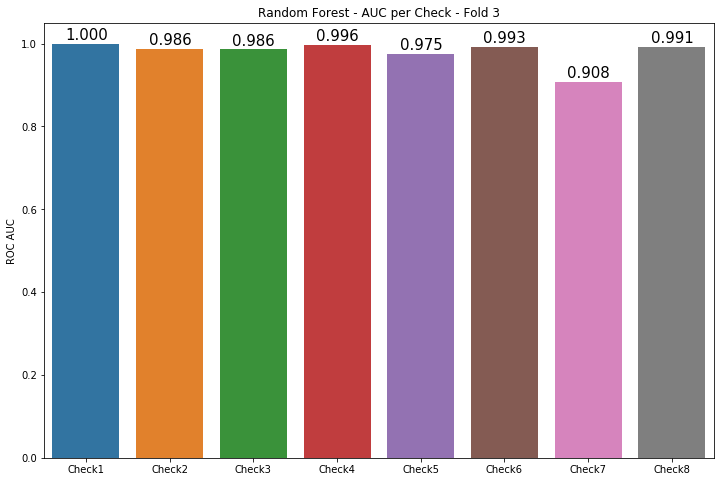

Fold:  4  - Elapsed time =  37.0260 s



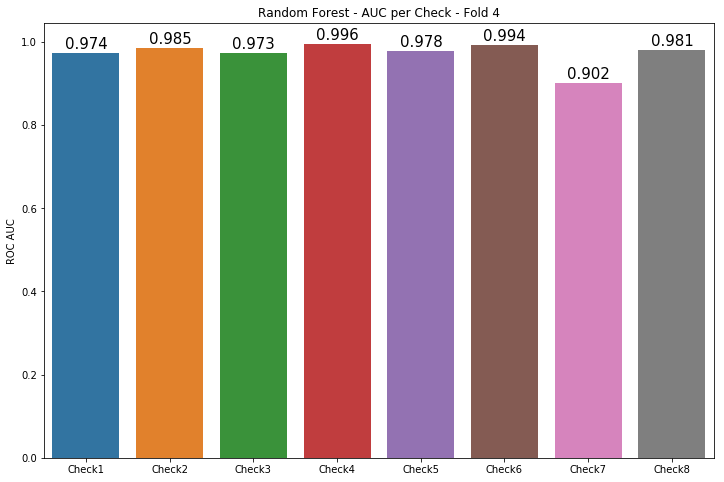

Fold:  5  - Elapsed time =  38.0244 s



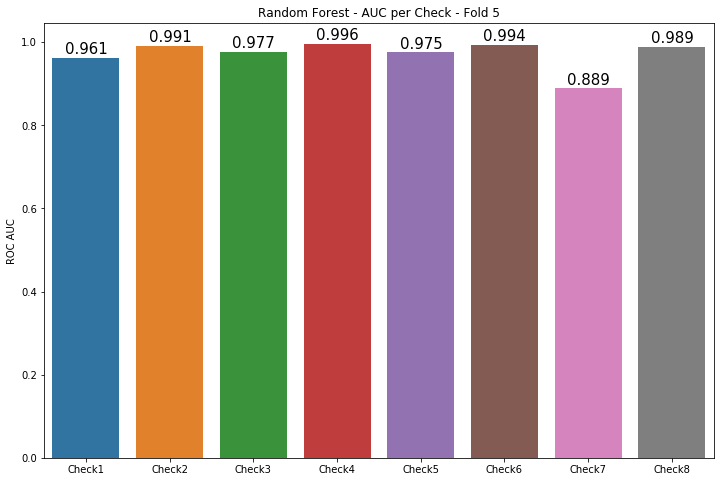

Fold:  6  - Elapsed time =  39.9979 s



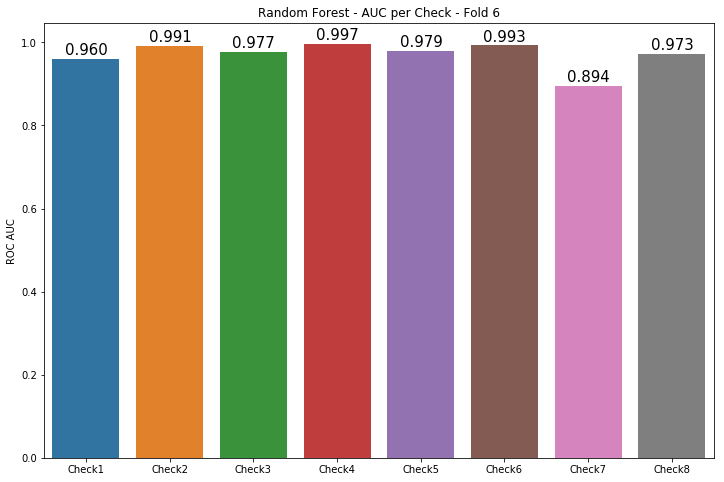

Fold:  7  - Elapsed time =  38.2752 s



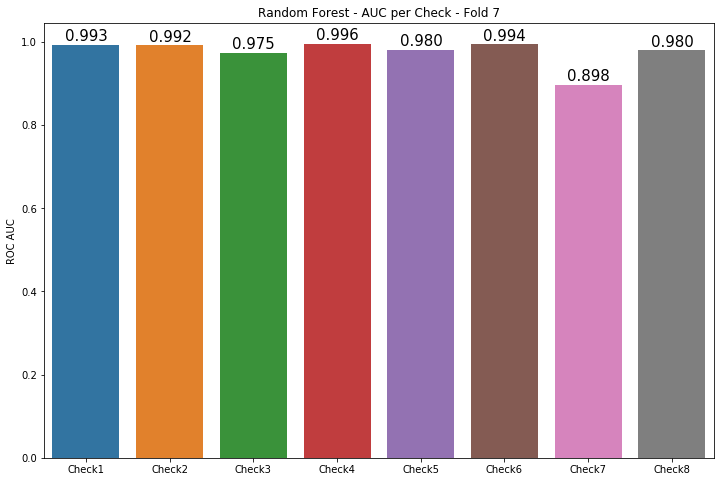

Fold:  8  - Elapsed time =  38.6976 s



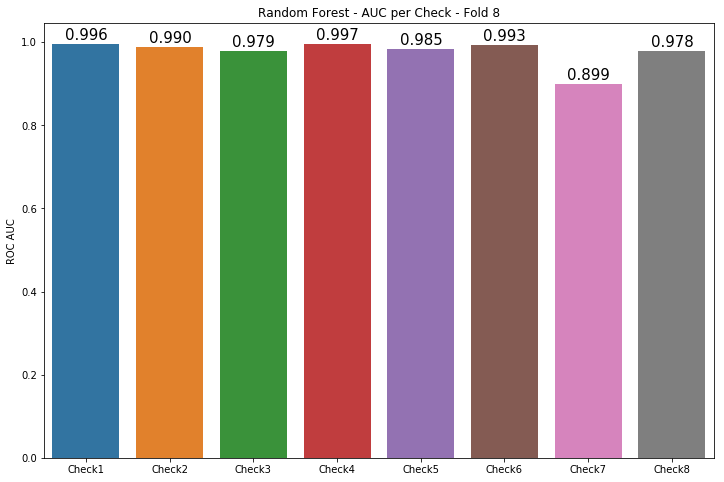

Fold:  9  - Elapsed time =  40.8369 s



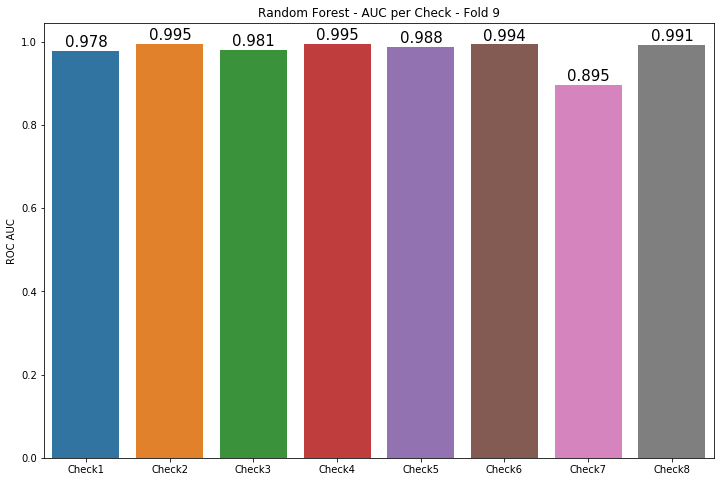

Fold:  10  - Elapsed time =  39.9569 s



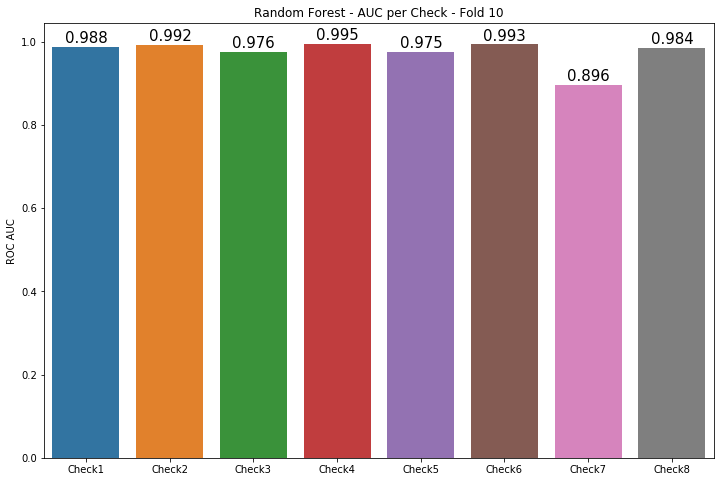

In [ ]:
folds = 10

stkf = KFold(n_splits=folds,shuffle=False)

totalScores = np.zeros(8)

for i, (train_index, val_index) in enumerate(stkf.split(trainSimpleImpute)):
    
    # Initialize Timer
    start = time.time()
    
    # Create a Logistic Regression Model
    randForest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
    ovr_classifier = OneVsRestClassifier(estimator = randForest)
    ovr_classifier.fit(trainSimpleImpute[attrsSimpleImpute].iloc[train_index], trainSimpleImpute[labels].iloc[train_index])
    
    
    preds = ovr_classifier.predict(trainSimpleImpute[attrsSimpleImpute].iloc[val_index])
    scorePerCheck = roc_auc_score(trainSimpleImpute[labels].iloc[val_index], preds, average = None)
    
    totalScores += scorePerCheck
    
    end = time.time()
    dur = end - start
    
    print("===================================================================================")
    print("Fold: ", i+1, " - Elapsed time = ","%.4f" % dur,"s")
    print("===================================================================================")
    print()
    
    plt.figure(figsize=(12,8))
    sns.barplot(np.arange(8),scorePerCheck)
    plt.xticks(np.arange(8),labels)
    plt.title(str("Random Forest - AUC per Check - Fold "+str(i+1)))
    plt.ylabel("ROC AUC")
    for i, score in enumerate(scorePerCheck):
        plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
    plt.show()

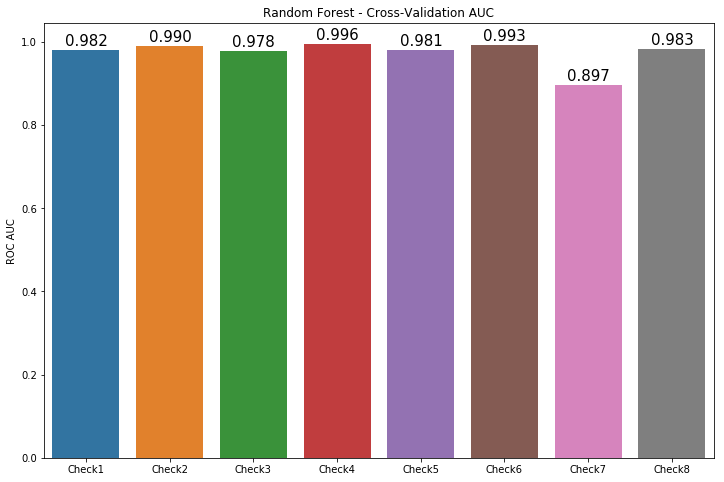

In [ ]:
totalScores /= folds

modelPerformanceDict['ModelName'] = 'Random Forest'
for score, column in zip(totalScores, modelPerformanceDF.columns[1:]):
    modelPerformanceDict[column] = score

modelPerformanceDF = modelPerformanceDF.append(modelPerformanceDict, ignore_index=True)

plt.figure(figsize=(12,8))
sns.barplot(np.arange(8),totalScores)
plt.xticks(np.arange(8),labels)
plt.title("Random Forest - Cross-Validation AUC")
plt.ylabel("ROC AUC")
for i, score in enumerate(totalScores):
    plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
plt.show()

#### Unscaled Dataset w/ Simple Imputation

Fold:  1  - Elapsed time =  35.2059 s



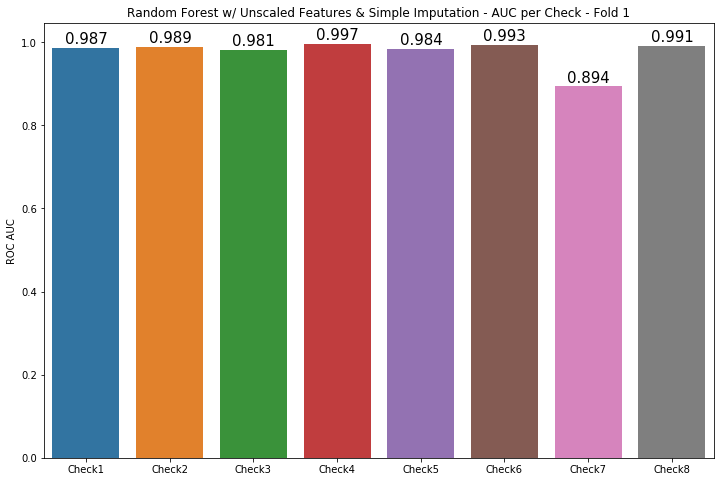

Fold:  2  - Elapsed time =  35.1936 s



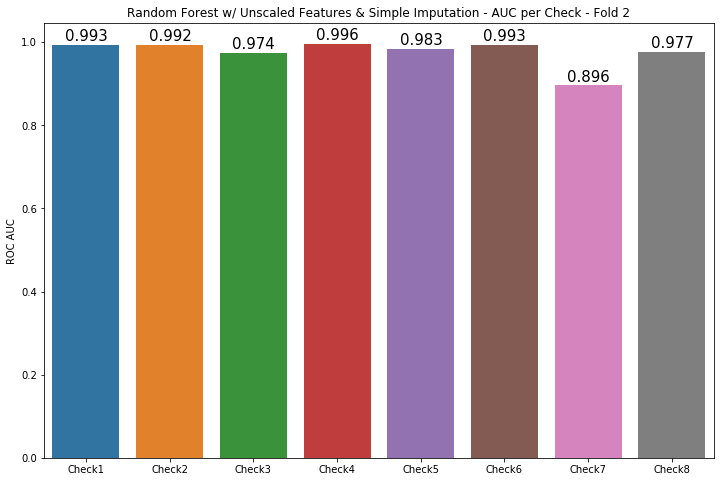

Fold:  3  - Elapsed time =  35.9060 s



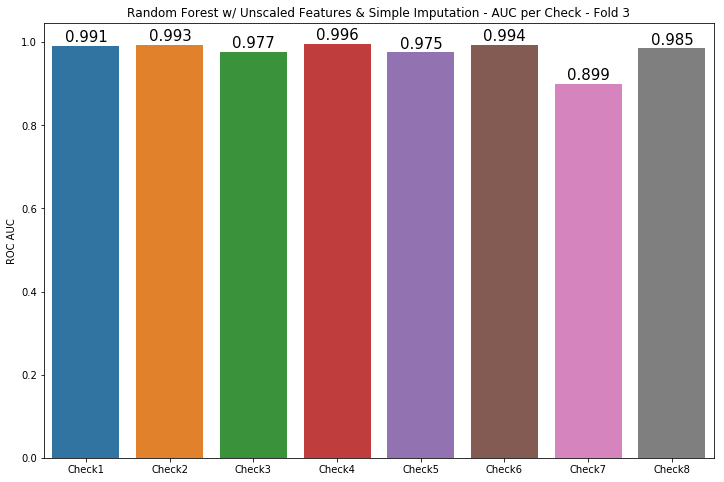

Fold:  4  - Elapsed time =  35.4696 s



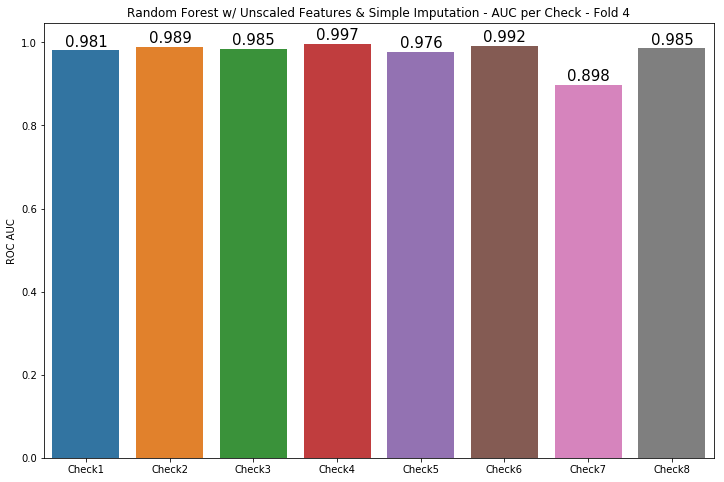

Fold:  5  - Elapsed time =  34.1731 s



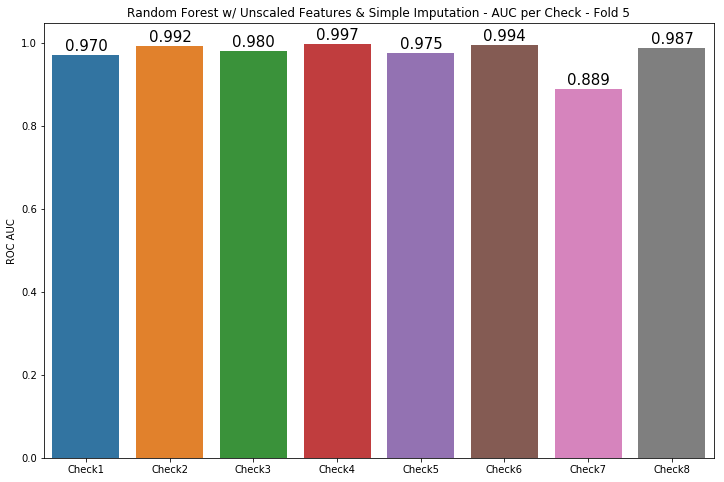

Fold:  6  - Elapsed time =  35.7741 s



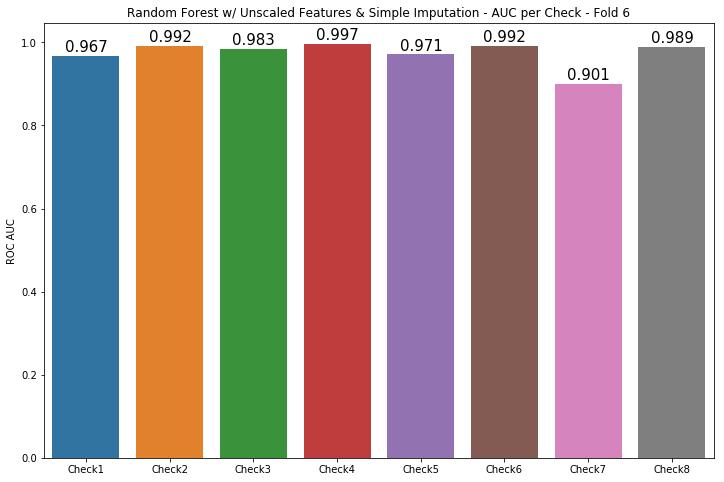

Fold:  7  - Elapsed time =  34.7039 s



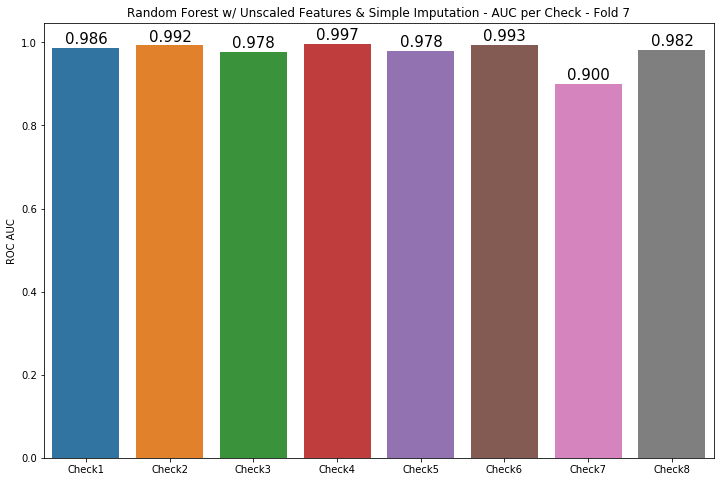

Fold:  8  - Elapsed time =  34.5772 s



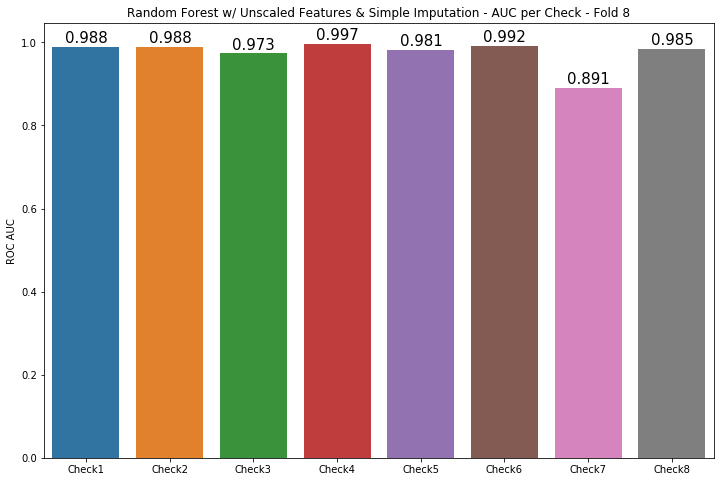

Fold:  9  - Elapsed time =  35.3507 s



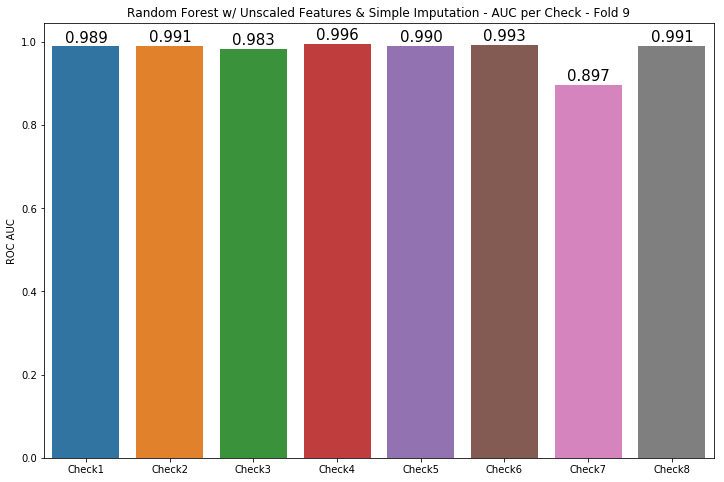

Fold:  10  - Elapsed time =  36.6797 s



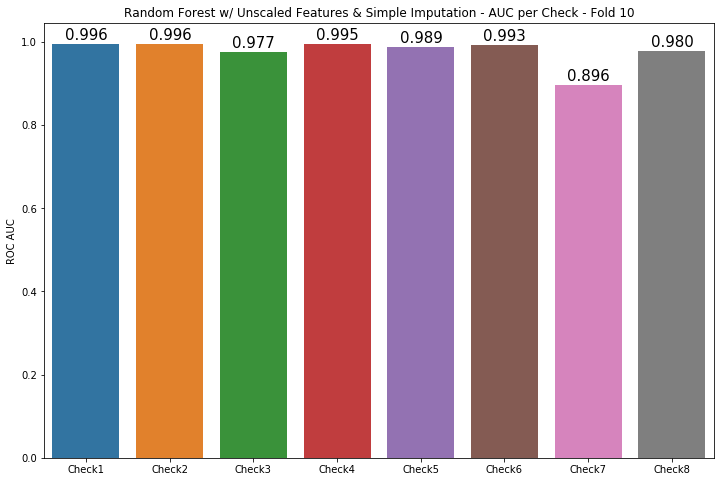

In [ ]:
folds = 10

stkf = KFold(n_splits=folds,shuffle=False)

totalScores = np.zeros(8)

for i, (train_index, val_index) in enumerate(stkf.split(trainSimpleImpute)):
    
    # Initialize Timer
    start = time.time()
    
    # Create a Logistic Regression Model
    randForest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
    ovr_classifier = OneVsRestClassifier(estimator = randForest)
    ovr_classifier.fit(trainSimpleImpute[attrsSimpleImpute].iloc[train_index], trainSimpleImpute[labels].iloc[train_index])
    
    
    preds = ovr_classifier.predict(trainSimpleImpute[attrsSimpleImpute].iloc[val_index])
    scorePerCheck = roc_auc_score(trainSimpleImpute[labels].iloc[val_index], preds, average = None)
    
    totalScores += scorePerCheck
    
    end = time.time()
    dur = end - start
    
    print("===================================================================================")
    print("Fold: ", i+1, " - Elapsed time = ","%.4f" % dur,"s")
    print("===================================================================================")
    print()
    
    plt.figure(figsize=(12,8))
    sns.barplot(np.arange(8),scorePerCheck)
    plt.xticks(np.arange(8),labels)
    plt.title(str("Random Forest w/ Unscaled Features & Simple Imputation - AUC per Check - Fold "+str(i+1)))
    plt.ylabel("ROC AUC")
    for i, score in enumerate(scorePerCheck):
        plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
    plt.show()

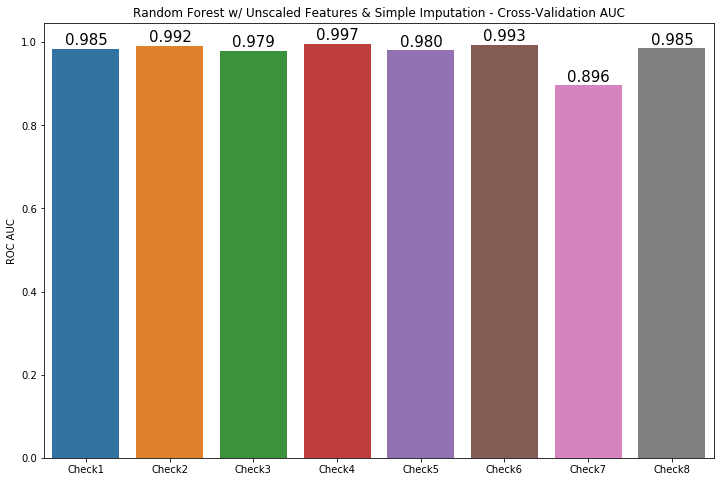

In [ ]:
totalScores /= folds

modelPerformanceDict['ModelName'] = 'Random Forest w/ Unscaled Features & Simple Imputation'
for score, column in zip(totalScores, modelPerformanceDF.columns[1:]):
    modelPerformanceDict[column] = score

modelPerformanceDF = modelPerformanceDF.append(modelPerformanceDict, ignore_index=True)

plt.figure(figsize=(12,8))
sns.barplot(np.arange(8),totalScores)
plt.xticks(np.arange(8),labels)
plt.title("Random Forest w/ Unscaled Features & Simple Imputation - Cross-Validation AUC")
plt.ylabel("ROC AUC")
for i, score in enumerate(totalScores):
    plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
plt.show()

#### Scaled Dataset w/ Simple Imputation

Fold:  1  - Elapsed time =  34.3393 s



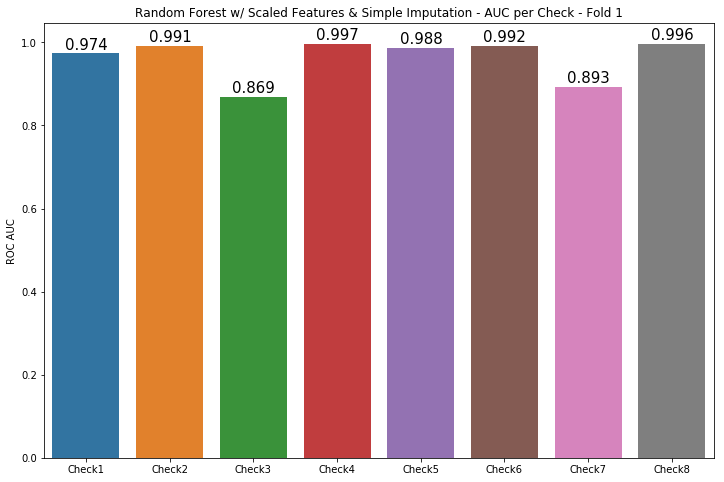

Fold:  2  - Elapsed time =  35.5942 s



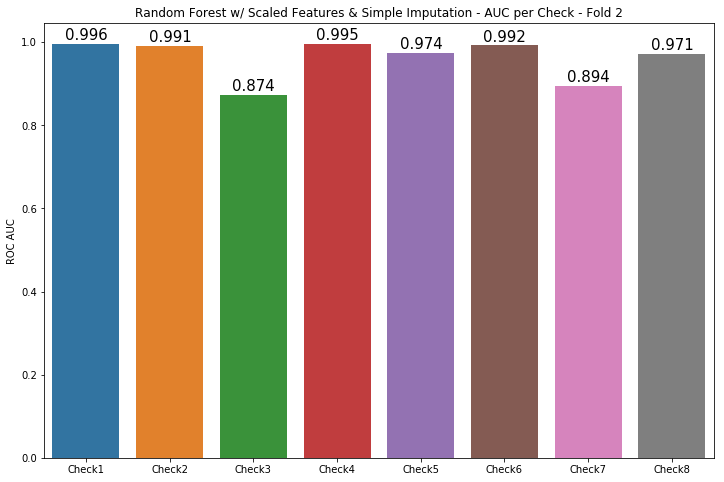

Fold:  3  - Elapsed time =  35.8820 s



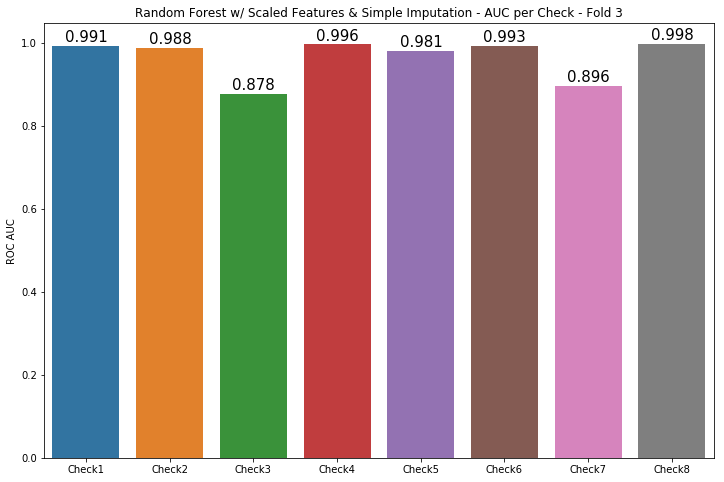

Fold:  4  - Elapsed time =  37.8563 s



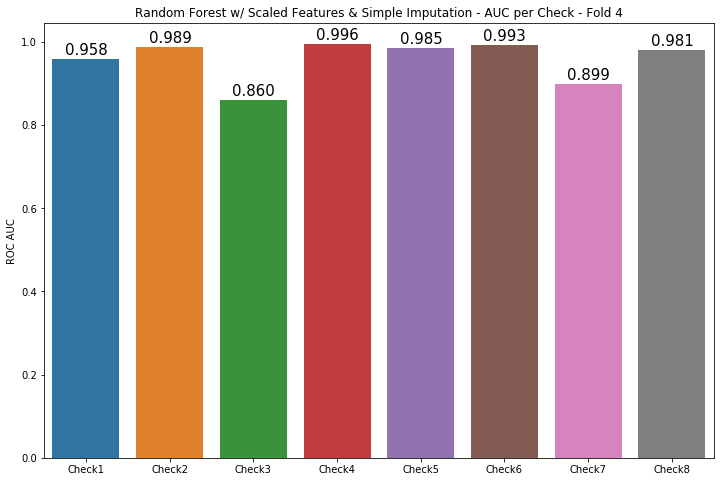

Fold:  5  - Elapsed time =  38.0869 s



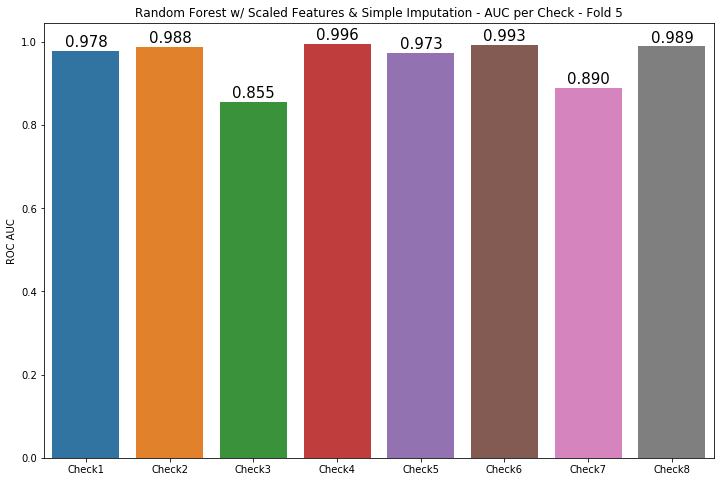

Fold:  6  - Elapsed time =  38.8574 s



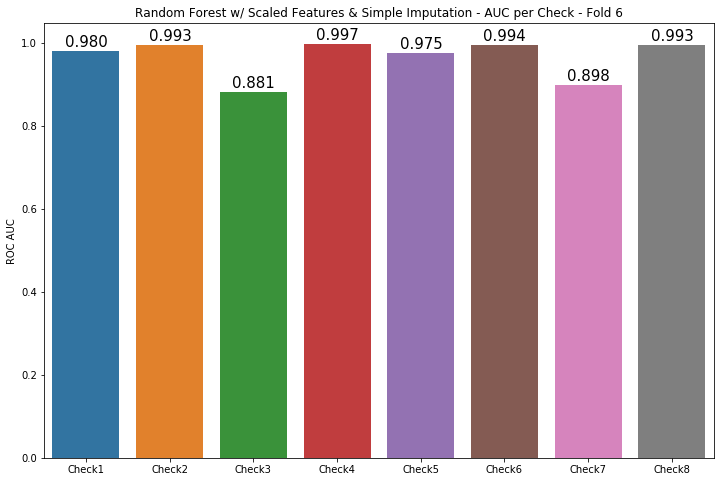

Fold:  7  - Elapsed time =  39.1460 s



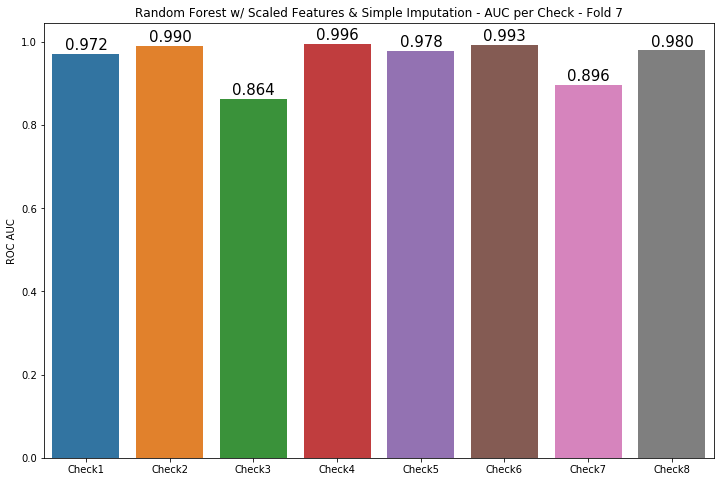

Fold:  8  - Elapsed time =  38.5705 s



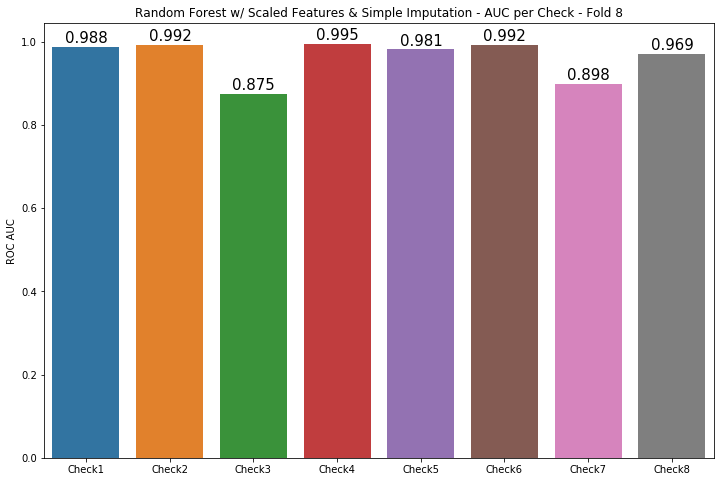

Fold:  9  - Elapsed time =  38.8394 s



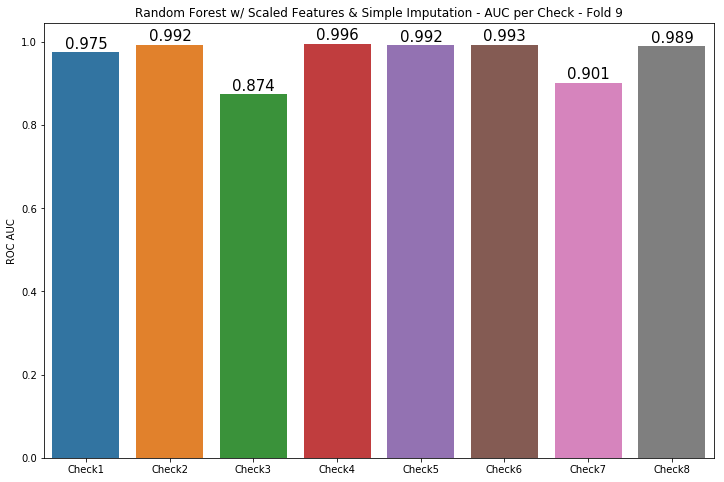

Fold:  10  - Elapsed time =  37.2846 s



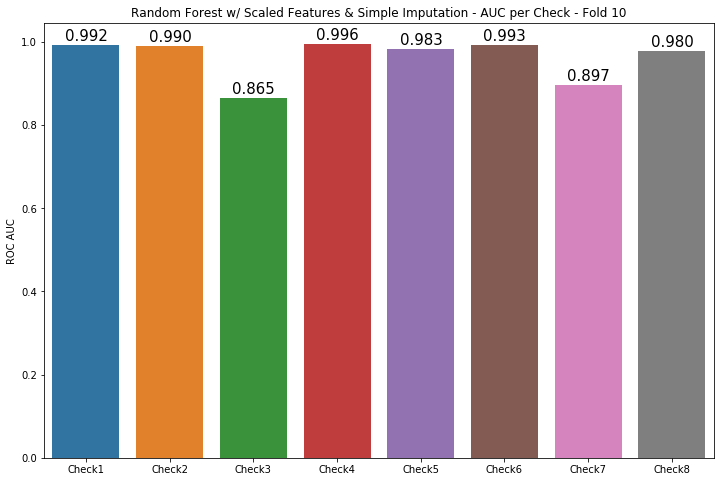

In [ ]:
folds = 10

stkf = KFold(n_splits=folds,shuffle=False)

totalScores = np.zeros(8)

for i, (train_index, val_index) in enumerate(stkf.split(trainScaledSimpleImpute)):
    
    # Initialize Timer
    start = time.time()
    
    # Create a Logistic Regression Model
    randForest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
    ovr_classifier = OneVsRestClassifier(estimator = randForest)
    ovr_classifier.fit(trainScaledSimpleImpute[attrsSimpleImpute].iloc[train_index], trainScaledSimpleImpute[labels].iloc[train_index])
    
    
    preds = ovr_classifier.predict(trainScaledSimpleImpute[attrsSimpleImpute].iloc[val_index])
    scorePerCheck = roc_auc_score(trainScaledSimpleImpute[labels].iloc[val_index], preds, average = None)
    
    totalScores += scorePerCheck
    
    end = time.time()
    dur = end - start
    
    print("===================================================================================")
    print("Fold: ", i+1, " - Elapsed time = ","%.4f" % dur,"s")
    print("===================================================================================")
    print()
    
    plt.figure(figsize=(12,8))
    sns.barplot(np.arange(8),scorePerCheck)
    plt.xticks(np.arange(8),labels)
    plt.title(str("Random Forest w/ Scaled Features & Simple Imputation - AUC per Check - Fold "+str(i+1)))
    plt.ylabel("ROC AUC")
    for i, score in enumerate(scorePerCheck):
        plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
    plt.show()

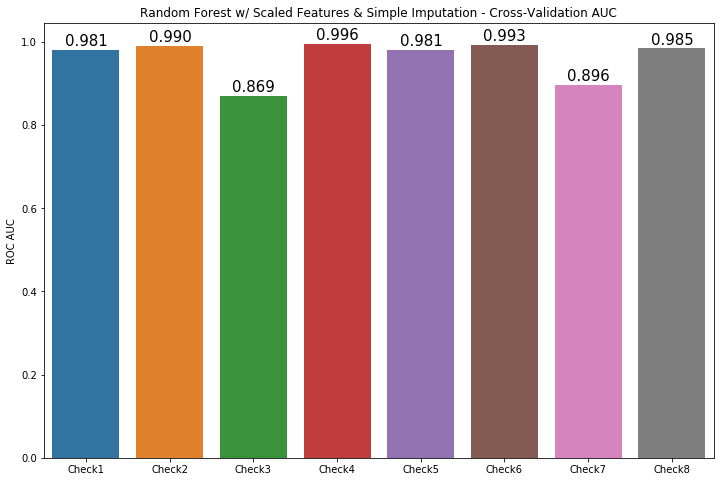

In [ ]:
totalScores /= folds

modelPerformanceDict['ModelName'] = 'Random Forest w/ Scaled Features & Simple Imputation'
for score, column in zip(totalScores, modelPerformanceDF.columns[1:]):
    modelPerformanceDict[column] = score

modelPerformanceDF = modelPerformanceDF.append(modelPerformanceDict, ignore_index=True)

plt.figure(figsize=(12,8))
sns.barplot(np.arange(8),totalScores)
plt.xticks(np.arange(8),labels)
plt.title("Random Forest w/ Scaled Features & Simple Imputation - Cross-Validation AUC")
plt.ylabel("ROC AUC")
for i, score in enumerate(totalScores):
    plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
plt.show()

#### Unscaled Dataset w/ KNN Imputation

Fold:  1  - Elapsed time =  36.7538 s



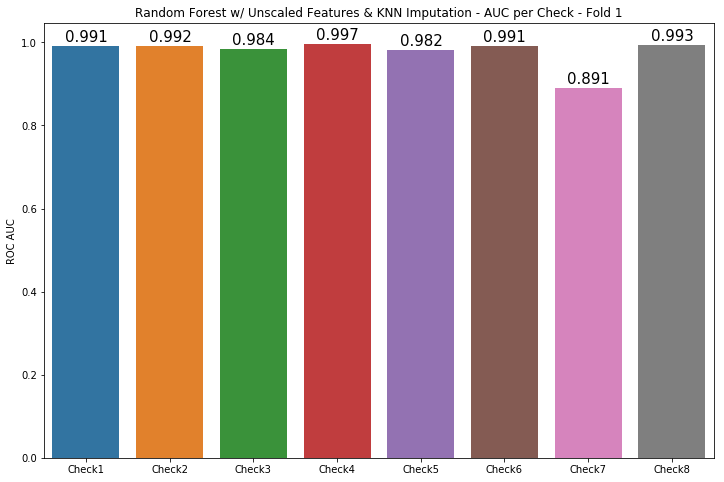

Fold:  2  - Elapsed time =  40.3820 s



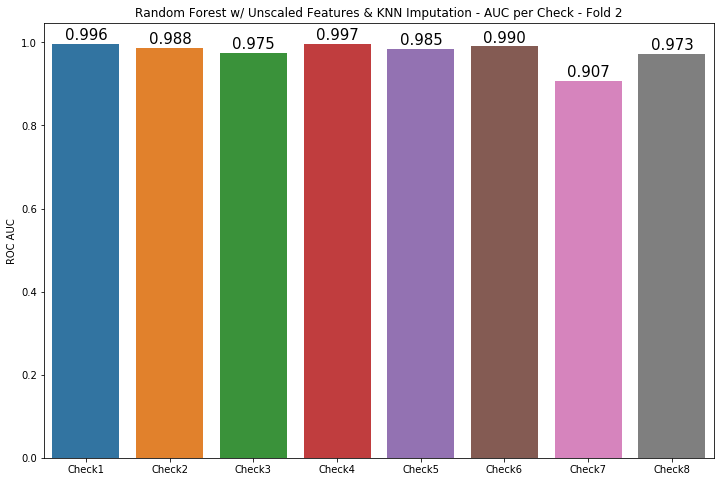

Fold:  3  - Elapsed time =  40.2708 s



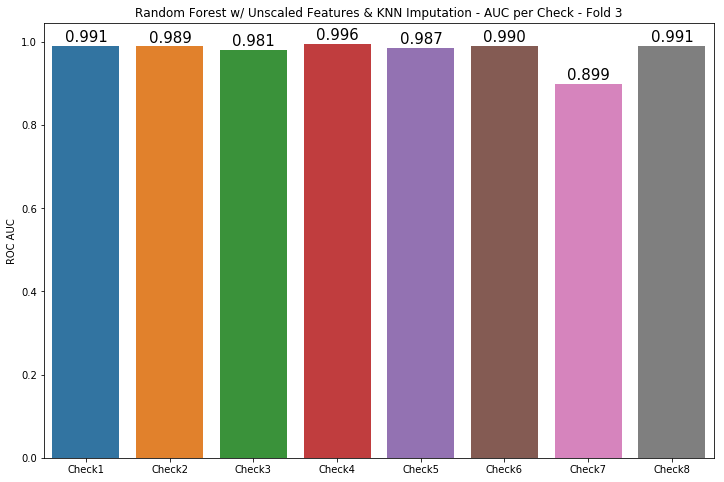

Fold:  4  - Elapsed time =  39.5244 s



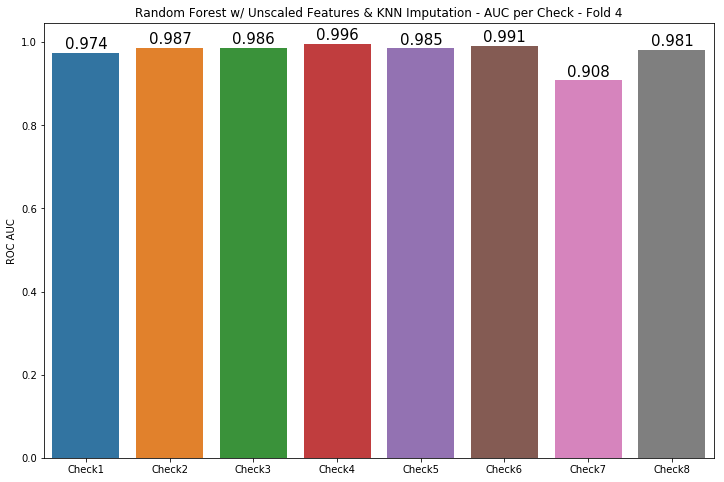

Fold:  5  - Elapsed time =  38.9719 s



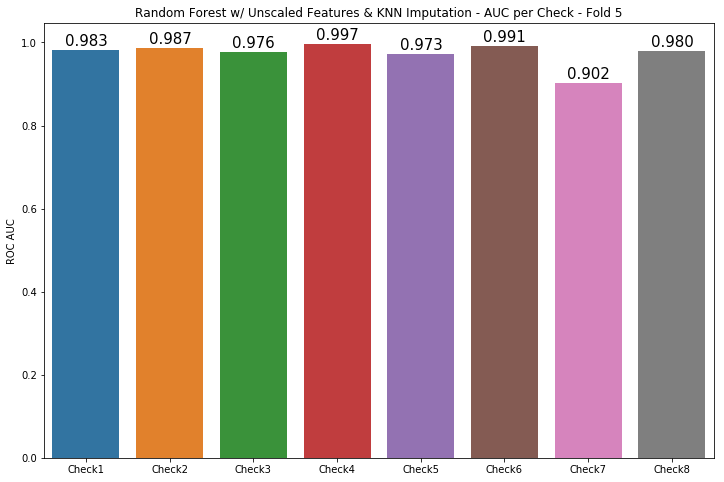

Fold:  6  - Elapsed time =  38.3370 s



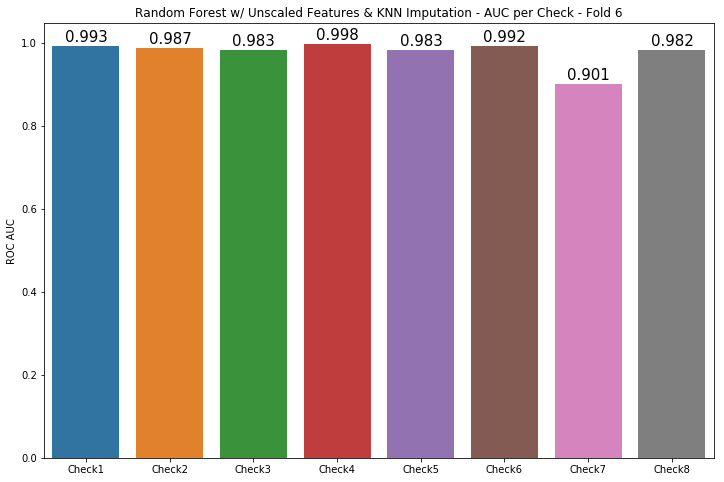

Fold:  7  - Elapsed time =  39.2655 s



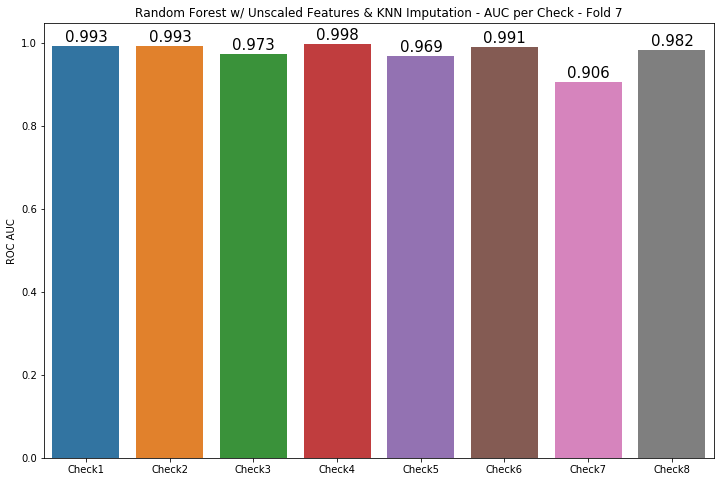

Fold:  8  - Elapsed time =  37.2472 s



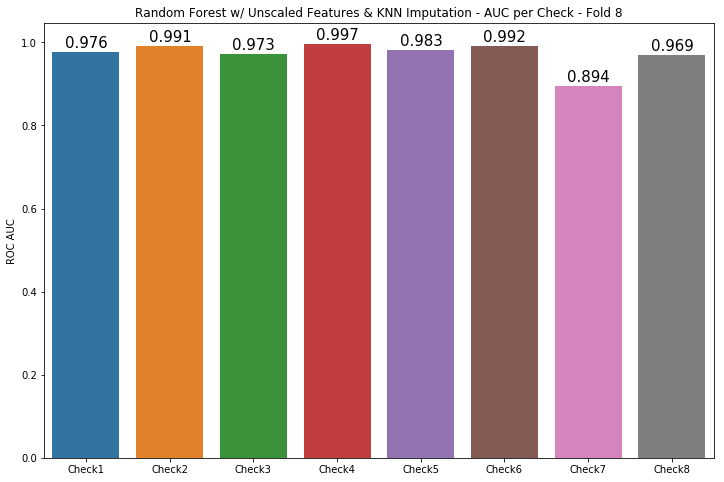

Fold:  9  - Elapsed time =  37.6202 s



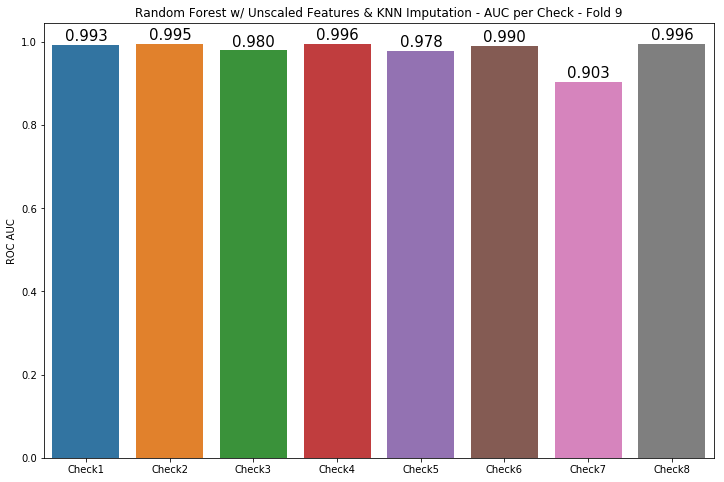

Fold:  10  - Elapsed time =  38.9150 s



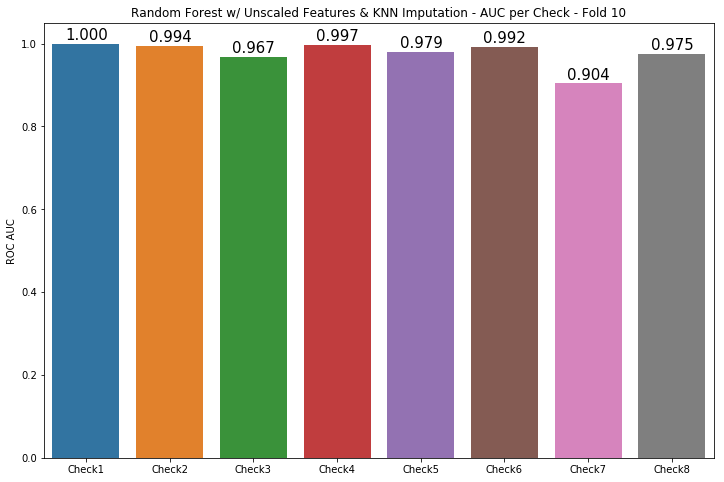

In [ ]:
folds = 10

stkf = KFold(n_splits=folds,shuffle=False)

totalScores = np.zeros(8)

for i, (train_index, val_index) in enumerate(stkf.split(trainKNNImpute)):
    
    # Initialize Timer
    start = time.time()
    
    # Create a Logistic Regression Model
    randForest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
    ovr_classifier = OneVsRestClassifier(estimator = randForest)
    ovr_classifier.fit(trainKNNImpute[attrs].iloc[train_index], trainKNNImpute[labels].iloc[train_index])
    
    
    preds = ovr_classifier.predict(trainKNNImpute[attrs].iloc[val_index])
    scorePerCheck = roc_auc_score(trainKNNImpute[labels].iloc[val_index], preds, average = None)
    
    totalScores += scorePerCheck
    
    end = time.time()
    dur = end - start
    
    print("===================================================================================")
    print("Fold: ", i+1, " - Elapsed time = ","%.4f" % dur,"s")
    print("===================================================================================")
    print()
    
    plt.figure(figsize=(12,8))
    sns.barplot(np.arange(8),scorePerCheck)
    plt.xticks(np.arange(8),labels)
    plt.title(str("Random Forest w/ Unscaled Features & KNN Imputation - AUC per Check - Fold "+str(i+1)))
    plt.ylabel("ROC AUC")
    for i, score in enumerate(scorePerCheck):
        plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
    plt.show()

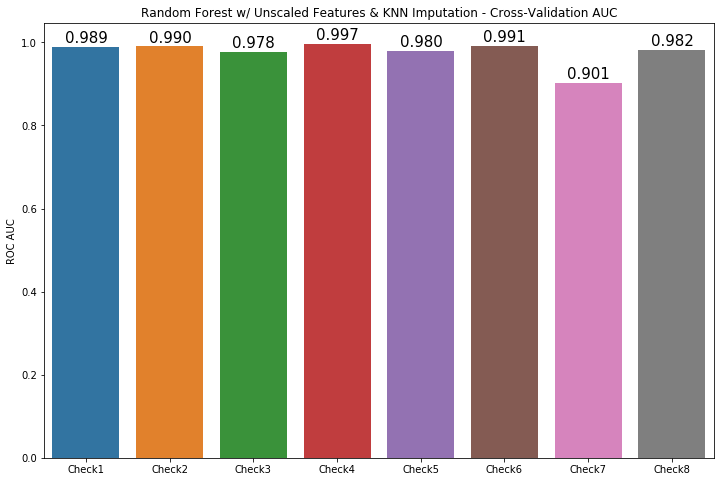

In [ ]:
totalScores /= folds

modelPerformanceDict['ModelName'] = 'Random Forest w/ Unscaled Features & KNN Imputation'
for score, column in zip(totalScores, modelPerformanceDF.columns[1:]):
    modelPerformanceDict[column] = score

modelPerformanceDF = modelPerformanceDF.append(modelPerformanceDict, ignore_index=True)

plt.figure(figsize=(12,8))
sns.barplot(np.arange(8),totalScores)
plt.xticks(np.arange(8),labels)
plt.title("Random Forest w/ Unscaled Features & KNN Imputation - Cross-Validation AUC")
plt.ylabel("ROC AUC")
for i, score in enumerate(totalScores):
    plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
plt.show()

#### Scaled Dataset w/ KNN Imputation

Fold:  1  - Elapsed time =  42.5979 s



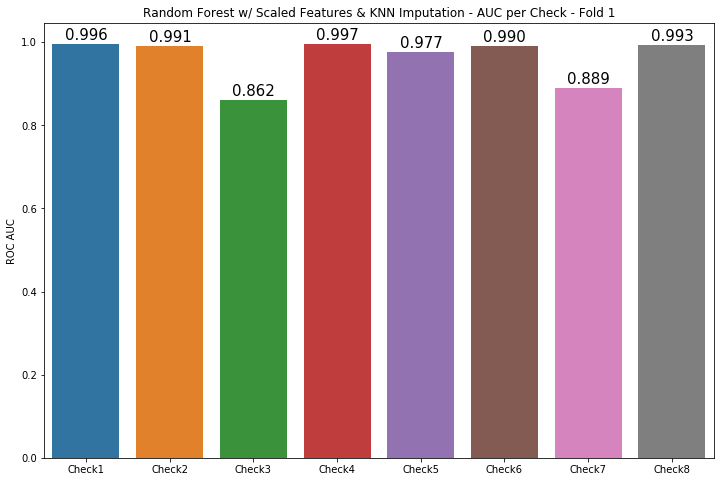

Fold:  2  - Elapsed time =  42.5281 s



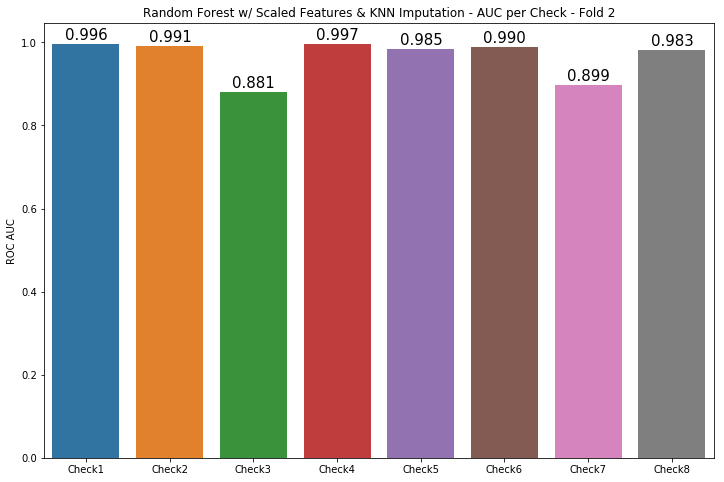

Fold:  3  - Elapsed time =  42.8252 s



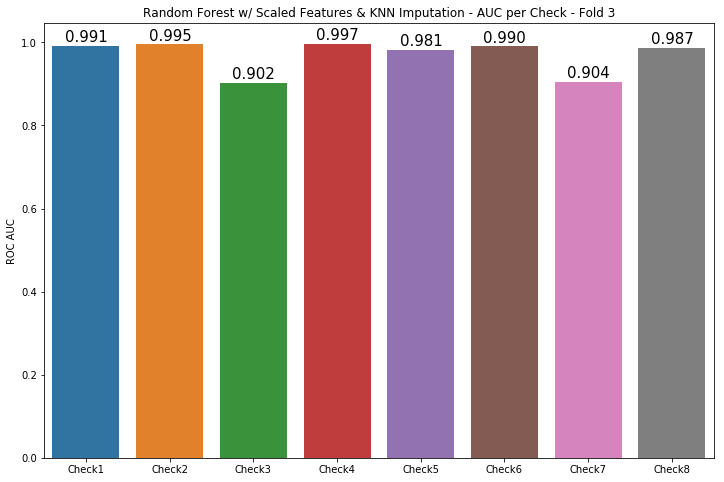

Fold:  4  - Elapsed time =  41.2102 s



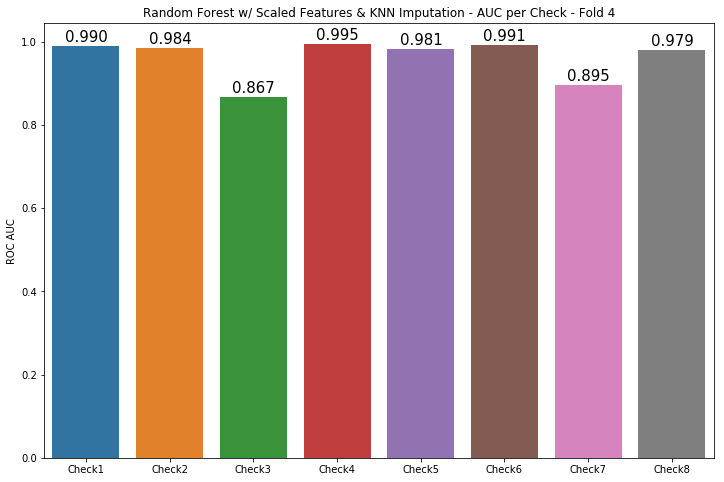

Fold:  5  - Elapsed time =  39.7305 s



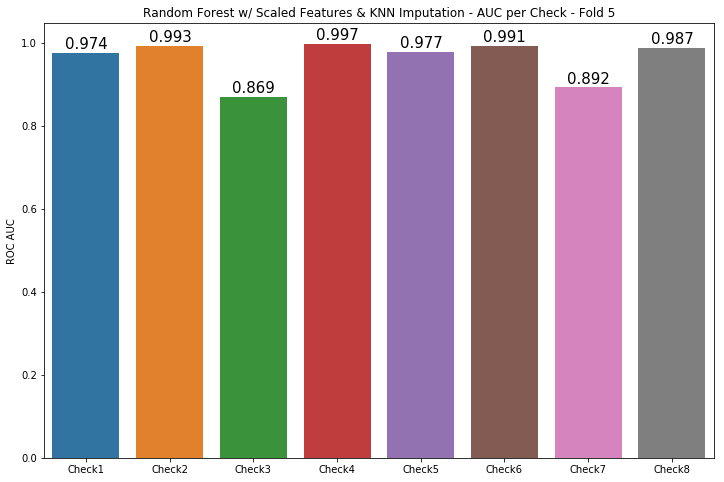

Fold:  6  - Elapsed time =  38.2099 s



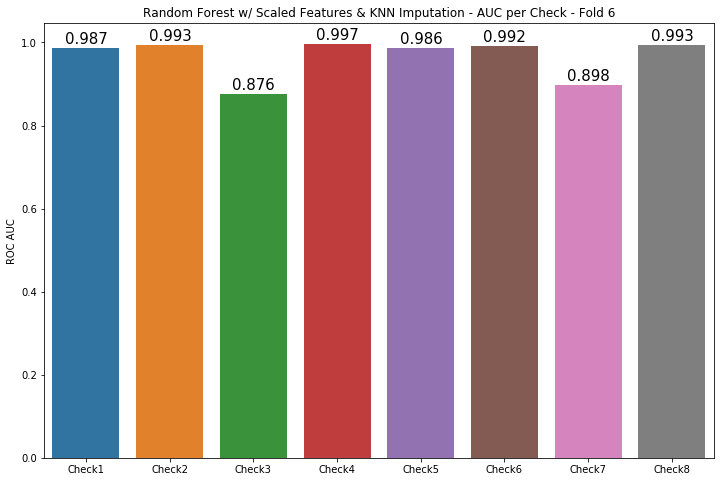

Fold:  7  - Elapsed time =  40.1581 s



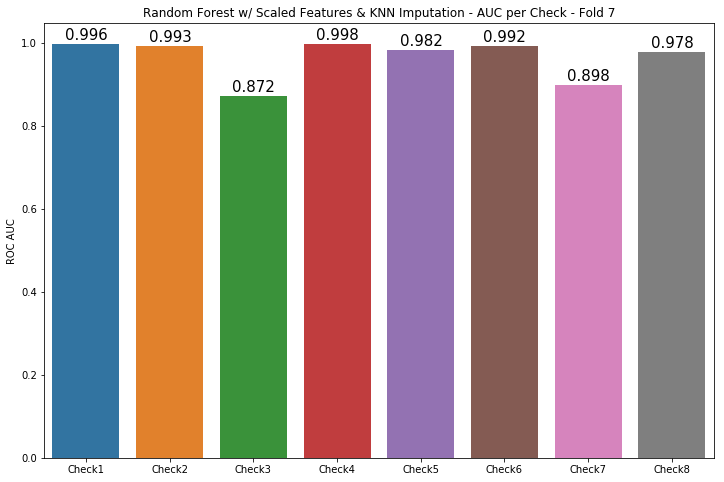

Fold:  8  - Elapsed time =  40.8061 s



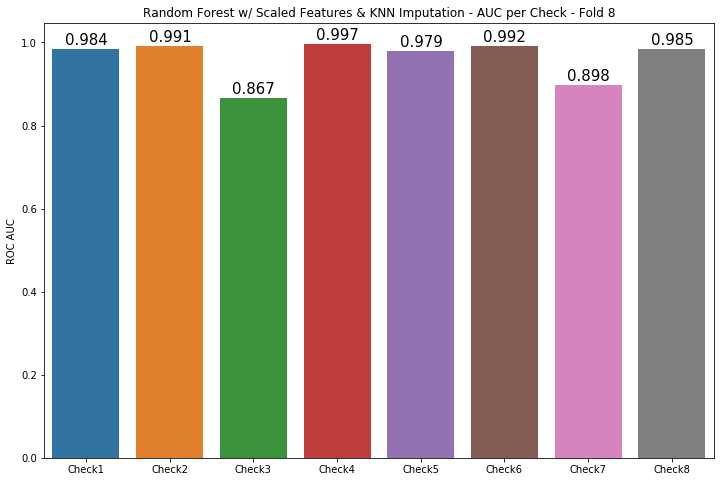

Fold:  9  - Elapsed time =  40.7436 s



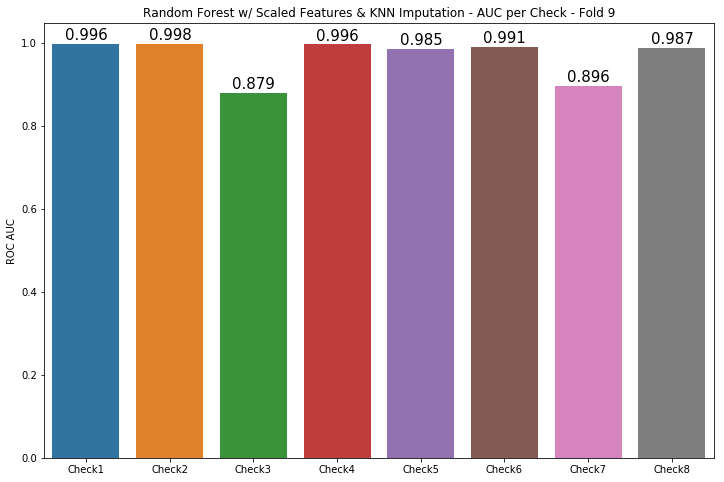

Fold:  10  - Elapsed time =  40.0698 s



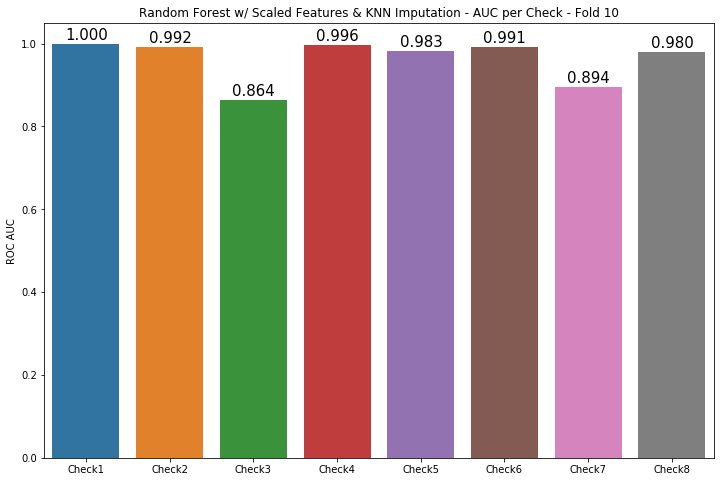

In [ ]:
folds = 10

stkf = KFold(n_splits=folds,shuffle=False)

totalScores = np.zeros(8)

for i, (train_index, val_index) in enumerate(stkf.split(trainScaledKNNImpute)):
    
    # Initialize Timer
    start = time.time()
    
    # Create a Logistic Regression Model
    randForest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
    ovr_classifier = OneVsRestClassifier(estimator = randForest)
    ovr_classifier.fit(trainScaledKNNImpute[attrs].iloc[train_index], trainScaledKNNImpute[labels].iloc[train_index])
    
    
    preds = ovr_classifier.predict(trainScaledKNNImpute[attrs].iloc[val_index])
    scorePerCheck = roc_auc_score(trainScaledKNNImpute[labels].iloc[val_index], preds, average = None)
    
    totalScores += scorePerCheck
    
    end = time.time()
    dur = end - start
    
    print("===================================================================================")
    print("Fold: ", i+1, " - Elapsed time = ","%.4f" % dur,"s")
    print("===================================================================================")
    print()
    
    plt.figure(figsize=(12,8))
    sns.barplot(np.arange(8),scorePerCheck)
    plt.xticks(np.arange(8),labels)
    plt.title(str("Random Forest w/ Scaled Features & KNN Imputation - AUC per Check - Fold "+str(i+1)))
    plt.ylabel("ROC AUC")
    for i, score in enumerate(scorePerCheck):
        plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
    plt.show()

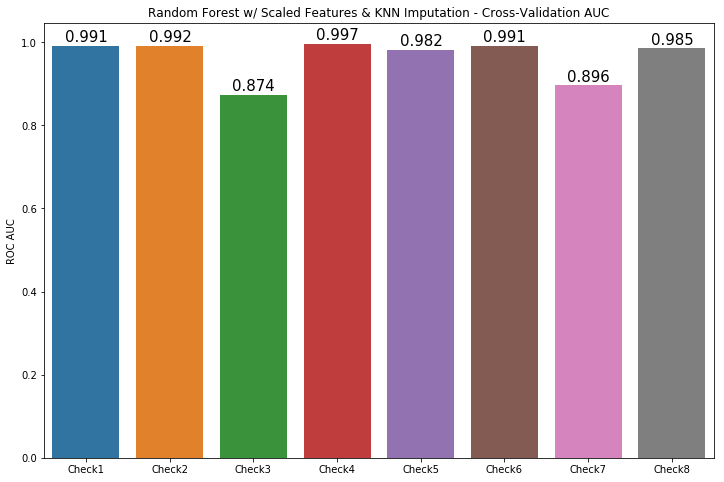

In [ ]:
totalScores /= folds

modelPerformanceDict['ModelName'] = 'Random Forest w/ Scaled Features & KNN Imputation'
for score, column in zip(totalScores, modelPerformanceDF.columns[1:]):
    modelPerformanceDict[column] = score

modelPerformanceDF = modelPerformanceDF.append(modelPerformanceDict, ignore_index=True)

plt.figure(figsize=(12,8))
sns.barplot(np.arange(8),totalScores)
plt.xticks(np.arange(8),labels)
plt.title("Random Forest w/ Scaled Features & KNN Imputation - Cross-Validation AUC")
plt.ylabel("ROC AUC")
for i, score in enumerate(totalScores):
    plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
plt.show()

In [ ]:
import pickle
with open('performance.pkl', 'wb') as handle:
    pickle.dump(modelPerformanceDF, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('performance.pkl', 'rb') as handle:
    modelPerformanceDF = pickle.load(handle)

In [ ]:
modelPerformanceDF

ModelName  Check1AUC  Check2AUC  \
0                Logistic Regression w/ Simple Impute   0.500713   0.915307   
1                   Logistic Regression w/ KNN Impute   0.500715   0.903843   
2                    Naive Bayes w/ Simple Imputation   0.854874   0.961772   
3                       Naive Bayes w/ KNN Imputation   0.943024   0.963685   
4   Decision Trees w/ Unscaled Features & Simple I...   0.988926   0.992290   
5   Decision Trees w/ Scaled Features & Simple Imp...   0.988856   0.992505   
6   Decision Trees w/ Unscaled Features & KNN Impu...   0.990680   0.989076   
7   Decision Trees w/ Scaled Features & KNN Imputa...   0.990745   0.987306   
8                                       Random Forest   0.981869   0.990224   
9   Random Forest w/ Unscaled Features & Simple Im...   0.984725   0.991560   
10  Random Forest w/ Scaled Features & Simple Impu...   0.980500   0.990473   
11  Random Forest w/ Unscaled Features & KNN Imput...   0.989103   0.990328   
12  Random Forest w/ Scaled Features & KNN Imputation   0.991120   0.992122   

    Check3AUC  Check4AUC  Check5AUC  Check6AUC  Check7AUC  Check8AUC  
0    0.501204   0.989491   0.773169   0.605967   0.613248   0.589506  
1    0.501621   0.991572   0.772328   0.589607   0.643414   0.588233  
2    0.629465   0.952913   0.924879   0.679170   0.655934   0.971537  
3    0.694991   0.953472   0.931591   0.619904   0.689051   0.978873  
4    0.986057   0.992142   0.981706   0.992848   0.927323   1.000000  
5    0.940898   0.991711   0.981031   0.992428   0.925715   1.000000  
6    0.974536   0.992041   0.982200   0.989186   0.933444   1.000000  
7    0.934271   0.991197   0.983947   0.988574   0.931857   1.000000  
8    0.978044   0.996100   0.980658   0.993261   0.896613   0.983381  
9    0.979027   0.996592   0.980343   0.992832   0.896047   0.985123  
10   0.869342   0.996079   0.980959   0.992839   0.896224   0.984580  
11   0.977930   0.996962   0.980365   0.991114   0.901443   0.982298  
12   0.873825   0.996770   0.981727   0.990877   0.896146   0.985118

### Gradient Boosting

#### Unscaled Dataset w/ Simple Imputation

In [ ]:
folds = 10

stkf = KFold(n_splits=folds,shuffle=False)

totalScores = np.zeros(8)

for i, (train_index, val_index) in enumerate(stkf.split(trainSimpleImpute)):
    
    # Initialize Timer
    start = time.time()
    
    # Create a Logistic Regression Model
    gboost = GradientBoostingClassifier(loss='deviance',
                                         learning_rate=0.1,
                                         n_estimators=10,
                                         subsample=1.0,
                                         criterion='friedman_mse',
                                         min_samples_split=2,
                                         min_samples_leaf=1,
                                         min_weight_fraction_leaf=0.0,
                                         max_depth=10,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         init=None,
                                         random_state=None,
                                         max_features=None,
                                         verbose=0,
                                         max_leaf_nodes=None,
                                         warm_start=False,
                                         presort='auto')
    ovr_classifier = OneVsRestClassifier(estimator = gboost)
    ovr_classifier.fit(trainSimpleImpute[attrsSimpleImpute].iloc[train_index], trainSimpleImpute[labels].iloc[train_index])
    
    
    preds = ovr_classifier.predict(trainSimpleImpute[attrsSimpleImpute].iloc[val_index])
    scorePerCheck = roc_auc_score(trainSimpleImpute[labels].iloc[val_index], preds, average = None)
    
    totalScores += scorePerCheck
    
    end = time.time()
    dur = end - start
    
    print("===================================================================================")
    print("Fold: ", i+1, " - Elapsed time = ","%.4f" % dur,"s")
    print("===================================================================================")
    print()
    
    plt.figure(figsize=(12,8))
    sns.barplot(np.arange(8),scorePerCheck)
    plt.xticks(np.arange(8),labels)
    plt.title(str("Gradient Boosting - AUC per Check - Fold "+str(i+1)))
    plt.ylabel("ROC AUC")
    for i, score in enumerate(scorePerCheck):
        plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
    plt.show()

KeyboardInterrupt: 

In [ ]:
totalScores /= folds

modelPerformanceDict['ModelName'] = 'Gradient Boosting'
for score, column in zip(totalScores, modelPerformanceDF.columns[1:]):
    modelPerformanceDict[column] = score

modelPerformanceDF = modelPerformanceDF.append(modelPerformanceDict, ignore_index=True)

plt.figure(figsize=(12,8))
sns.barplot(np.arange(8),totalScores)
plt.xticks(np.arange(8),labels)
plt.title("Gradient Boosting - Cross-Validation AUC")
plt.ylabel("ROC AUC")
for i, score in enumerate(totalScores):
    plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
plt.show()

#### Unscaled Dataset w/ Simple Imputation

In [ ]:
folds = 10

stkf = KFold(n_splits=folds,shuffle=False)

totalScores = np.zeros(8)

for i, (train_index, val_index) in enumerate(stkf.split(trainSimpleImpute)):
    
    # Initialize Timer
    start = time.time()
    
    # Create a Logistic Regression Model
    gboost = GradientBoostingClassifier(loss='deviance',
                                         learning_rate=0.1,
                                         n_estimators=10,
                                         subsample=1.0,
                                         criterion='friedman_mse',
                                         min_samples_split=2,
                                         min_samples_leaf=1,
                                         min_weight_fraction_leaf=0.0,
                                         max_depth=10,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         init=None,
                                         random_state=None,
                                         max_features=None,
                                         verbose=0,
                                         max_leaf_nodes=None,
                                         warm_start=False,
                                         presort='auto')
    ovr_classifier = OneVsRestClassifier(estimator = gboost)
    ovr_classifier.fit(trainSimpleImpute[attrsSimpleImpute].iloc[train_index], trainSimpleImpute[labels].iloc[train_index])
    
    
    preds = ovr_classifier.predict(trainSimpleImpute[attrsSimpleImpute].iloc[val_index])
    scorePerCheck = roc_auc_score(trainSimpleImpute[labels].iloc[val_index], preds, average = None)
    
    totalScores += scorePerCheck
    
    end = time.time()
    dur = end - start
    
    print("===================================================================================")
    print("Fold: ", i+1, " - Elapsed time = ","%.4f" % dur,"s")
    print("===================================================================================")
    print()
    
    plt.figure(figsize=(12,8))
    sns.barplot(np.arange(8),scorePerCheck)
    plt.xticks(np.arange(8),labels)
    plt.title(str("Gradient Boosting w/ Unscaled Features & Simple Imputation - AUC per Check - Fold "+str(i+1)))
    plt.ylabel("ROC AUC")
    for i, score in enumerate(scorePerCheck):
        plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
    plt.show()

In [ ]:
totalScores /= folds

modelPerformanceDict['ModelName'] = 'Gradient Boosting w/ Unscaled Features & Simple Imputation'
for score, column in zip(totalScores, modelPerformanceDF.columns[1:]):
    modelPerformanceDict[column] = score

modelPerformanceDF = modelPerformanceDF.append(modelPerformanceDict, ignore_index=True)

plt.figure(figsize=(12,8))
sns.barplot(np.arange(8),totalScores)
plt.xticks(np.arange(8),labels)
plt.title("Gradient Boosting w/ Unscaled Features & Simple Imputation - Cross-Validation AUC")
plt.ylabel("ROC AUC")
for i, score in enumerate(totalScores):
    plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
plt.show()

#### Scaled Dataset w/ Simple Imputation

In [ ]:
folds = 10

stkf = KFold(n_splits=folds,shuffle=False)

totalScores = np.zeros(8)

for i, (train_index, val_index) in enumerate(stkf.split(trainScaledSimpleImpute)):
    
    # Initialize Timer
    start = time.time()
    
    # Create a Logistic Regression Model
    gboost = GradientBoostingClassifier(loss='deviance',
                                         learning_rate=0.1,
                                         n_estimators=10,
                                         subsample=1.0,
                                         criterion='friedman_mse',
                                         min_samples_split=2,
                                         min_samples_leaf=1,
                                         min_weight_fraction_leaf=0.0,
                                         max_depth=10,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         init=None,
                                         random_state=None,
                                         max_features=None,
                                         verbose=0,
                                         max_leaf_nodes=None,
                                         warm_start=False,
                                         presort='auto')
    ovr_classifier = OneVsRestClassifier(estimator = gboost)
    ovr_classifier.fit(trainScaledSimpleImpute[attrsSimpleImpute].iloc[train_index], trainScaledSimpleImpute[labels].iloc[train_index])
    
    
    preds = ovr_classifier.predict(trainScaledSimpleImpute[attrsSimpleImpute].iloc[val_index])
    scorePerCheck = roc_auc_score(trainScaledSimpleImpute[labels].iloc[val_index], preds, average = None)
    
    totalScores += scorePerCheck
    
    end = time.time()
    dur = end - start
    
    print("===================================================================================")
    print("Fold: ", i+1, " - Elapsed time = ","%.4f" % dur,"s")
    print("===================================================================================")
    print()
    
    plt.figure(figsize=(12,8))
    sns.barplot(np.arange(8),scorePerCheck)
    plt.xticks(np.arange(8),labels)
    plt.title(str("Gradient Boosting w/ Scaled Features & Simple Imputation - AUC per Check - Fold "+str(i+1)))
    plt.ylabel("ROC AUC")
    for i, score in enumerate(scorePerCheck):
        plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
    plt.show()

In [ ]:
totalScores /= folds

modelPerformanceDict['ModelName'] = 'Gradient Boosting w/ Scaled Features & Simple Imputation'
for score, column in zip(totalScores, modelPerformanceDF.columns[1:]):
    modelPerformanceDict[column] = score

modelPerformanceDF = modelPerformanceDF.append(modelPerformanceDict, ignore_index=True)

plt.figure(figsize=(12,8))
sns.barplot(np.arange(8),totalScores)
plt.xticks(np.arange(8),labels)
plt.title("Gradient Boosting w/ Scaled Features & Simple Imputation - Cross-Validation AUC")
plt.ylabel("ROC AUC")
for i, score in enumerate(totalScores):
    plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
plt.show()

#### Unscaled Dataset w/ KNN Imputation

In [ ]:
folds = 10

stkf = KFold(n_splits=folds,shuffle=False)

totalScores = np.zeros(8)

for i, (train_index, val_index) in enumerate(stkf.split(trainKNNImpute)):
    
    # Initialize Timer
    start = time.time()
    
    # Create a Logistic Regression Model
    gboost = GradientBoostingClassifier(loss='deviance',
                                         learning_rate=0.1,
                                         n_estimators=10,
                                         subsample=1.0,
                                         criterion='friedman_mse',
                                         min_samples_split=2,
                                         min_samples_leaf=1,
                                         min_weight_fraction_leaf=0.0,
                                         max_depth=10,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         init=None,
                                         random_state=None,
                                         max_features=None,
                                         verbose=0,
                                         max_leaf_nodes=None,
                                         warm_start=False,
                                         presort='auto')
    ovr_classifier = OneVsRestClassifier(estimator = gboost)
    ovr_classifier.fit(trainKNNImpute[attrs].iloc[train_index], trainKNNImpute[labels].iloc[train_index])
    
    
    preds = ovr_classifier.predict(trainKNNImpute[attrs].iloc[val_index])
    scorePerCheck = roc_auc_score(trainKNNImpute[labels].iloc[val_index], preds, average = None)
    
    totalScores += scorePerCheck
    
    end = time.time()
    dur = end - start
    
    print("===================================================================================")
    print("Fold: ", i+1, " - Elapsed time = ","%.4f" % dur,"s")
    print("===================================================================================")
    print()
    
    plt.figure(figsize=(12,8))
    sns.barplot(np.arange(8),scorePerCheck)
    plt.xticks(np.arange(8),labels)
    plt.title(str("Gradient Boosting w/ Unscaled Features & KNN Imputation - AUC per Check - Fold "+str(i+1)))
    plt.ylabel("ROC AUC")
    for i, score in enumerate(scorePerCheck):
        plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
    plt.show()

In [ ]:
totalScores /= folds

modelPerformanceDict['ModelName'] = 'Gradient Boosting w/ Unscaled Features & KNN Imputation'
for score, column in zip(totalScores, modelPerformanceDF.columns[1:]):
    modelPerformanceDict[column] = score

modelPerformanceDF = modelPerformanceDF.append(modelPerformanceDict, ignore_index=True)

plt.figure(figsize=(12,8))
sns.barplot(np.arange(8),totalScores)
plt.xticks(np.arange(8),labels)
plt.title("Gradient Boosting w/ Unscaled Features & KNN Imputation - Cross-Validation AUC")
plt.ylabel("ROC AUC")
for i, score in enumerate(totalScores):
    plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
plt.show()

#### Scaled Dataset w/ KNN Imputation

In [ ]:
folds = 10

stkf = KFold(n_splits=folds,shuffle=False)

totalScores = np.zeros(8)

for i, (train_index, val_index) in enumerate(stkf.split(trainScaledKNNImpute)):
    
    # Initialize Timer
    start = time.time()
    
    # Create a Logistic Regression Model
    gboost = GradientBoostingClassifier(loss='deviance',
                                         learning_rate=0.1,
                                         n_estimators=10,
                                         subsample=1.0,
                                         criterion='friedman_mse',
                                         min_samples_split=2,
                                         min_samples_leaf=1,
                                         min_weight_fraction_leaf=0.0,
                                         max_depth=10,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         init=None,
                                         random_state=None,
                                         max_features=None,
                                         verbose=0,
                                         max_leaf_nodes=None,
                                         warm_start=False,
                                         presort='auto')
    ovr_classifier = OneVsRestClassifier(estimator = gboost)
    ovr_classifier.fit(trainScaledKNNImpute[attrs].iloc[train_index], trainScaledKNNImpute[labels].iloc[train_index])
    
    
    preds = ovr_classifier.predict(trainScaledKNNImpute[attrs].iloc[val_index])
    scorePerCheck = roc_auc_score(trainScaledKNNImpute[labels].iloc[val_index], preds, average = None)
    
    totalScores += scorePerCheck
    
    end = time.time()
    dur = end - start
    
    print("===================================================================================")
    print("Fold: ", i+1, " - Elapsed time = ","%.4f" % dur,"s")
    print("===================================================================================")
    print()
    
    plt.figure(figsize=(12,8))
    sns.barplot(np.arange(8),scorePerCheck)
    plt.xticks(np.arange(8),labels)
    plt.title(str("Gradient Boosting w/ Scaled Features & KNN Imputation - AUC per Check - Fold "+str(i+1)))
    plt.ylabel("ROC AUC")
    for i, score in enumerate(scorePerCheck):
        plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
    plt.show()

In [ ]:
totalScores /= folds

modelPerformanceDict['ModelName'] = 'Gradient Boosting w/ Scaled Features & KNN Imputation'
for score, column in zip(totalScores, modelPerformanceDF.columns[1:]):
    modelPerformanceDict[column] = score

modelPerformanceDF = modelPerformanceDF.append(modelPerformanceDict, ignore_index=True)

plt.figure(figsize=(12,8))
sns.barplot(np.arange(8),totalScores)
plt.xticks(np.arange(8),labels)
plt.title("Gradient Boosting w/ Scaled Features & KNN Imputation - Cross-Validation AUC")
plt.ylabel("ROC AUC")
for i, score in enumerate(totalScores):
    plt.annotate("%.3f" % score, (i-0.25,score+0.01), size = 15)
plt.show()

In [ ]:
import pickle
with open('performance.pkl', 'wb') as handle:
    pickle.dump(modelPerformanceDF, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('performance.pkl', 'rb') as handle:
    modelPerformanceDF = pickle.load(handle)

In [153]:
modelPerformanceDF

ModelName  Check1AUC  Check2AUC  \
0                Logistic Regression w/ Simple Impute   0.500713   0.915307   
1                   Logistic Regression w/ KNN Impute   0.500715   0.903843   
2                    Naive Bayes w/ Simple Imputation   0.854874   0.961772   
3                       Naive Bayes w/ KNN Imputation   0.943024   0.963685   
4   Decision Trees w/ Unscaled Features & Simple I...   0.988926   0.992290   
5   Decision Trees w/ Scaled Features & Simple Imp...   0.988856   0.992505   
6   Decision Trees w/ Unscaled Features & KNN Impu...   0.990680   0.989076   
7   Decision Trees w/ Scaled Features & KNN Imputa...   0.990745   0.987306   
8                                       Random Forest   0.981869   0.990224   
9   Random Forest w/ Unscaled Features & Simple Im...   0.984725   0.991560   
10  Random Forest w/ Scaled Features & Simple Impu...   0.980500   0.990473   
11  Random Forest w/ Unscaled Features & KNN Imput...   0.989103   0.990328   
12  Random Forest w/ Scaled Features & KNN Imputation   0.991120   0.992122   

    Check3AUC  Check4AUC  Check5AUC  Check6AUC  Check7AUC  Check8AUC  
0    0.501204   0.989491   0.773169   0.605967   0.613248   0.589506  
1    0.501621   0.991572   0.772328   0.589607   0.643414   0.588233  
2    0.629465   0.952913   0.924879   0.679170   0.655934   0.971537  
3    0.694991   0.953472   0.931591   0.619904   0.689051   0.978873  
4    0.986057   0.992142   0.981706   0.992848   0.927323   1.000000  
5    0.940898   0.991711   0.981031   0.992428   0.925715   1.000000  
6    0.974536   0.992041   0.982200   0.989186   0.933444   1.000000  
7    0.934271   0.991197   0.983947   0.988574   0.931857   1.000000  
8    0.978044   0.996100   0.980658   0.993261   0.896613   0.983381  
9    0.979027   0.996592   0.980343   0.992832   0.896047   0.985123  
10   0.869342   0.996079   0.980959   0.992839   0.896224   0.984580  
11   0.977930   0.996962   0.980365   0.991114   0.901443   0.982298  
12   0.873825   0.996770   0.981727   0.990877   0.896146   0.985118

### Rule-based Models

In [176]:
trainKNNImpute.dtypes

SessionNumber                              int64
SystemID                                   int64
Date                                       int64
HighPriorityAlerts                         int64
Dumps                                      int64
CompositeOOMDums                           int64
IndexServerRestarts                        int64
NameServerRestarts                         int64
XSEngineRestarts                           int64
StatisticsServerRestarts                   int64
CPU                                      float64
PhysMEM                                  float64
InstanceMEM                              float64
TablesAllocation                         float64
IndexServerAllocationLimit               float64
ColumnUnloads                              int64
DeltaSize                                  int64
MergeErrors                                int64
BlockingPhaseSec                           int64
Disk                                     float64
LargestTableSize    

### CN2

In [ ]:
def series2descriptor(d):
    if d.dtype is np.dtype("float64") or d.dtype is np.dtype("int64"):
        return ContinuousVariable(str(d.name))
    else:
        t = d.unique()
        t.sort()
        return DiscreteVariable(str(d.name), list(t.astype("str")))

def df2domain(df):
    featurelist = [series2descriptor(df.iloc[:,col]) for col in range(len(df.columns))]
    return Domain(featurelist)

def df2table(df):
    tdomain = df2domain(df)
    ttables = [series2table(df.iloc[:,i], tdomain[i]) for i in range(len(df.columns))]
    ttables = np.array(ttables).reshape((len(df.columns),-1)).transpose()
    return Table(tdomain , ttables)

def series2table(series, variable):
    if series.dtype is np.dtype("int") or series.dtype is np.dtype("float"):
        series = series.values[:, np.newaxis]
        return Table(series)
    else:
        series = series.astype('category').cat.codes.reshape((-1,1))
        return Table(series)

In [ ]:
cn2DataTable =  Orange.data.pandas_compat.table_from_frame(trainKNNImpute)

In [ ]:
features = [Orange.data.ContinuousVariable(name) if name != 'MergeErrors' else Orange.data.DiscreteVariable(name, values=['0','1']) for name in attrsKNNImpute]
# classattr = [Orange.data.DiscreteVariable(name, values=['0','1']) for name in labels]
classattr = Orange.data.DiscreteVariable('Check8', values=['0','1'])
domain = Orange.data.Domain(features, classattr)
datatable = Orange.data.Table.from_numpy(domain, X = trainKNNImpute.values[:,:33], Y = trainKNNImpute.values[:,-1])
# datatable = Orange.data.Table.from_numpy(domain, trainKNNImpute.values)

In [ ]:
cn2_learner = Orange.classification.rules.CN2Learner()
cn2_classifier = cn2_learner(datatable)

In [283]:
    for rule in cn2_classifier.rule_list:
        if 'Check8=1' in str(rule):
          print(rule, rule.quality)
    print()

IF IndexServerRestarts>=4.0 THEN Check8=1  -0.0
IF NameServerRestarts>=3.0 THEN Check8=1  -0.0
IF HighPriorityAlerts<=3.0 AND StatisticsServerRestarts>=1.0 THEN Check8=1  -0.0
IF CPU<=2.21 AND StatisticsServerRestarts>=1.0 THEN Check8=1  -0.0
IF StatisticsServerRestarts>=1.0 THEN Check8=1  -0.0
IF Disk<=35.19 AND SystemID>=3131.0 THEN Check8=1  -0.0
IF HighPriorityAlerts<=4.0 AND MinDailyNumberOfSuccessfulDataBackups>=11.0 THEN Check8=1  -0.0
IF SessionNumber<=14707.0 AND SystemID>=1403.0 THEN Check8=1  -0.0
IF SessionNumber<=14712.0 AND SystemID>=1402.0 THEN Check8=1  -0.0
IF HighPriorityAlerts<=4.0 AND ColumnUnloads>=303206.0 THEN Check8=1  -0.0
IF HighPriorityAlerts<=4.0 AND ColumnUnloads>=81299.0 THEN Check8=1  -0.0
IF DiagnosisFilesSize<=898154761.0 AND DiagnosisFilesSize>=898154761.0 THEN Check8=1  -0.0
IF DiagnosisFilesSize<=901066455.0 AND DiagnosisFilesSize>=901066455.0 THEN Check8=1  -0.0
IF DiagnosisFilesSize<=908552230.0 AND DiagnosisFilesSize>=908552230.0 THEN Check8=1  -0

In [ ]:
learner = Orange.classification.rules.CN2UnorderedLearner()
classifier = learner(datatable)

In [286]:
for rule in classifier.rule_list:
  if 'Check8=1' in str(rule):
    print(rule, rule.curr_class_dist.tolist())

IF IndexServerRestarts>=4.0 THEN Check8=1  [0, 1065]
IF NameServerRestarts>=3.0 THEN Check8=1  [0, 693]
IF IndexServerRestarts>=2.0 AND NameServerRestarts>=1.0 THEN Check8=1  [0, 226]
IF NameServerRestarts>=2.0 AND IndexServerRestarts>=1.0 THEN Check8=1  [0, 71]
IF IndexServerRestarts>=2.0 AND XSEngineRestarts>=3.0 AND InstanceMEM>=42.66 THEN Check8=1  [0, 13]
IF IndexServerRestarts>=2.0 AND DaysWithFailedfulLogBackups>=9.0 AND DiagnosisFiles>=62.0 THEN Check8=1  [0, 10]
IF IndexServerRestarts>=2.0 AND CompositeOOMDums>=18.0 AND SessionNumber>=192445.0 THEN Check8=1  [0, 2]
IF IndexServerRestarts>=2.0 AND MinDailyNumberOfSuccessfulDataBackups>=11.0 THEN Check8=1  [0, 1]
IF IndexServerRestarts>=2.0 AND Dumps>=3.0 AND LargestTableSize<=58579081.0 AND Disk>=35.75 AND MinDailyNumberOfSuccessfulLogBackups>=27.0 THEN Check8=1  [0, 22]
IF IndexServerRestarts>=2.0 AND TablesAllocation<=3.3499999999999996 AND TablesAllocation>=3.13 AND InstanceMEM>=9.86 THEN Check8=1  [0, 7]
IF IndexServerResta

In [108]:
#import pysbrl

#rule_ids, outputs, rule_strings = pysbrl.train_sbrl("data/ttt_train.out", "data/ttt_train.label", 20.0, eta=2.0, max_iters=2000, nchain=10, alphas=[1,1])

TypeError: train_sbrl() got an unexpected keyword argument 'nchain'